In [9]:
%pwd

'C:\\Users\\onder.tanrikulu'

In [13]:
%cd C:\Users\onder.tanrikulu\PycharmProjects\VBO-01

C:\Users\onder.tanrikulu\PycharmProjects\VBO-01


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from helpers.eda import *
from helpers.data_prep import *

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 500)

In [15]:
application_train = pd.read_csv("datasets/project_datasets/application_train.csv")

In [16]:
application_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [18]:
check_df(application_train)

##################### Shape #####################
(307511, 122)
##################### Types #####################
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object
##################### Head #####################
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE

In [19]:
# Bulgular: Verisetinde 307511 satır ve 122 sütun var. SK_ID_CURR her satır için unique ve başvuru numarasını temsil ediyor.
# Bulgular: Hedef değişken "TARGET". 0 ödenen 1 ise ödenmeyen krediyi temsil ediyor.

In [24]:
missing_values_table(application_train)

                              n_miss  ratio
COMMONAREA_MEDI               214865 69.870
COMMONAREA_AVG                214865 69.870
COMMONAREA_MODE               214865 69.870
NONLIVINGAPARTMENTS_MEDI      213514 69.430
NONLIVINGAPARTMENTS_MODE      213514 69.430
NONLIVINGAPARTMENTS_AVG       213514 69.430
FONDKAPREMONT_MODE            210295 68.390
LIVINGAPARTMENTS_MODE         210199 68.350
LIVINGAPARTMENTS_MEDI         210199 68.350
LIVINGAPARTMENTS_AVG          210199 68.350
FLOORSMIN_MODE                208642 67.850
FLOORSMIN_MEDI                208642 67.850
FLOORSMIN_AVG                 208642 67.850
YEARS_BUILD_MODE              204488 66.500
YEARS_BUILD_MEDI              204488 66.500
YEARS_BUILD_AVG               204488 66.500
OWN_CAR_AGE                   202929 65.990
LANDAREA_AVG                  182590 59.380
LANDAREA_MEDI                 182590 59.380
LANDAREA_MODE                 182590 59.380
BASEMENTAREA_MEDI             179943 58.520
BASEMENTAREA_AVG              17

In [63]:
def missing_df(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    return missing_df

missdf  = missing_df(application_train)
missdf = missdf.reset_index()
manyna_cols = []


In [65]:
for index, row in missdf.iterrows():
    if row["ratio"] > 40:
        manyna_cols.append(row["index"])
        
application_train[manyna_cols]

# Bulgular: %40'tan fazla missing value'su olan 98 tane değişken var.

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,FLOORSMIN_MODE,FLOORSMIN_MEDI,FLOORSMIN_AVG,YEARS_BUILD_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ELEVATORS_AVG,WALLSMATERIAL_MODE,APARTMENTS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,ENTRANCES_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,FLOORSMIN_MODE,FLOORSMIN_MEDI,FLOORSMIN_AVG,YEARS_BUILD_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ELEVATORS_AVG,WALLSMATERIAL_MODE,APARTMENTS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,ENTRANCES_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE
0,0.014,0.014,0.014,0.000,0.000,0.000,reg oper account,0.022,0.021,0.020,0.125,0.125,0.125,0.634,0.624,0.619,NaN,0.037,0.037,0.038,0.037,0.037,0.038,0.083,0.000,0.000,0.000,0.000,0.000,0.000,"Stone, brick",0.025,0.025,0.025,0.069,0.069,0.069,0.019,0.020,0.019,block of flats,0.083,0.083,0.083,0.972,0.972,0.972,0.015,No,0.014,0.014,0.014,0.000,0.000,0.000,reg oper account,0.022,0.021,0.020,0.125,0.125,0.125,0.634,0.624,0.619,NaN,0.037,0.037,0.038,0.037,0.037,0.038,0.083,0.000,0.000,0.000,0.000,0.000,0.000,"Stone, brick",0.025,0.025,0.025,0.069,0.069,0.069,0.019,0.020,0.019,block of flats,0.083,0.083,0.083,0.972,0.972,0.972,0.015,No
1,0.061,0.060,0.050,0.004,0.000,0.004,reg oper account,0.079,0.079,0.077,0.333,0.333,0.333,0.804,0.799,0.796,NaN,0.013,0.013,0.013,0.053,0.053,0.054,0.311,0.010,0.000,0.010,0.080,0.081,0.080,Block,0.092,0.097,0.096,0.035,0.035,0.035,0.056,0.055,0.055,block of flats,0.292,0.292,0.292,0.985,0.985,0.985,0.071,No,0.061,0.060,0.050,0.004,0.000,0.004,reg oper account,0.079,0.079,0.077,0.333,0.333,0.333,0.804,0.799,0.796,NaN,0.013,0.013,0.013,0.053,0.053,0.054,0.311,0.010,0.000,0.010,0.080,0.081,0.080,Block,0.092,0.097,0.096,0.035,0.035,0.035,0.056,0.055,0.055,block of flats,0.292,0.292,0.292,0.985,0.985,0.985,0.071,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [26]:
# Bulgular: 112 değişkende %10dan fazla missing value var. Sadece 3 değişken tam olarak dolu.

In [27]:
cat_cols, num_cols, cat_but_car = grab_col_names(application_train)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


   TARGET  Ratio
0  282686 91.927
1   24825  8.073
##########################################


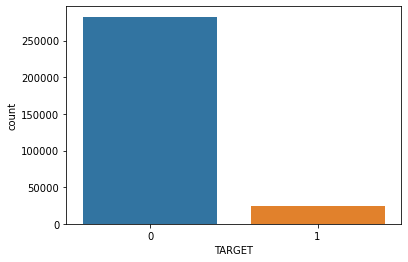

In [50]:
cat_summary(application_train, "TARGET", plot=True)
# Bulgular: Veri dengesiz. Başvuranların sadece %8i krediyi ödememiş.

In [45]:
def target_percent_cat(dataframe, category, target):
    print(pd.crosstab(dataframe[category], dataframe[target], normalize='index').mul(100))
    sns.countplot(x=category, hue=target, data=dataframe)
    plt.show()

TARGET                  0     1
NAME_CONTRACT_TYPE             
Cash loans         91.654 8.346
Revolving loans    94.522 5.478


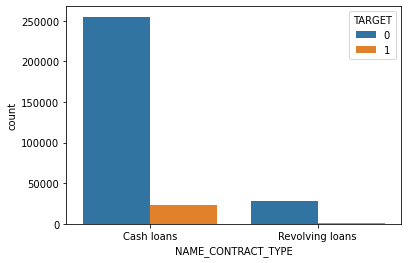

In [46]:
target_percent_cat(application_train, "NAME_CONTRACT_TYPE", "TARGET")
# Bulgular: Hedef değişkenin kategorik değişkenler için dağılımı

TARGET                  0     1
NAME_CONTRACT_TYPE             
Cash loans         91.654 8.346
Revolving loans    94.522 5.478


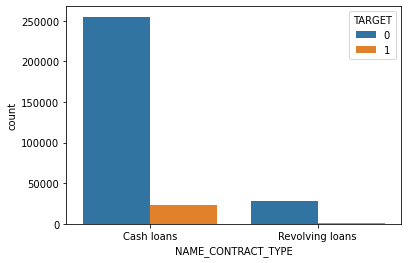

TARGET            0      1
CODE_GENDER               
F            93.001  6.999
M            89.858 10.142
XNA         100.000  0.000


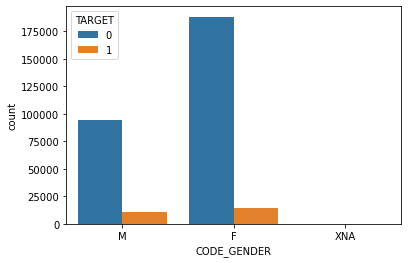

TARGET            0     1
FLAG_OWN_CAR             
N            91.500 8.500
Y            92.756 7.244


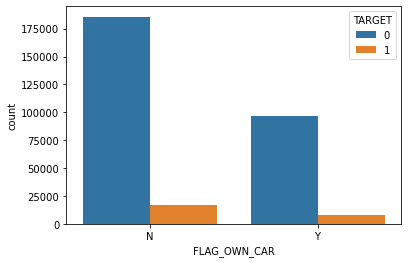

TARGET               0     1
FLAG_OWN_REALTY             
N               91.675 8.325
Y               92.038 7.962


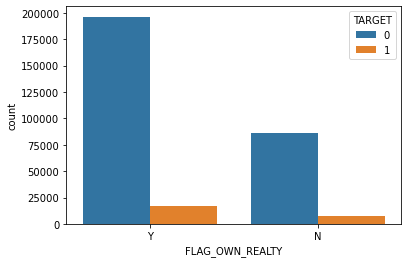

TARGET               0     1
NAME_TYPE_SUITE             
Children        92.623 7.377
Family          92.505 7.495
Group of people 91.513 8.487
Other_A         91.224 8.776
Other_B         90.169 9.831
Spouse, partner 92.128 7.872
Unaccompanied   91.817 8.183


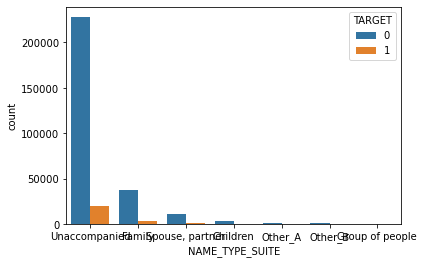

TARGET                     0      1
NAME_INCOME_TYPE                   
Businessman          100.000  0.000
Commercial associate  92.516  7.484
Maternity leave       60.000 40.000
Pensioner             94.614  5.386
State servant         94.245  5.755
Student              100.000  0.000
Unemployed            63.636 36.364
Working               90.412  9.588


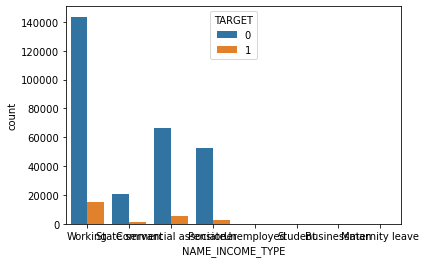

TARGET                             0      1
NAME_EDUCATION_TYPE                        
Academic degree               98.171  1.829
Higher education              94.645  5.355
Incomplete higher             91.515  8.485
Lower secondary               89.072 10.928
Secondary / secondary special 91.060  8.940


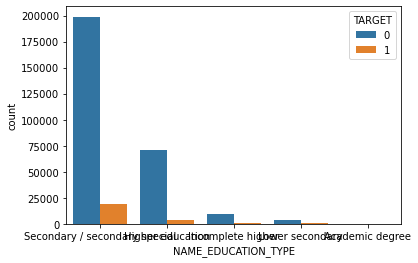

TARGET                     0     1
NAME_FAMILY_STATUS                
Civil marriage        90.055 9.945
Married               92.440 7.560
Separated             91.806 8.194
Single / not married  90.192 9.808
Unknown              100.000 0.000
Widow                 94.176 5.824


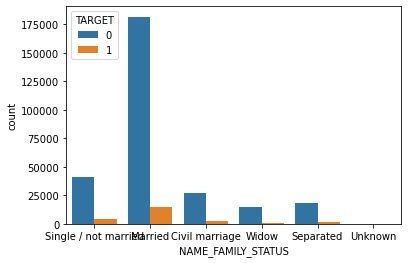

TARGET                   0      1
NAME_HOUSING_TYPE                
Co-op apartment     92.068  7.932
House / apartment   92.204  7.796
Municipal apartment 91.460  8.540
Office apartment    93.428  6.572
Rented apartment    87.687 12.313
With parents        88.302 11.698


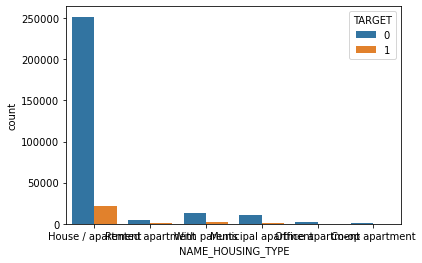

TARGET                     0      1
OCCUPATION_TYPE                    
Accountants           95.170  4.830
Cleaning staff        90.393  9.607
Cooking staff         89.556 10.444
Core staff            93.696  6.304
Drivers               88.674 11.326
HR staff              93.606  6.394
High skill tech staff 93.840  6.160
IT staff              93.536  6.464
Laborers              89.421 10.579
Low-skill Laborers    82.848 17.152
Managers              93.786  6.214
Medicine staff        93.300  6.700
Private service staff 93.401  6.599
Realty agents         92.144  7.856
Sales staff           90.368  9.632
Secretaries           92.950  7.050
Security staff        89.258 10.742
Waiters/barmen staff  88.724 11.276


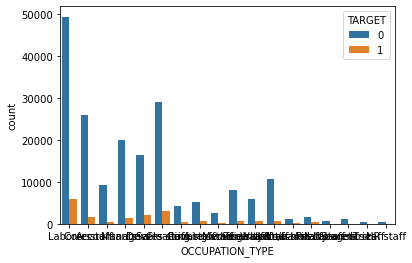

TARGET                          0     1
WEEKDAY_APPR_PROCESS_START             
FRIDAY                     91.853 8.147
MONDAY                     92.243 7.757
SATURDAY                   92.113 7.887
SUNDAY                     92.071 7.929
THURSDAY                   91.900 8.100
TUESDAY                    91.650 8.350
WEDNESDAY                  91.840 8.160


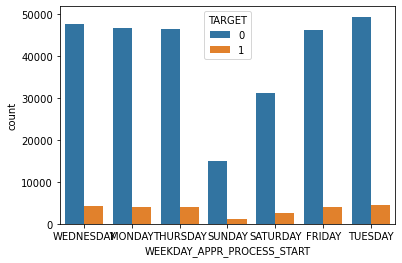

TARGET                     0     1
FONDKAPREMONT_MODE                
not specified         92.456 7.544
org spec account      94.180 5.820
reg oper account      93.022 6.978
reg oper spec account 93.444 6.556


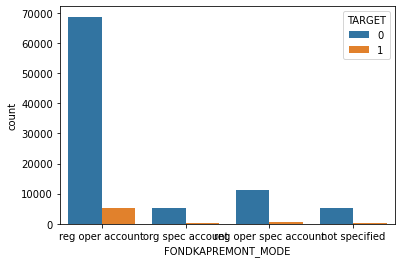

TARGET                0      1
HOUSETYPE_MODE                
block of flats   93.057  6.943
specific housing 89.860 10.140
terraced house   91.502  8.498


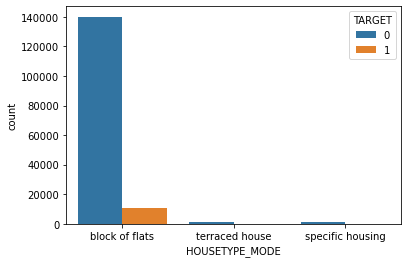

TARGET                  0     1
WALLSMATERIAL_MODE             
Block              92.975 7.025
Mixed              92.465 7.535
Monolithic         95.278 4.722
Others             91.692 8.308
Panel              93.652 6.348
Stone, brick       92.594 7.406
Wooden             90.302 9.698


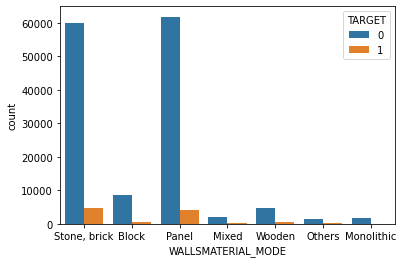

TARGET                   0     1
EMERGENCYSTATE_MODE             
No                  93.035 6.965
Yes                 90.421 9.579


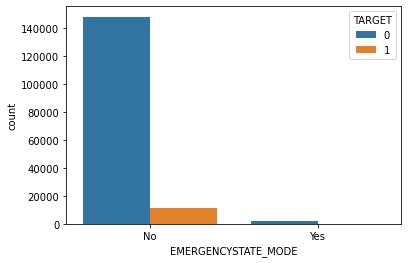

TARGET       0       1
TARGET                
0      100.000   0.000
1        0.000 100.000


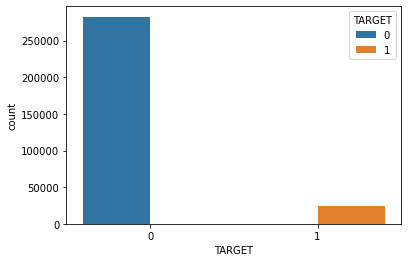

TARGET           0     1
FLAG_MOBIL              
0          100.000 0.000
1           91.927 8.073


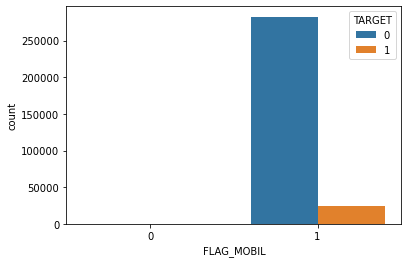

TARGET              0     1
FLAG_EMP_PHONE             
0              94.600 5.400
1              91.340 8.660


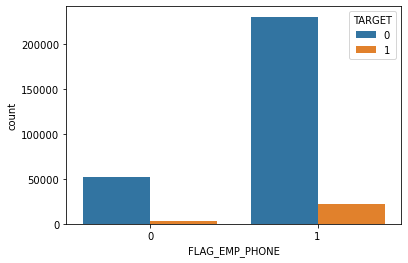

TARGET               0     1
FLAG_WORK_PHONE             
0               92.315 7.685
1               90.370 9.630


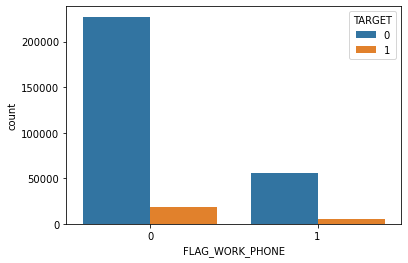

TARGET                0     1
FLAG_CONT_MOBILE             
0                92.160 7.840
1                91.927 8.073


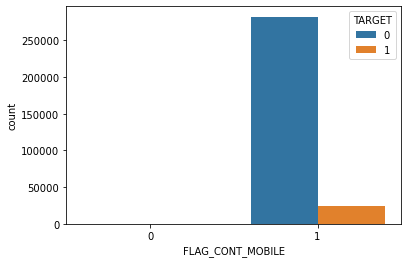

TARGET          0     1
FLAG_PHONE             
0          91.522 8.478
1          92.964 7.036


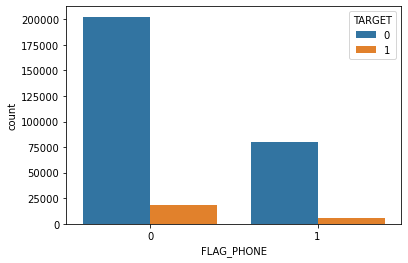

TARGET          0     1
FLAG_EMAIL             
0          91.915 8.085
1          92.122 7.878


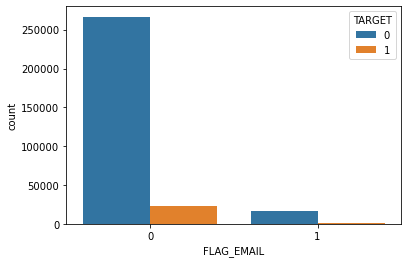

TARGET                    0      1
REGION_RATING_CLIENT              
1                    95.180  4.820
2                    92.111  7.889
3                    88.897 11.103


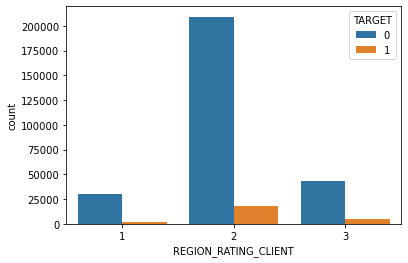

TARGET                           0      1
REGION_RATING_CLIENT_W_CITY              
1                           95.159  4.841
2                           92.082  7.918
3                           88.598 11.402


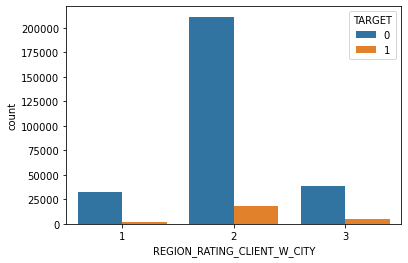

TARGET                          0     1
REG_REGION_NOT_LIVE_REGION             
0                          91.946 8.054
1                          90.702 9.298


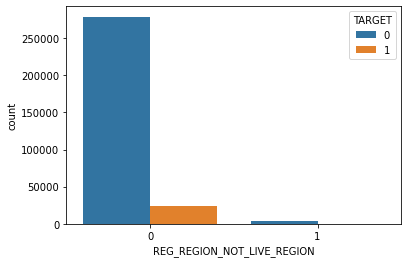

TARGET                          0     1
REG_REGION_NOT_WORK_REGION             
0                          91.971 8.029
1                          91.109 8.891


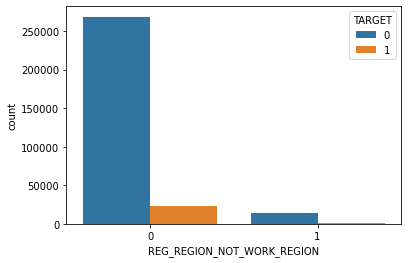

TARGET                           0     1
LIVE_REGION_NOT_WORK_REGION             
0                           91.943 8.057
1                           91.554 8.446


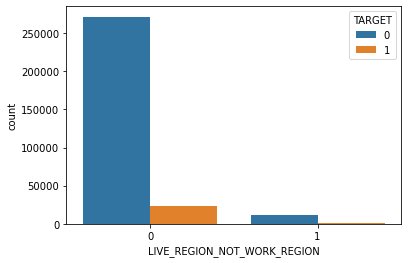

TARGET                      0      1
REG_CITY_NOT_LIVE_CITY              
0                      92.279  7.721
1                      87.774 12.226


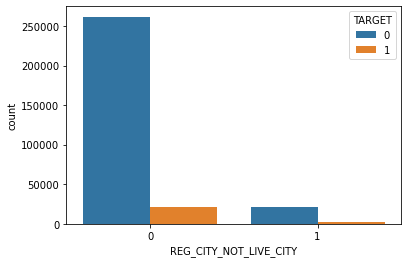

TARGET                      0      1
REG_CITY_NOT_WORK_CITY              
0                      92.687  7.313
1                      89.389 10.611


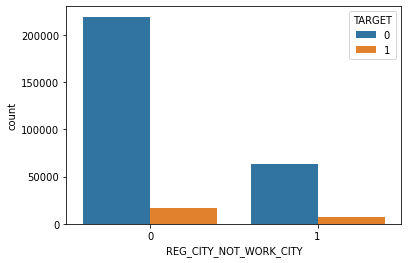

TARGET                       0     1
LIVE_CITY_NOT_WORK_CITY             
0                       92.342 7.658
1                       90.034 9.966


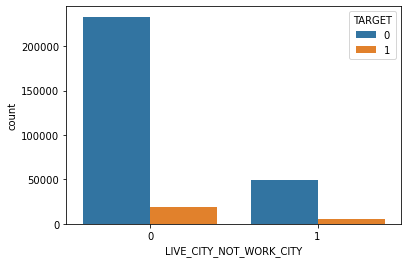

TARGET                         0      1
DEF_60_CNT_SOCIAL_CIRCLE               
0.000                     92.165  7.835
1.000                     89.483 10.517
2.000                     87.855 12.145
3.000                     84.114 15.886
4.000                     88.889 11.111
5.000                     85.000 15.000
6.000                    100.000  0.000
7.000                    100.000  0.000
24.000                   100.000  0.000


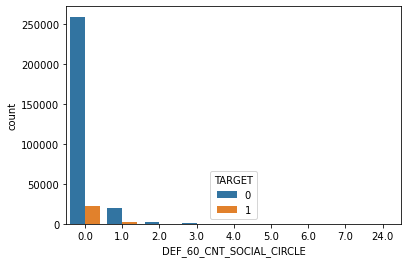

TARGET               0      1
FLAG_DOCUMENT_2              
0               91.928  8.072
1               69.231 30.769


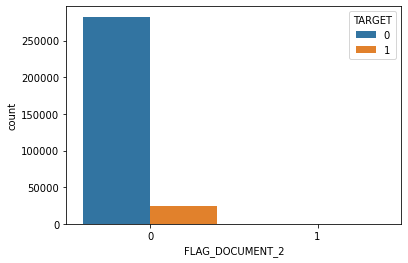

TARGET               0     1
FLAG_DOCUMENT_3             
0               93.817 6.183
1               91.155 8.845


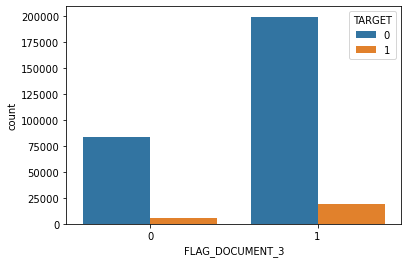

TARGET                0     1
FLAG_DOCUMENT_4              
0                91.926 8.074
1               100.000 0.000


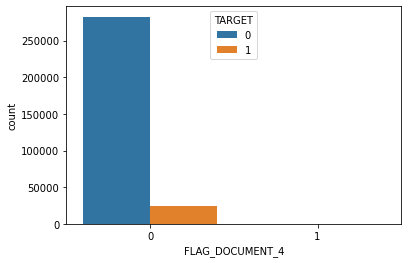

TARGET               0     1
FLAG_DOCUMENT_5             
0               91.926 8.074
1               91.997 8.003


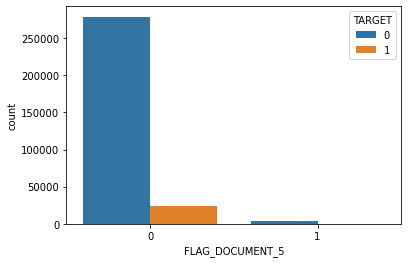

TARGET               0     1
FLAG_DOCUMENT_6             
0               91.685 8.315
1               94.435 5.565


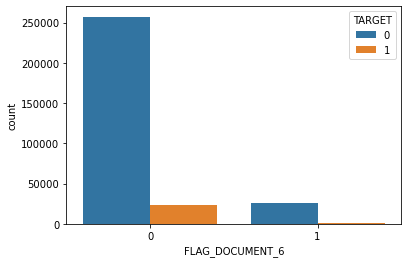

TARGET               0     1
FLAG_DOCUMENT_7             
0               91.927 8.073
1               94.915 5.085


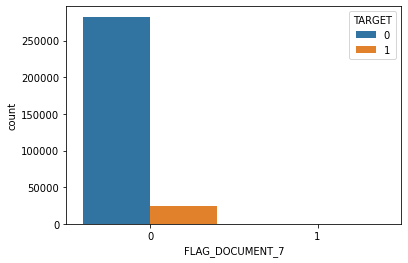

TARGET               0     1
FLAG_DOCUMENT_8             
0               91.862 8.138
1               92.663 7.337


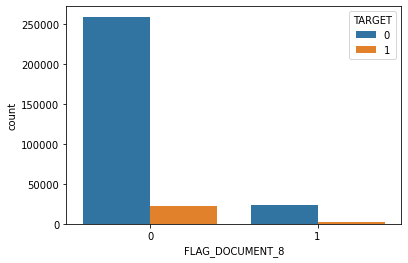

TARGET               0     1
FLAG_DOCUMENT_9             
0               91.920 8.080
1               93.823 6.177


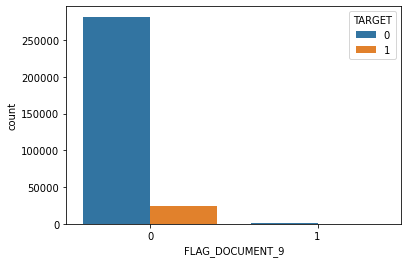

TARGET                 0     1
FLAG_DOCUMENT_10              
0                 91.927 8.073
1                100.000 0.000


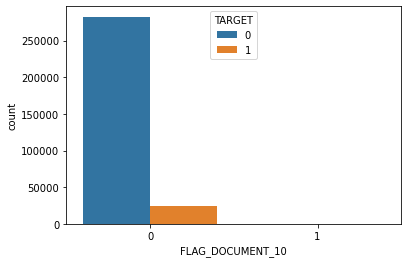

TARGET                0     1
FLAG_DOCUMENT_11             
0                91.920 8.080
1                93.766 6.234


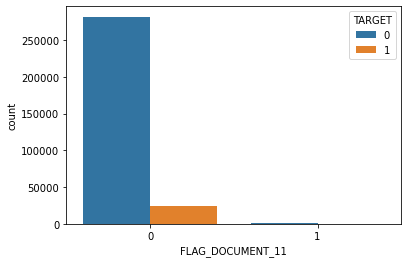

TARGET                 0     1
FLAG_DOCUMENT_12              
0                 91.927 8.073
1                100.000 0.000


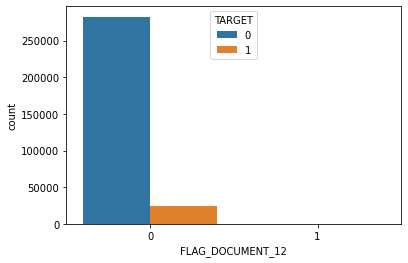

TARGET                0     1
FLAG_DOCUMENT_13             
0                91.908 8.092
1                97.232 2.768


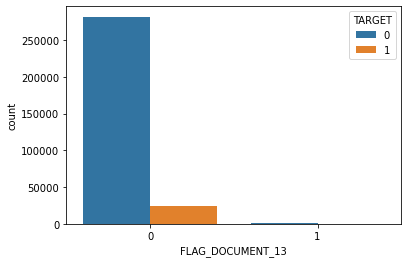

TARGET                0     1
FLAG_DOCUMENT_14             
0                91.913 8.087
1                96.678 3.322


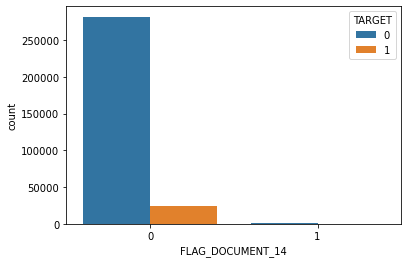

TARGET                0     1
FLAG_DOCUMENT_15             
0                91.921 8.079
1                97.043 2.957


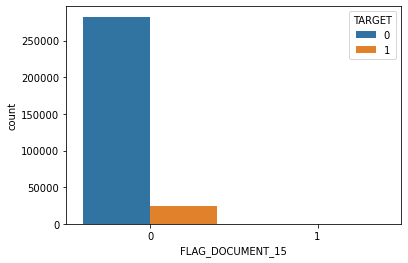

TARGET                0     1
FLAG_DOCUMENT_16             
0                91.895 8.105
1                95.087 4.913


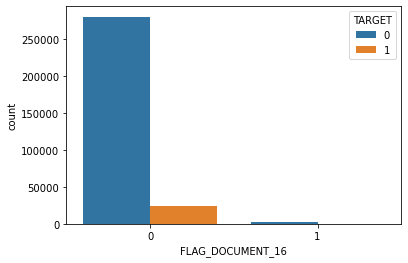

TARGET                0     1
FLAG_DOCUMENT_17             
0                91.926 8.074
1                97.561 2.439


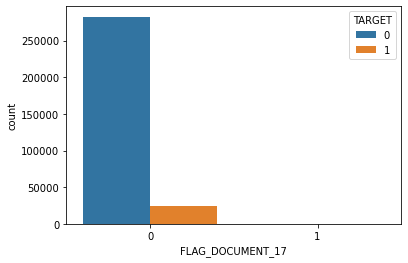

TARGET                0     1
FLAG_DOCUMENT_18             
0                91.908 8.092
1                94.320 5.680


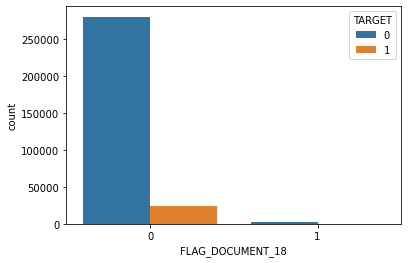

TARGET                0     1
FLAG_DOCUMENT_19             
0                91.926 8.074
1                93.443 6.557


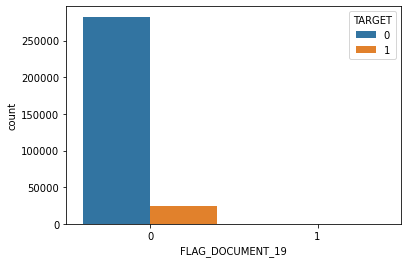

TARGET                0     1
FLAG_DOCUMENT_20             
0                91.927 8.073
1                91.667 8.333


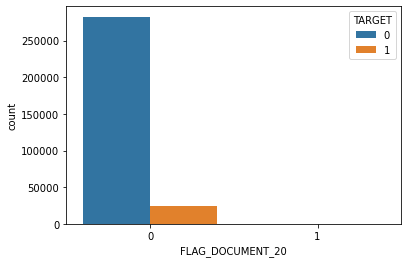

TARGET                0      1
FLAG_DOCUMENT_21              
0                91.929  8.071
1                86.408 13.592


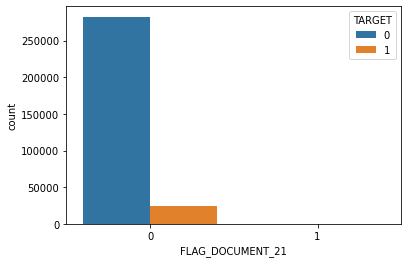

TARGET                           0      1
AMT_REQ_CREDIT_BUREAU_HOUR               
0.000                       92.283  7.717
1.000                       91.987  8.013
2.000                       89.286 10.714
3.000                      100.000  0.000
4.000                      100.000  0.000


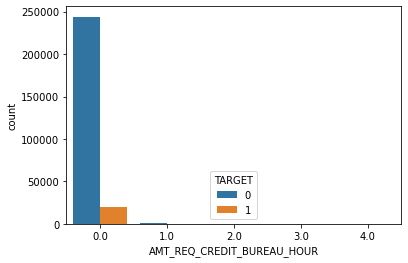

TARGET                          0      1
AMT_REQ_CREDIT_BUREAU_DAY               
0.000                      92.290  7.710
1.000                      90.325  9.675
2.000                      89.623 10.377
3.000                      95.556  4.444
4.000                      88.462 11.538
5.000                     100.000  0.000
6.000                     100.000  0.000
8.000                     100.000  0.000
9.000                     100.000  0.000


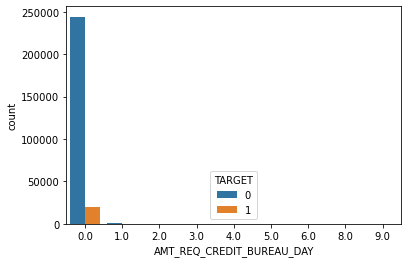

TARGET                           0      1
AMT_REQ_CREDIT_BUREAU_WEEK               
0.000                       92.284  7.716
1.000                       92.227  7.773
2.000                       89.950 10.050
3.000                       93.103  6.897
4.000                       88.235 11.765
5.000                       90.000 10.000
6.000                       95.000  5.000
7.000                      100.000  0.000
8.000                      100.000  0.000


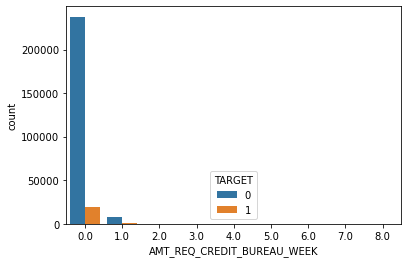

In [47]:
for col in cat_cols:
    target_percent_cat(application_train, col, "TARGET")

TARGET                      0      1
ORGANIZATION_TYPE                   
Advertising            91.841  8.159
Agriculture            89.527 10.473
Bank                   94.815  5.185
Business Entity Type 1 91.862  8.138
Business Entity Type 2 91.472  8.528
Business Entity Type 3 90.700  9.300
Cleaning               88.846 11.154
Construction           88.320 11.680
Culture                94.459  5.541
Electricity            93.368  6.632
Emergency              92.857  7.143
Government             93.022  6.978
Hotel                  93.582  6.418
Housing                92.055  7.945
Industry: type 1       88.932 11.068
Industry: type 10      93.578  6.422
Industry: type 11      91.346  8.654
Industry: type 12      96.206  3.794
Industry: type 13      86.567 13.433
Industry: type 2       92.795  7.205
Industry: type 3       89.384 10.616
Industry: type 4       89.852 10.148
Industry: type 5       93.155  6.845
Industry: type 6       92.857  7.143
Industry: type 7       91.966  8.034
I

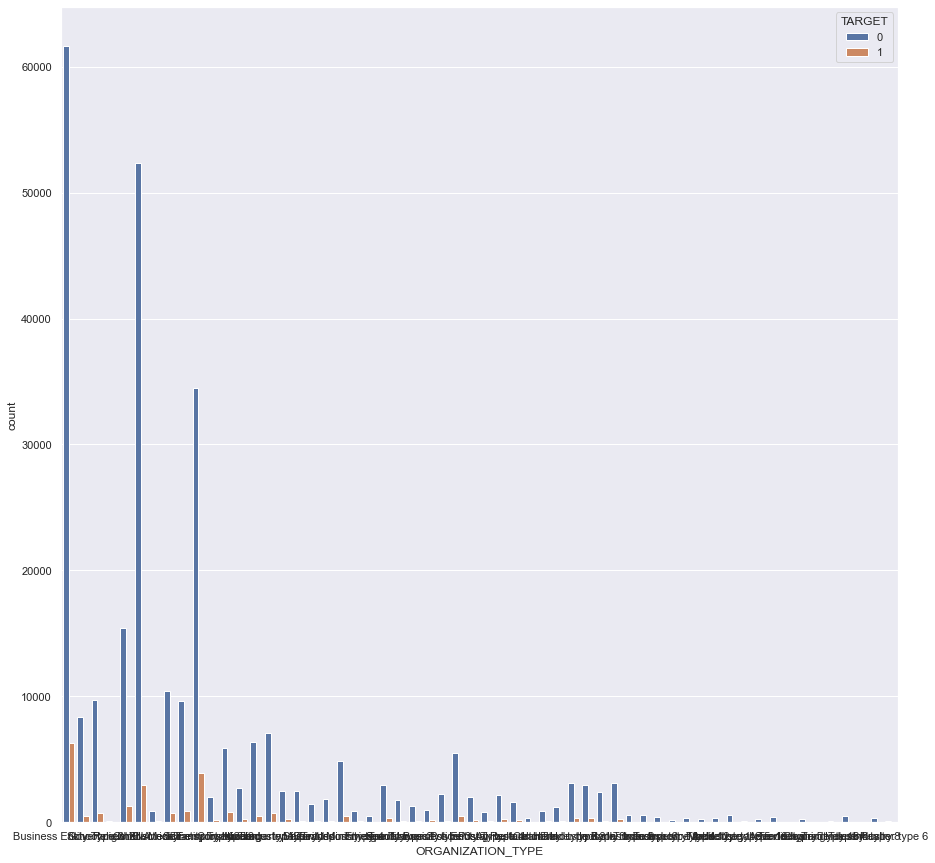

In [53]:
for col in cat_but_car:
    target_percent_cat(application_train, col, "TARGET")

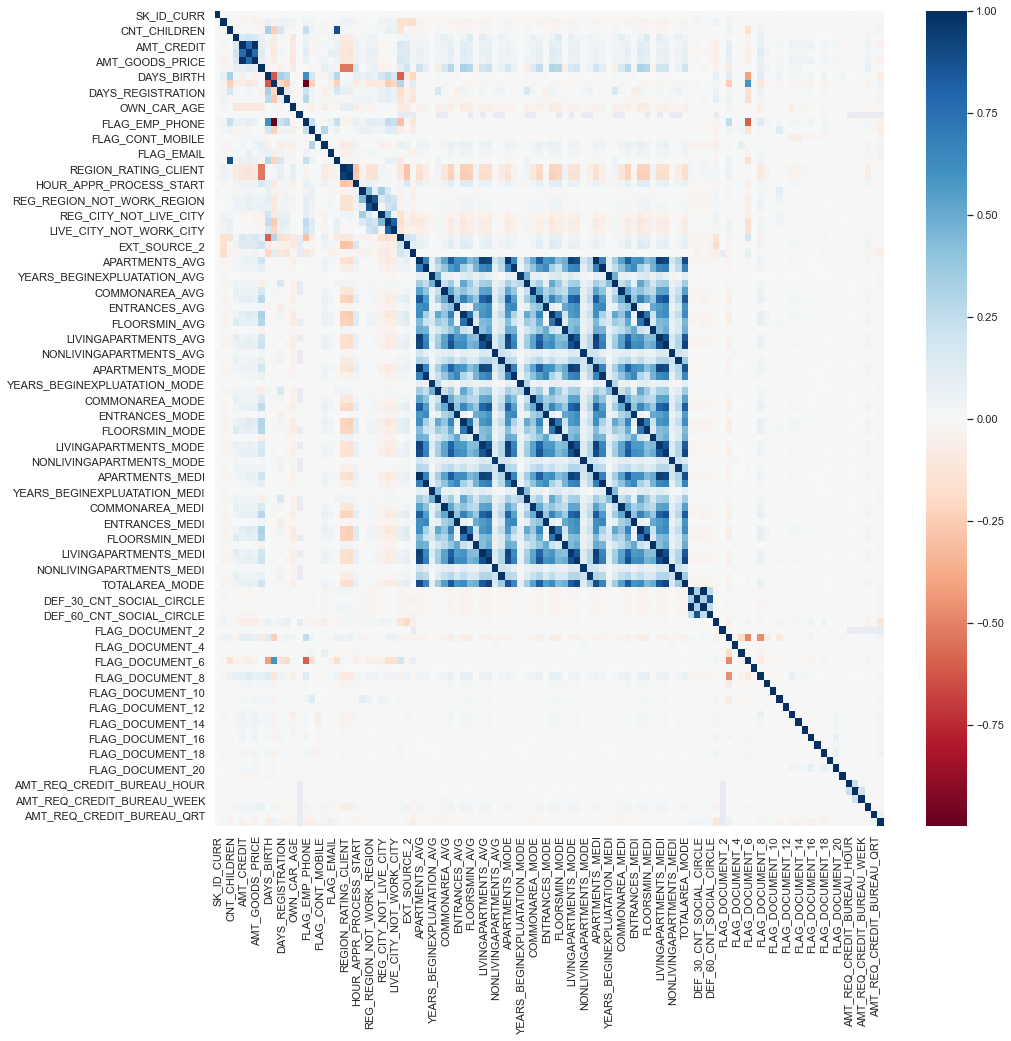

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [52]:
high_correlated_cols(application_train, plot=True, corr_th=0.90)

count   307511.000
mean    278180.519
std     102790.175
min     100002.000
5%      117945.500
10%     135692.000
20%     171327.000
30%     207121.000
40%     242626.000
50%     278202.000
60%     313865.000
70%     349428.000
80%     384696.000
90%     420729.000
95%     438427.500
99%     452712.900
max     456255.000
Name: SK_ID_CURR, dtype: float64


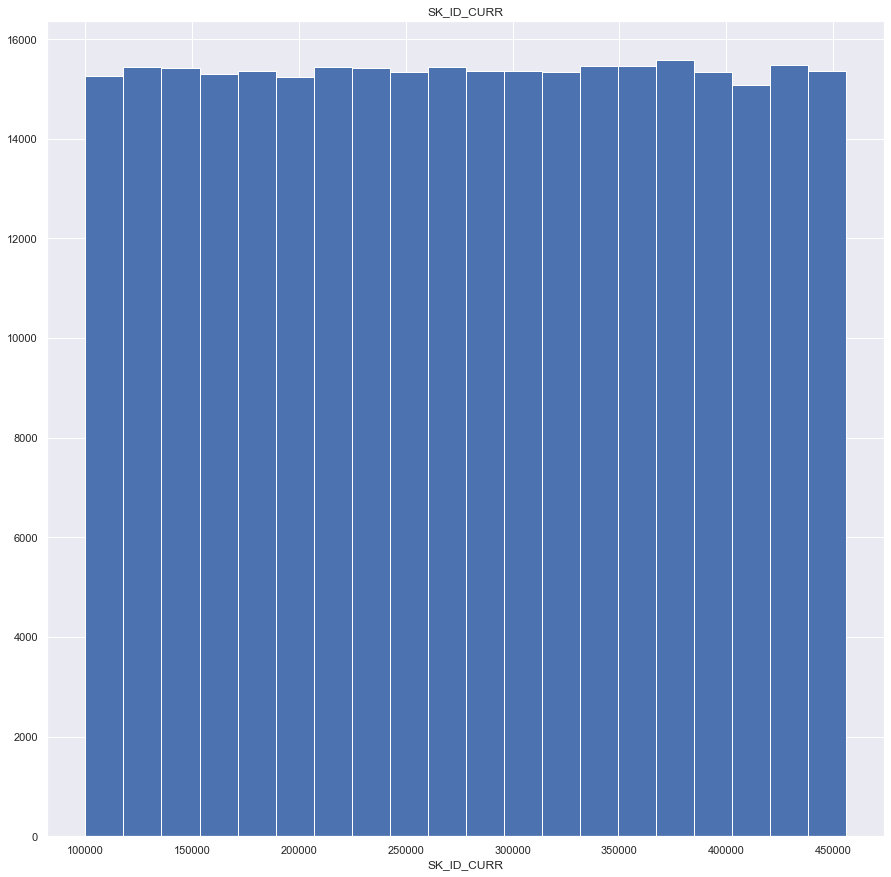

count   307511.000
mean         0.417
std          0.722
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          1.000
90%          2.000
95%          2.000
99%          3.000
max         19.000
Name: CNT_CHILDREN, dtype: float64


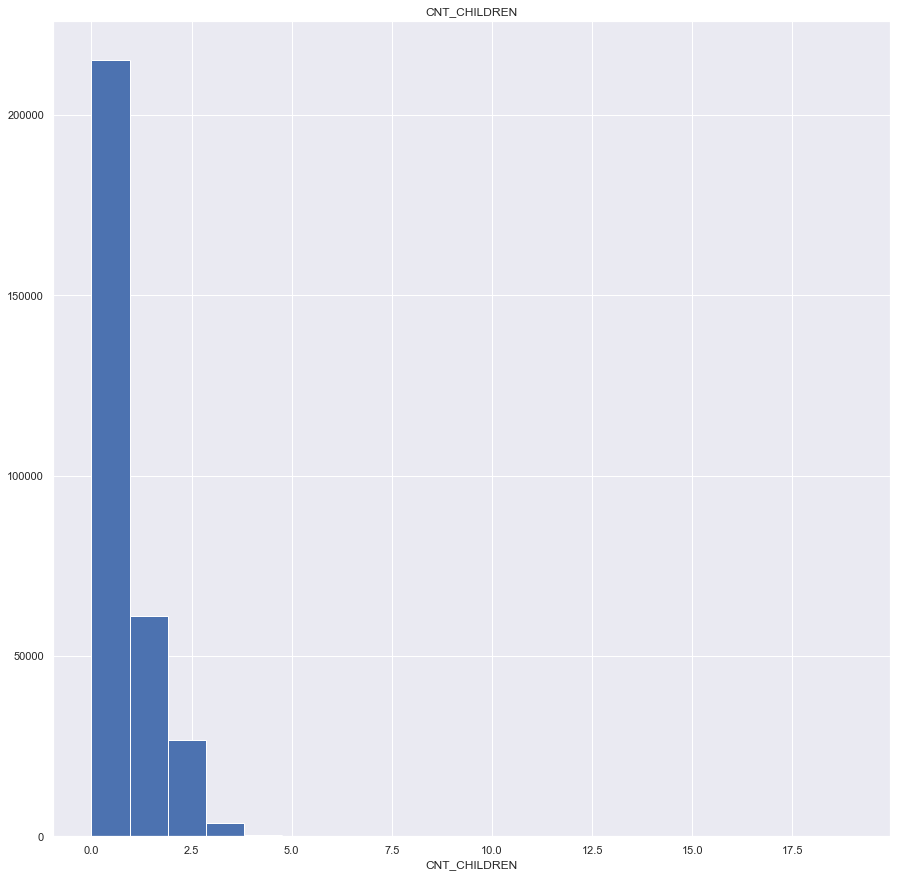

count      307511.000
mean       168797.919
std        237123.146
min         25650.000
5%          67500.000
10%         81000.000
20%         99000.000
30%        112500.000
40%        135000.000
50%        147150.000
60%        162000.000
70%        180000.000
80%        225000.000
90%        270000.000
95%        337500.000
99%        472500.000
max     117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64


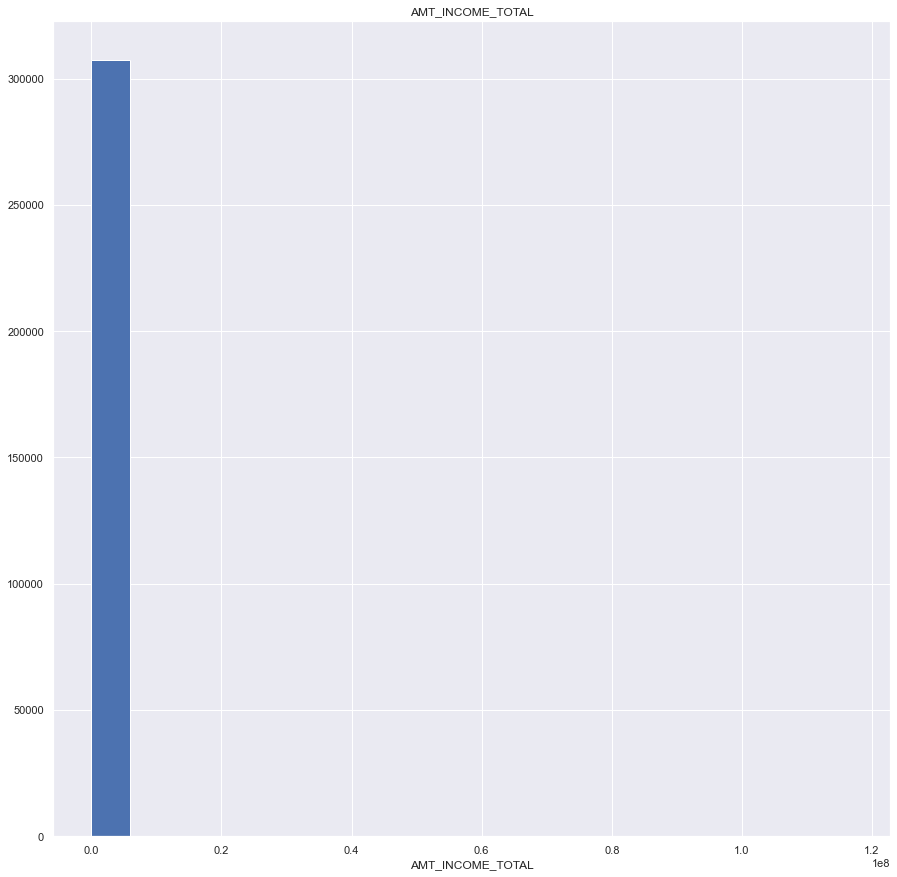

count    307511.000
mean     599026.000
std      402490.777
min       45000.000
5%       135000.000
10%      180000.000
20%      254700.000
30%      306306.000
40%      432000.000
50%      513531.000
60%      604152.000
70%      755190.000
80%      900000.000
90%     1133748.000
95%     1350000.000
99%     1854000.000
max     4050000.000
Name: AMT_CREDIT, dtype: float64


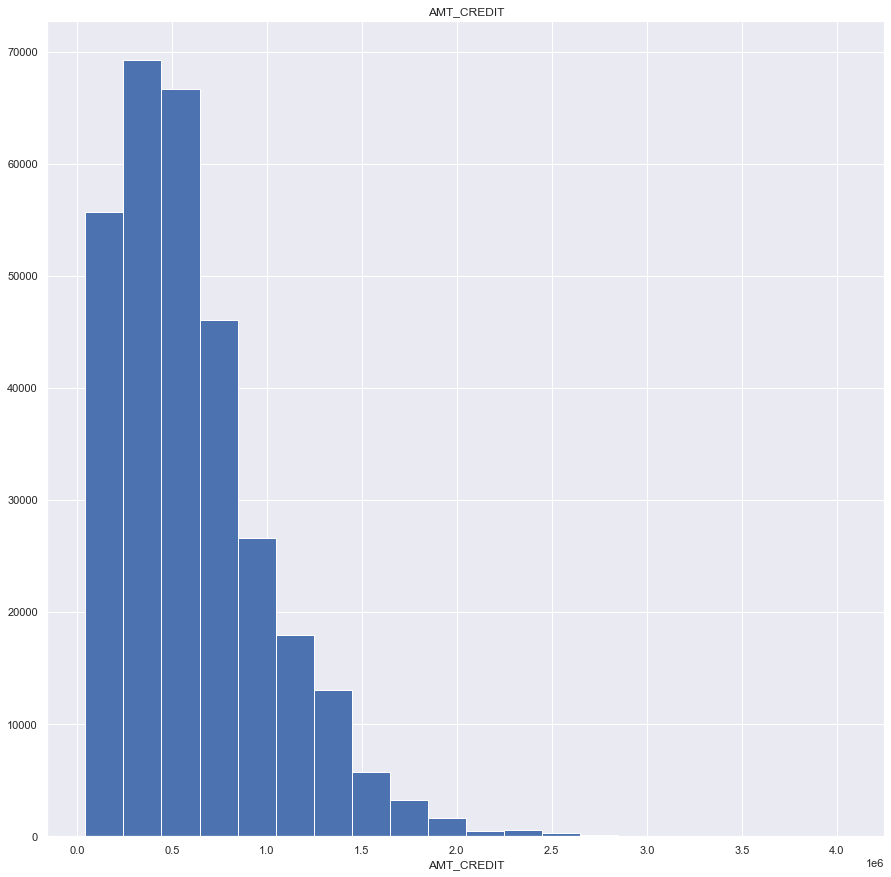

count   307499.000
mean     27108.574
std      14493.737
min       1615.500
5%        9000.000
10%      11074.500
20%      14701.500
30%      18189.000
40%      21865.500
50%      24903.000
60%      28062.000
70%      32004.000
80%      37516.500
90%      45954.000
95%      53325.000
99%      70006.500
max     258025.500
Name: AMT_ANNUITY, dtype: float64


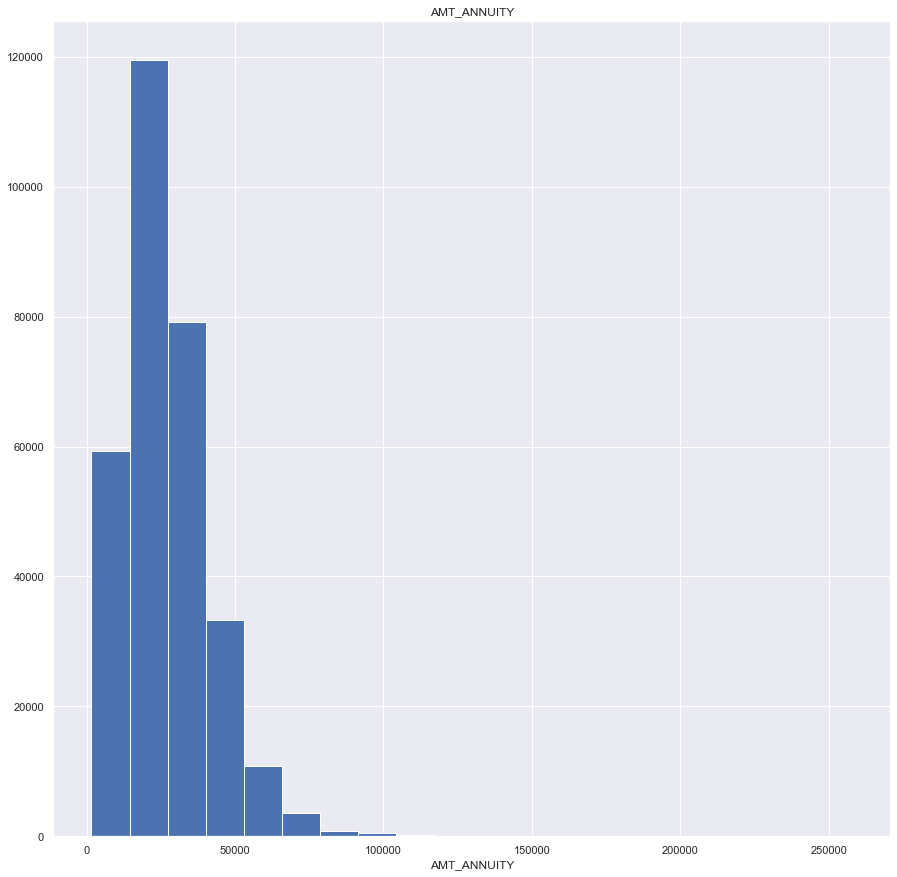

count    307233.000
mean     538396.207
std      369446.461
min       40500.000
5%       135000.000
10%      180000.000
20%      225000.000
30%      270000.000
40%      373500.000
50%      450000.000
60%      522000.000
70%      675000.000
80%      814500.000
90%     1093500.000
95%     1305000.000
99%     1800000.000
max     4050000.000
Name: AMT_GOODS_PRICE, dtype: float64


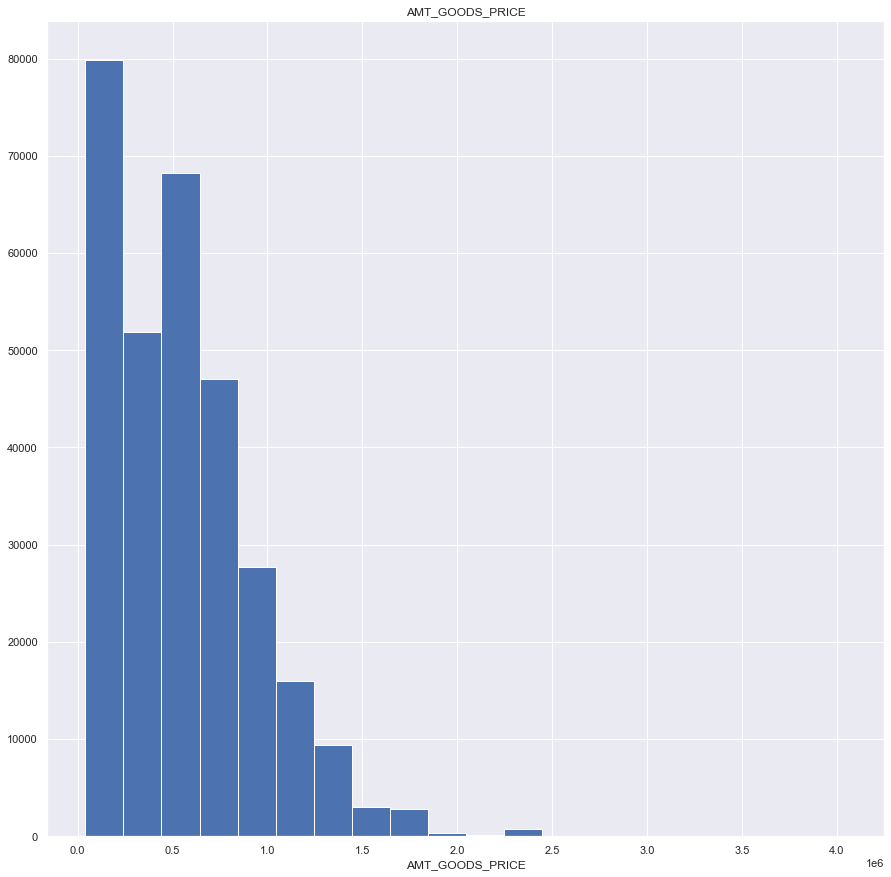

count   307511.000
mean         0.021
std          0.014
min          0.000
5%           0.005
10%          0.007
20%          0.009
30%          0.011
40%          0.017
50%          0.019
60%          0.021
70%          0.025
80%          0.031
90%          0.036
95%          0.046
99%          0.073
max          0.073
Name: REGION_POPULATION_RELATIVE, dtype: float64


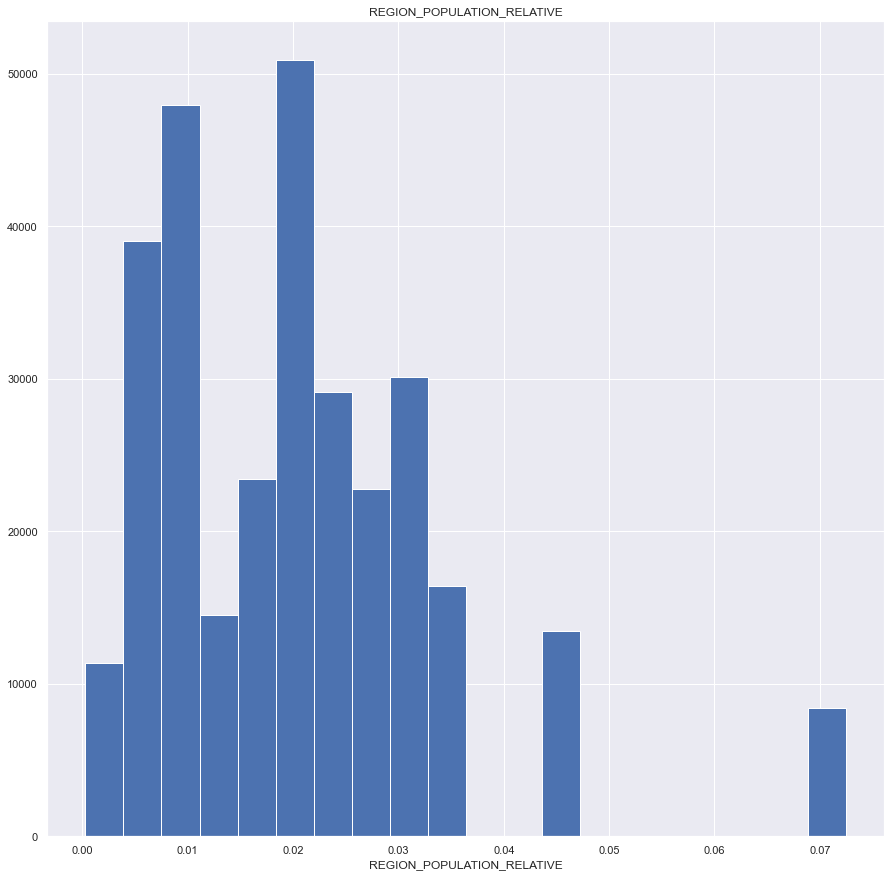

count   307511.000
mean    -16036.995
std       4363.989
min     -25229.000
5%      -23204.000
10%     -22181.000
20%     -20474.000
30%     -18885.000
40%     -17220.000
50%     -15750.000
60%     -14416.000
70%     -13140.000
80%     -11694.000
90%     -10284.000
95%      -9407.000
99%      -8263.000
max      -7489.000
Name: DAYS_BIRTH, dtype: float64


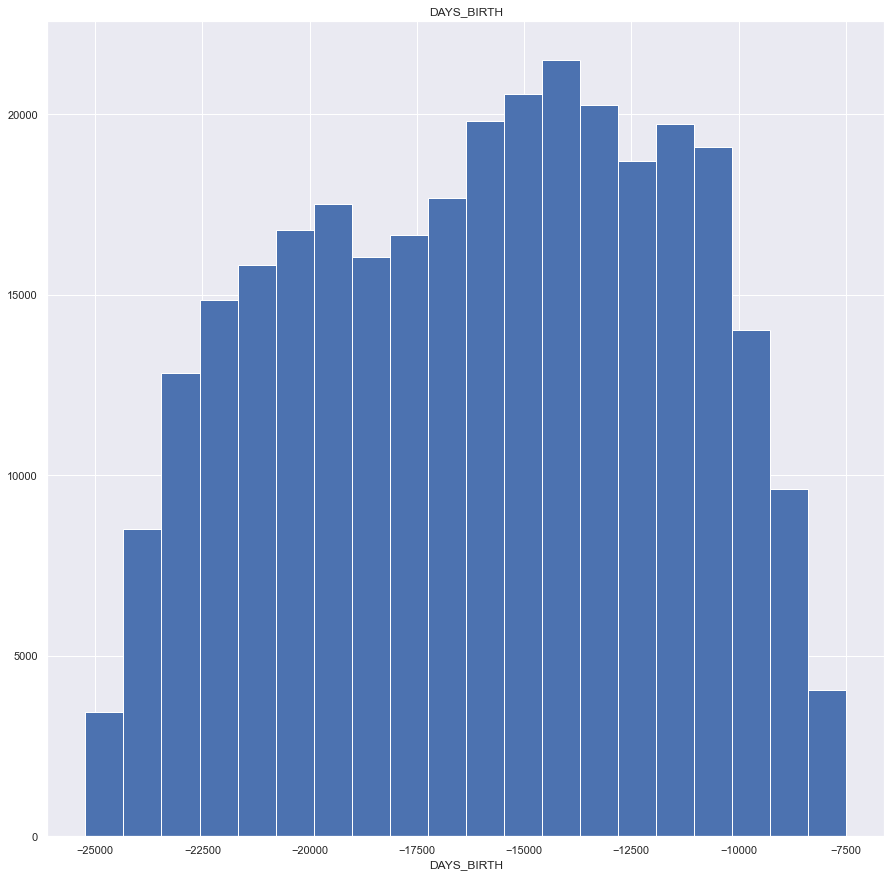

count   307511.000
mean     63815.046
std     141275.767
min     -17912.000
5%       -6742.500
10%      -4881.000
20%      -3231.000
30%      -2362.000
40%      -1695.000
50%      -1213.000
60%       -822.000
70%       -458.000
80%       -144.000
90%     365243.000
95%     365243.000
99%     365243.000
max     365243.000
Name: DAYS_EMPLOYED, dtype: float64


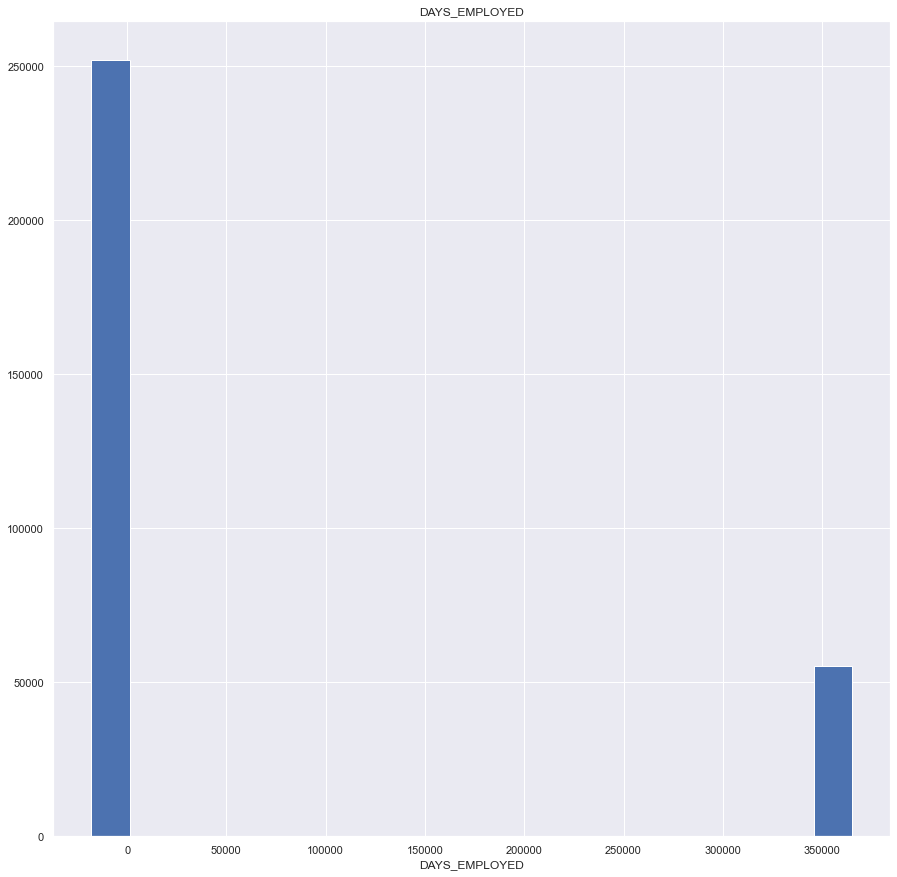

count   307511.000
mean     -4986.120
std       3522.886
min     -24672.000
5%      -11416.000
10%      -9932.000
20%      -8230.000
30%      -6776.000
40%      -5459.000
50%      -4504.000
60%      -3537.000
70%      -2540.000
80%      -1491.000
90%       -690.000
95%       -330.000
99%        -50.000
max          0.000
Name: DAYS_REGISTRATION, dtype: float64


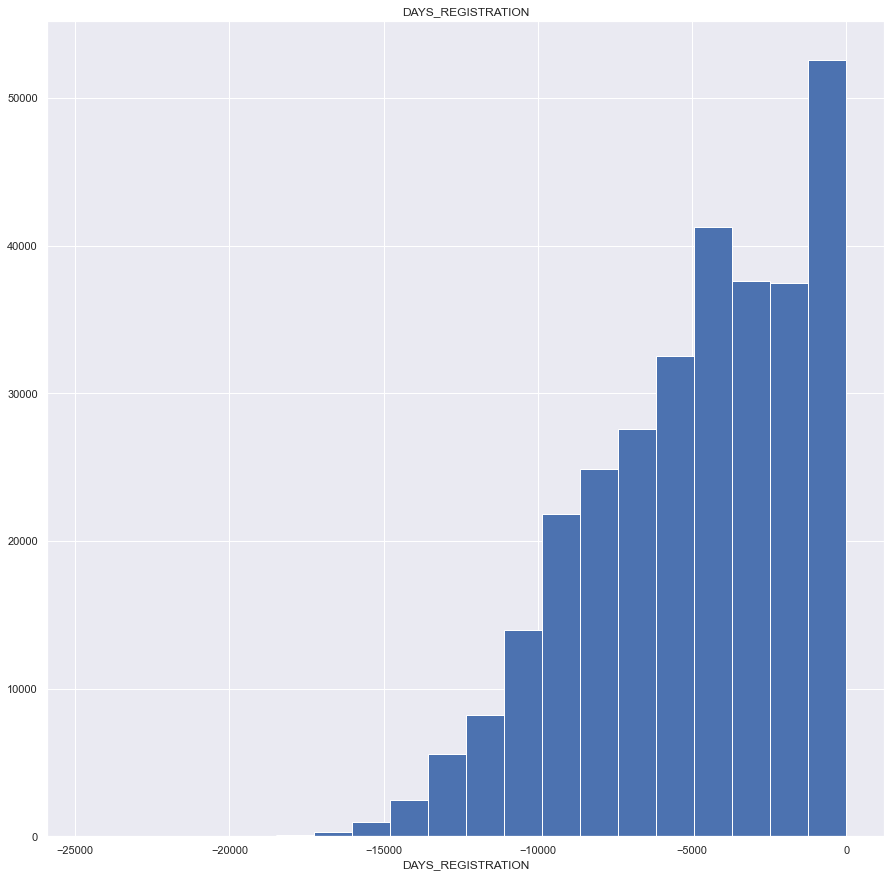

count   307511.000
mean     -2994.202
std       1509.450
min      -7197.000
5%       -4944.000
10%      -4724.000
20%      -4430.000
30%      -4172.000
40%      -3881.000
50%      -3254.000
60%      -2654.000
70%      -2044.000
80%      -1378.000
90%       -730.000
95%       -375.000
99%        -61.000
max          0.000
Name: DAYS_ID_PUBLISH, dtype: float64


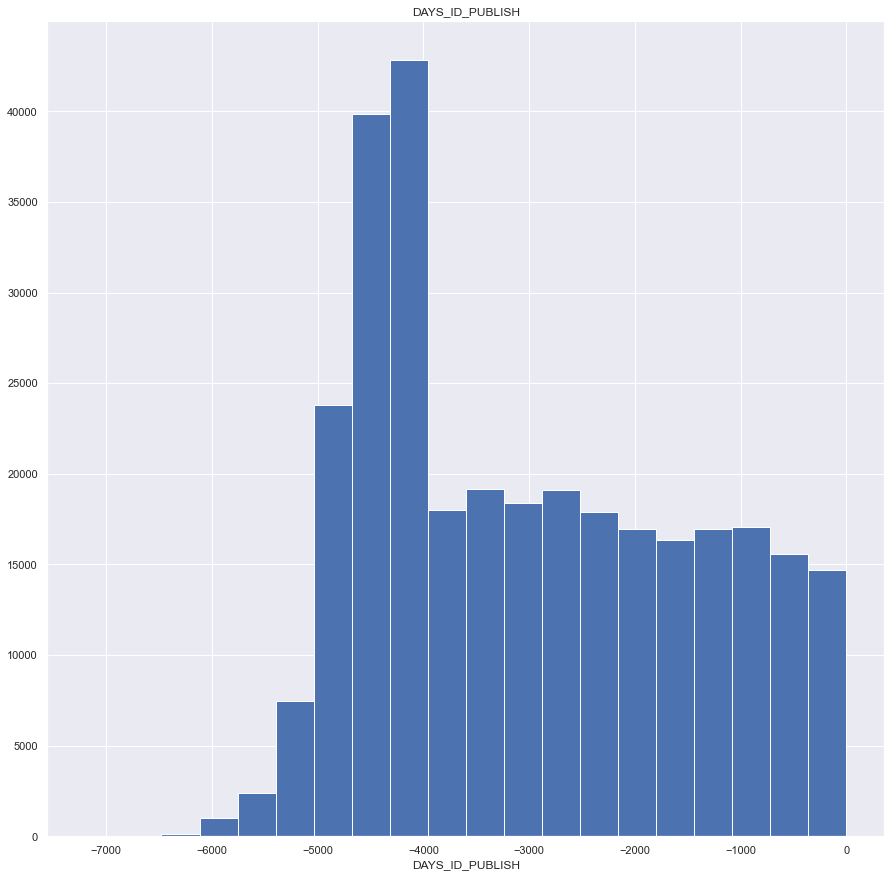

count   104582.000
mean        12.061
std         11.945
min          0.000
5%           1.000
10%          2.000
20%          4.000
30%          6.000
40%          7.000
50%          9.000
60%         12.000
70%         14.000
80%         17.000
90%         22.000
95%         30.000
99%         64.000
max         91.000
Name: OWN_CAR_AGE, dtype: float64


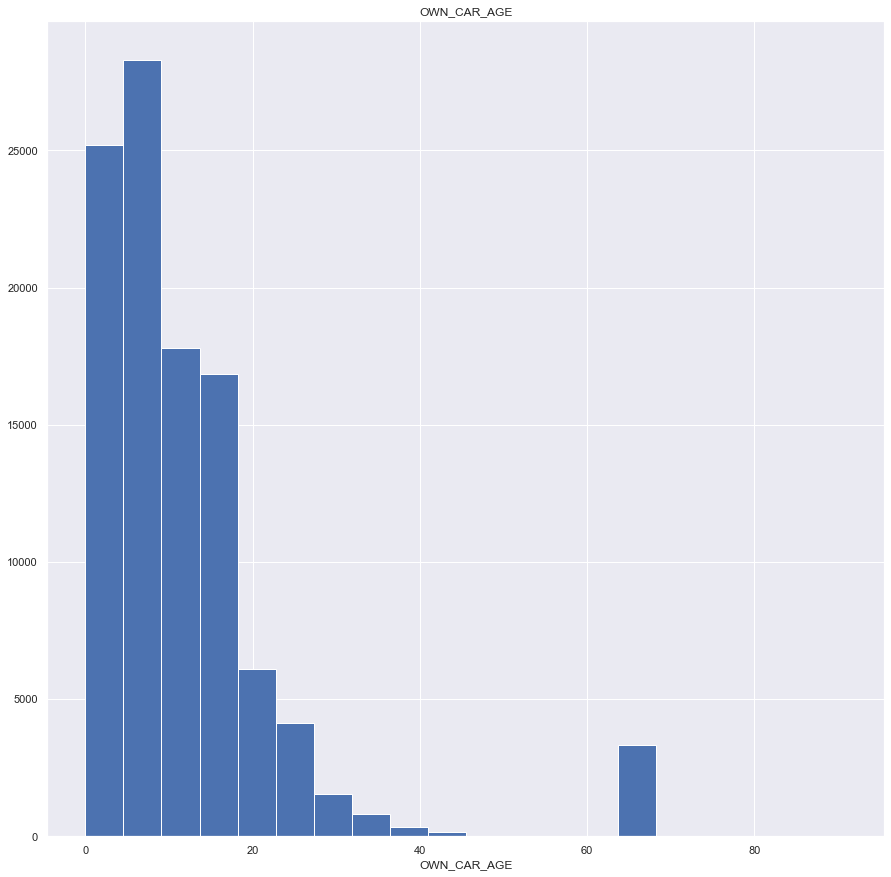

count   307509.000
mean         2.153
std          0.911
min          1.000
5%           1.000
10%          1.000
20%          1.000
30%          2.000
40%          2.000
50%          2.000
60%          2.000
70%          2.000
80%          3.000
90%          3.000
95%          4.000
99%          5.000
max         20.000
Name: CNT_FAM_MEMBERS, dtype: float64


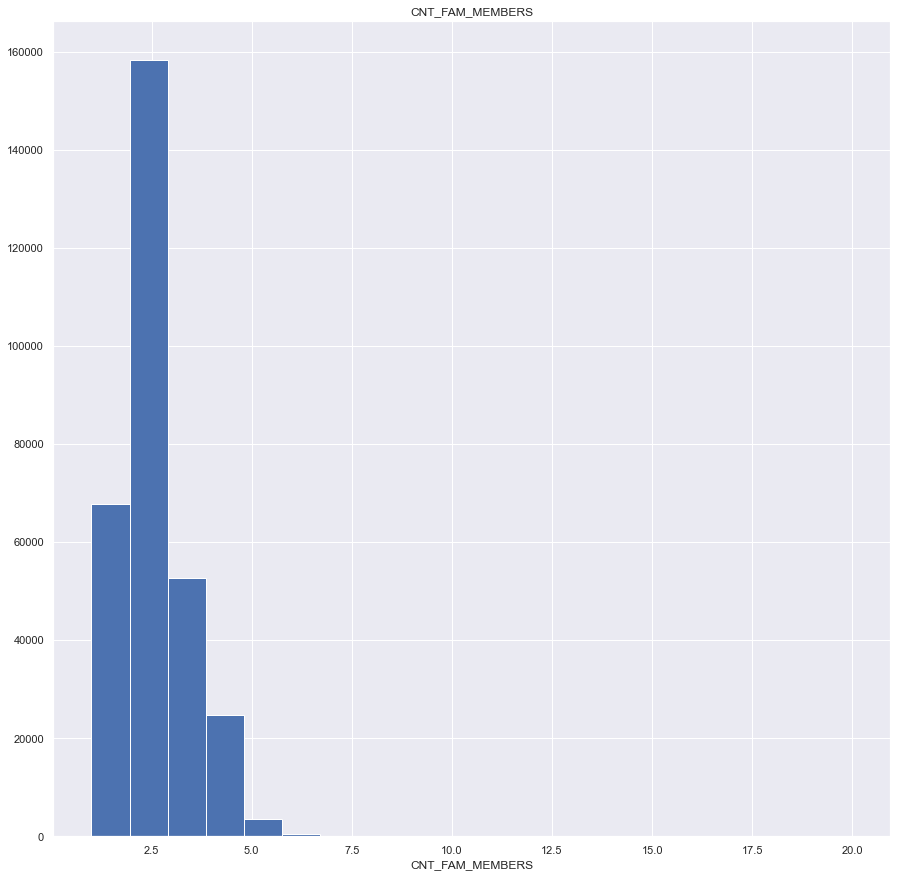

count   307511.000
mean        12.063
std          3.266
min          0.000
5%           7.000
10%          8.000
20%          9.000
30%         10.000
40%         11.000
50%         12.000
60%         13.000
70%         14.000
80%         15.000
90%         16.000
95%         17.000
99%         19.000
max         23.000
Name: HOUR_APPR_PROCESS_START, dtype: float64


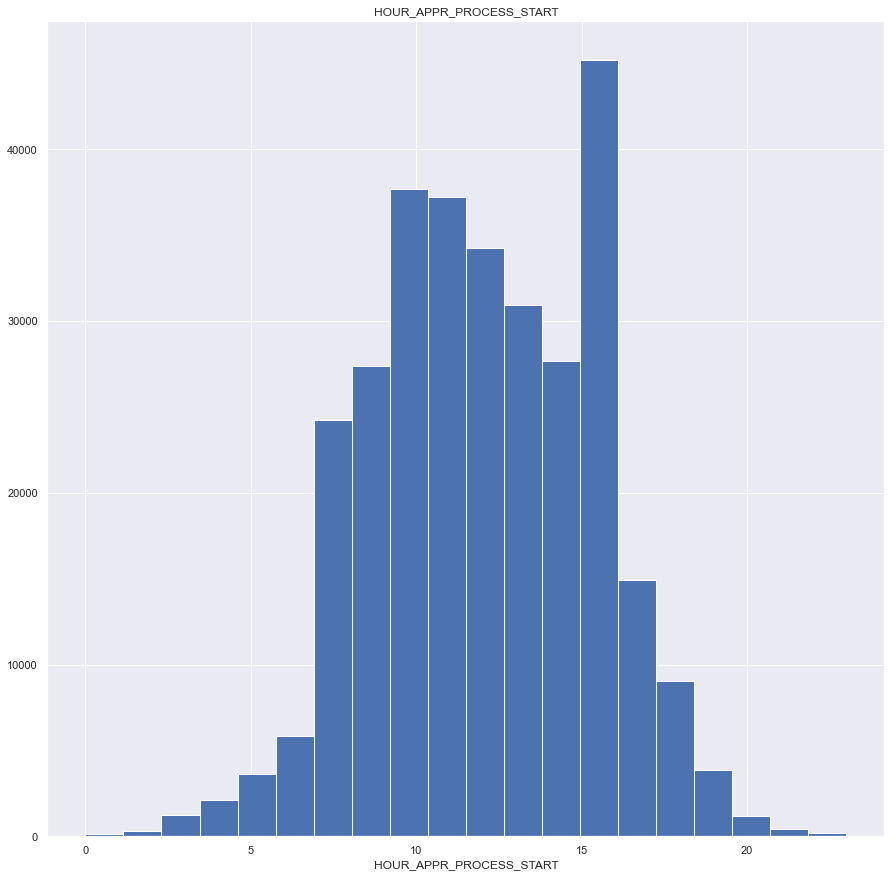

count   134133.000
mean         0.502
std          0.211
min          0.015
5%           0.158
10%          0.213
20%          0.296
30%          0.369
40%          0.438
50%          0.506
60%          0.573
70%          0.640
80%          0.710
90%          0.787
95%          0.832
99%          0.889
max          0.963
Name: EXT_SOURCE_1, dtype: float64


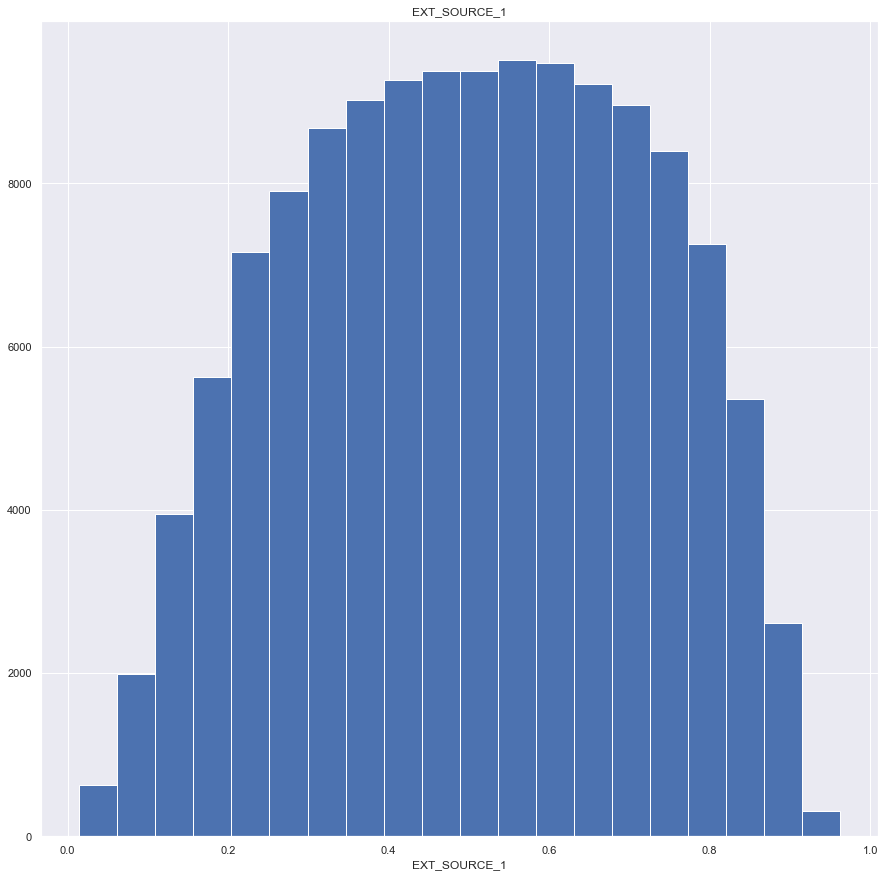

count   306851.000
mean         0.514
std          0.191
min          0.000
5%           0.133
10%          0.216
20%          0.340
30%          0.440
40%          0.512
50%          0.566
60%          0.608
70%          0.646
80%          0.682
90%          0.722
95%          0.748
99%          0.783
max          0.855
Name: EXT_SOURCE_2, dtype: float64


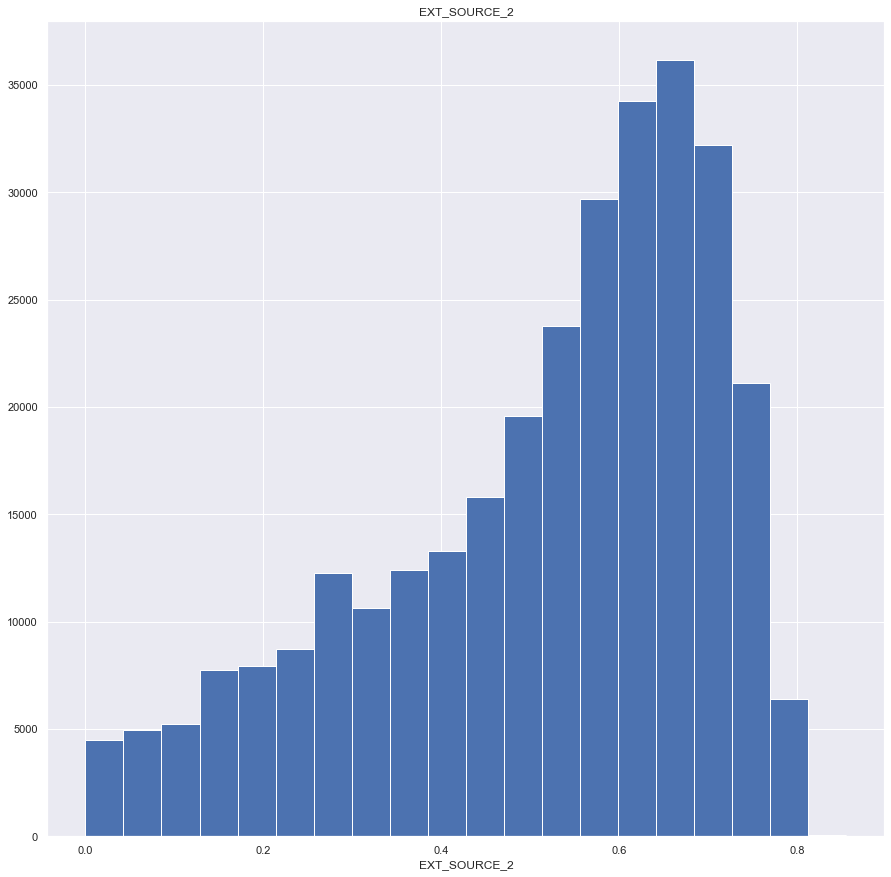

count   246546.000
mean         0.511
std          0.195
min          0.001
5%           0.155
10%          0.228
20%          0.330
30%          0.408
40%          0.476
50%          0.535
60%          0.592
70%          0.643
80%          0.694
90%          0.749
95%          0.786
99%          0.833
max          0.896
Name: EXT_SOURCE_3, dtype: float64


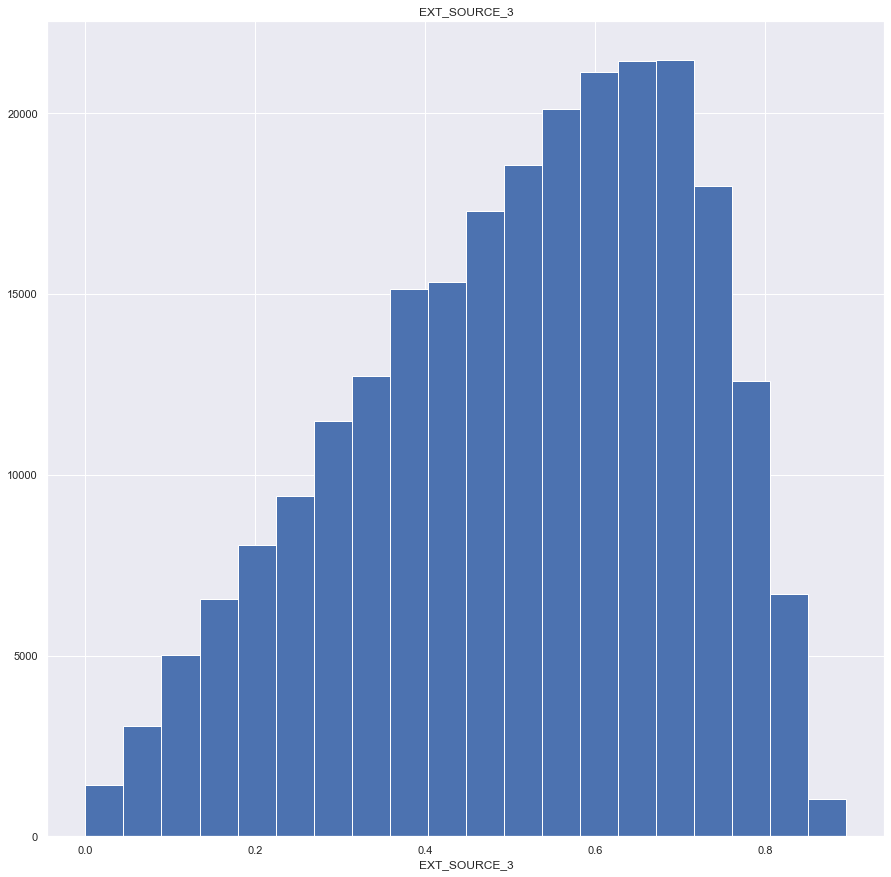

count   151450.000
mean         0.117
std          0.108
min          0.000
5%           0.008
10%          0.017
20%          0.041
30%          0.062
40%          0.074
50%          0.088
60%          0.104
70%          0.129
80%          0.166
90%          0.241
95%          0.327
99%          0.545
max          1.000
Name: APARTMENTS_AVG, dtype: float64


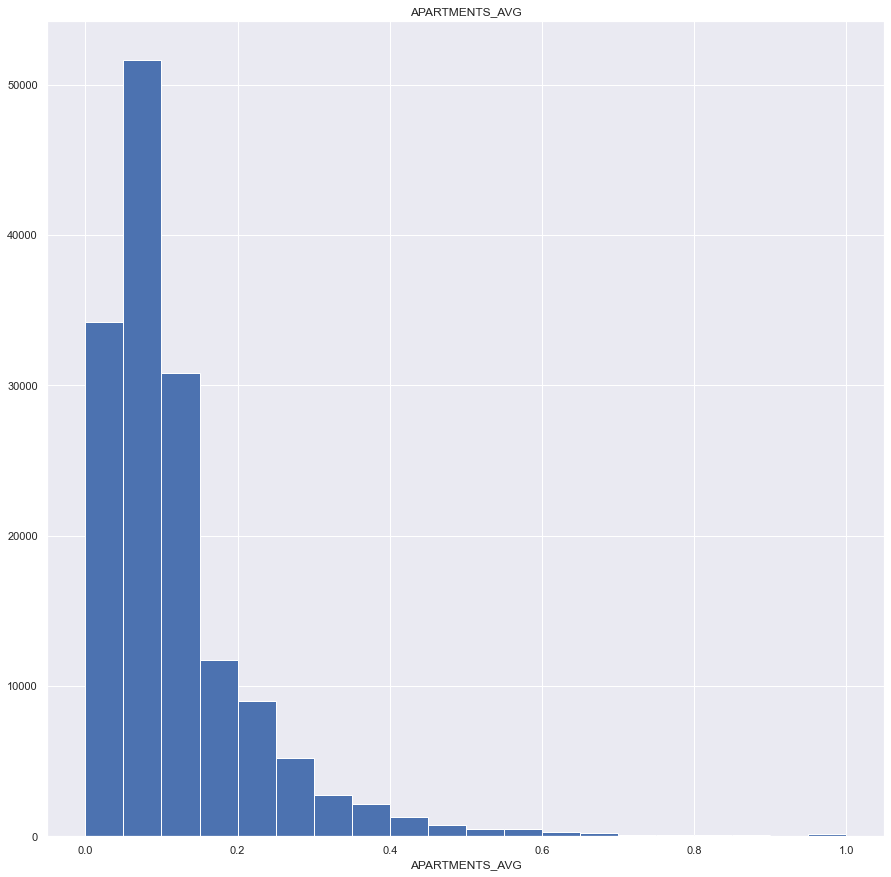

count   127568.000
mean         0.088
std          0.082
min          0.000
5%           0.000
10%          0.000
20%          0.034
30%          0.052
40%          0.064
50%          0.076
60%          0.086
70%          0.103
80%          0.124
90%          0.169
95%          0.224
99%          0.386
max          1.000
Name: BASEMENTAREA_AVG, dtype: float64


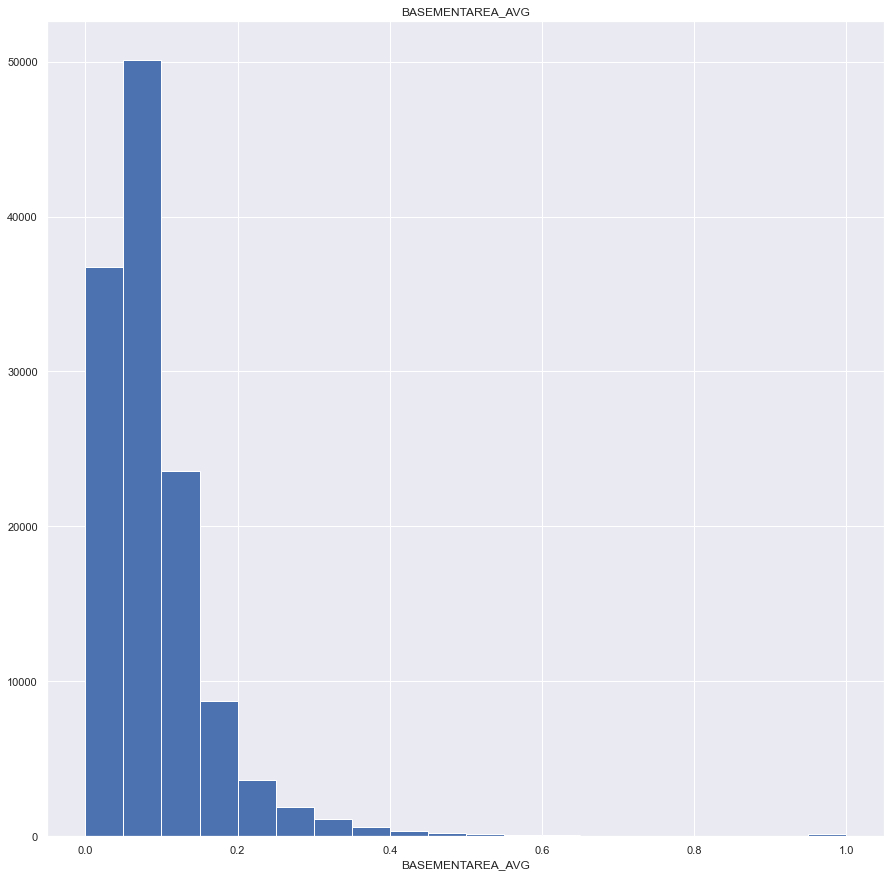

count   157504.000
mean         0.978
std          0.059
min          0.000
5%           0.969
10%          0.972
20%          0.975
30%          0.978
40%          0.980
50%          0.982
60%          0.984
70%          0.986
80%          0.988
90%          0.991
95%          0.996
99%          0.999
max          1.000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


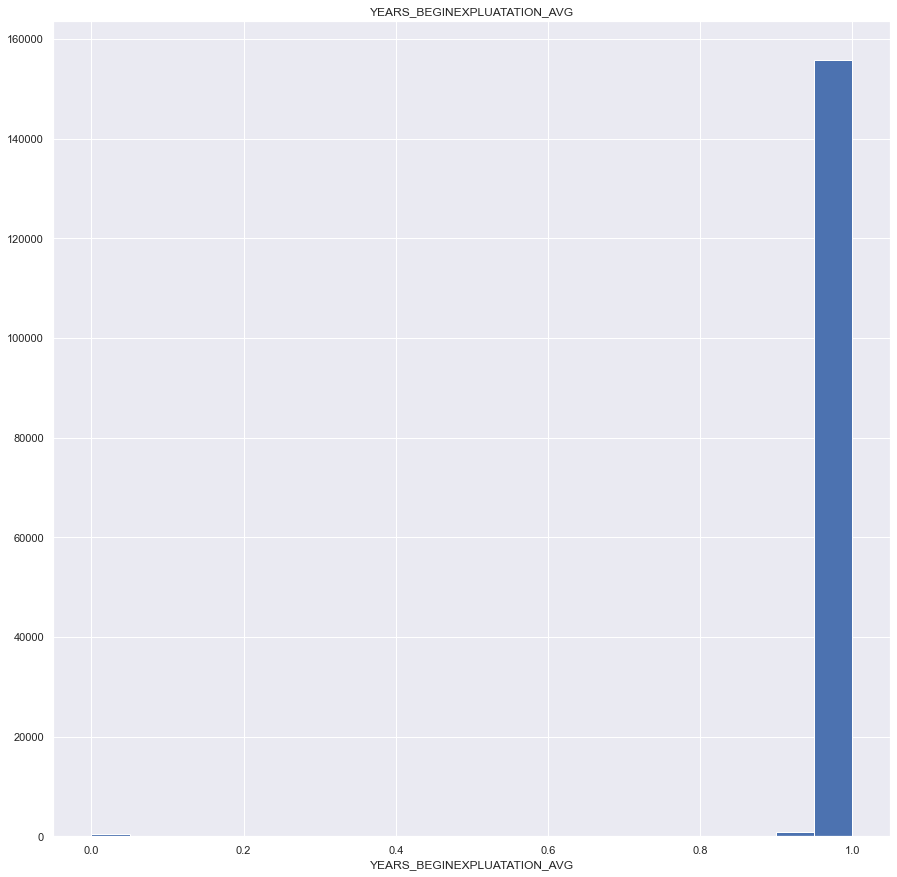

count   103023.000
mean         0.752
std          0.113
min          0.000
5%           0.592
10%          0.633
20%          0.674
30%          0.701
40%          0.728
50%          0.755
60%          0.782
70%          0.810
80%          0.830
90%          0.878
95%          0.952
99%          0.986
max          1.000
Name: YEARS_BUILD_AVG, dtype: float64


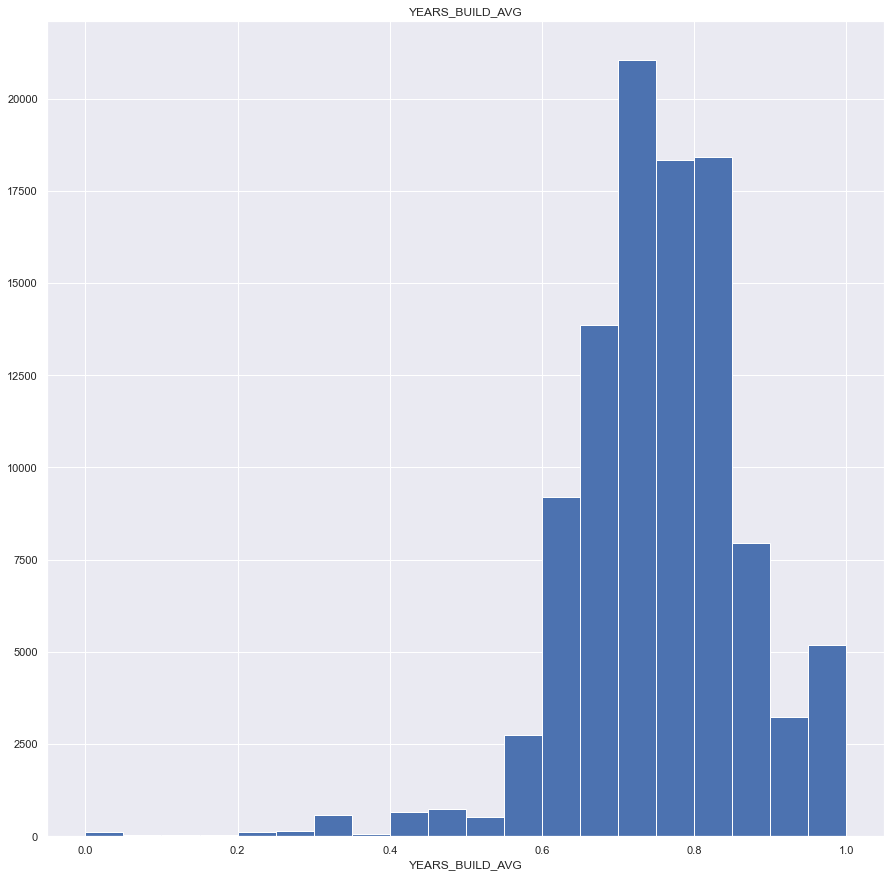

count   92646.000
mean        0.045
std         0.076
min         0.000
5%          0.000
10%         0.001
20%         0.006
30%         0.009
40%         0.014
50%         0.021
60%         0.031
70%         0.043
80%         0.062
90%         0.105
95%         0.160
99%         0.377
max         1.000
Name: COMMONAREA_AVG, dtype: float64


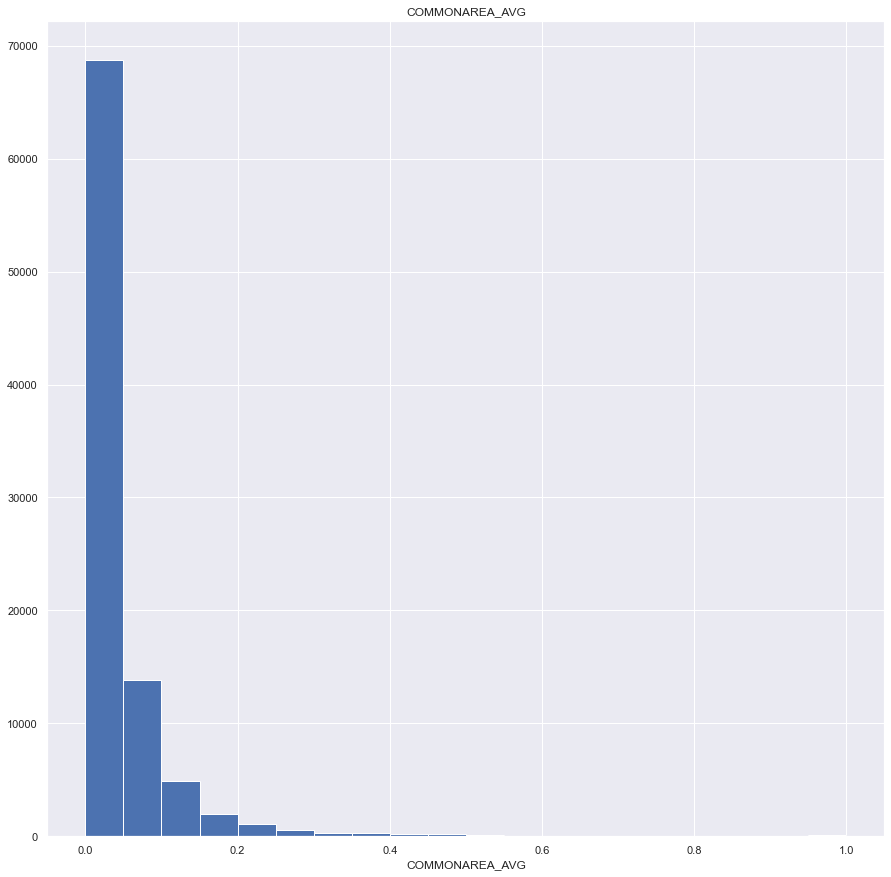

count   143620.000
mean         0.079
std          0.135
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.020
70%          0.080
80%          0.160
90%          0.240
95%          0.360
99%          0.600
max          1.000
Name: ELEVATORS_AVG, dtype: float64


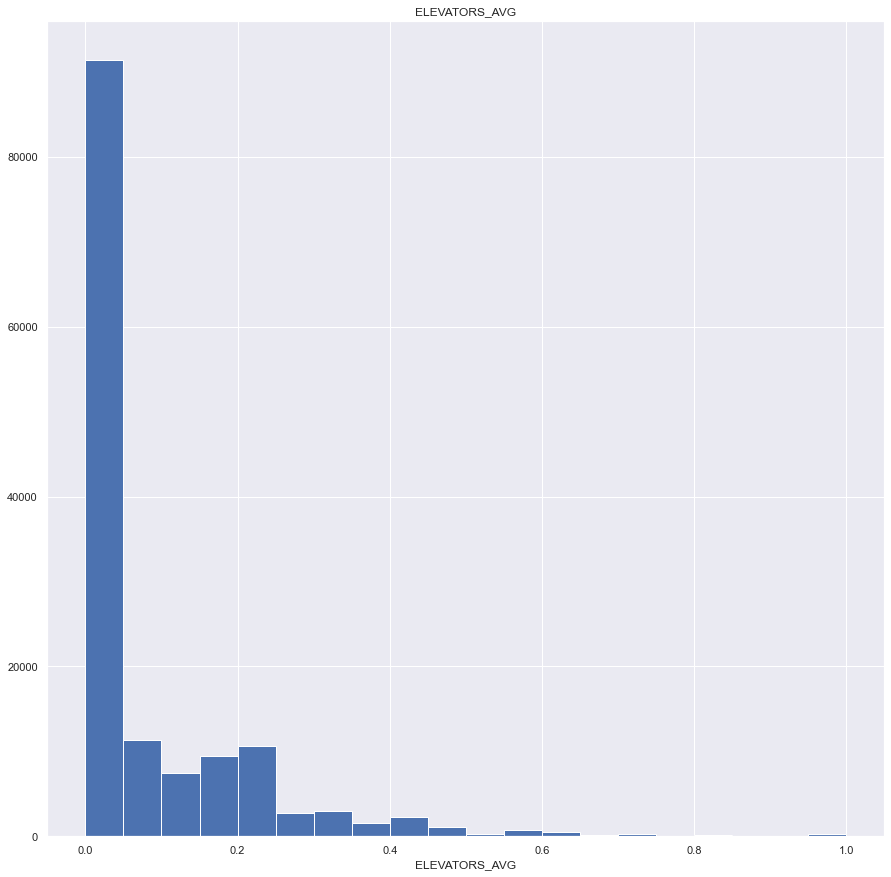

count   152683.000
mean         0.150
std          0.100
min          0.000
5%           0.035
10%          0.035
20%          0.069
30%          0.103
40%          0.103
50%          0.138
60%          0.138
70%          0.172
80%          0.207
90%          0.276
95%          0.310
99%          0.517
max          1.000
Name: ENTRANCES_AVG, dtype: float64


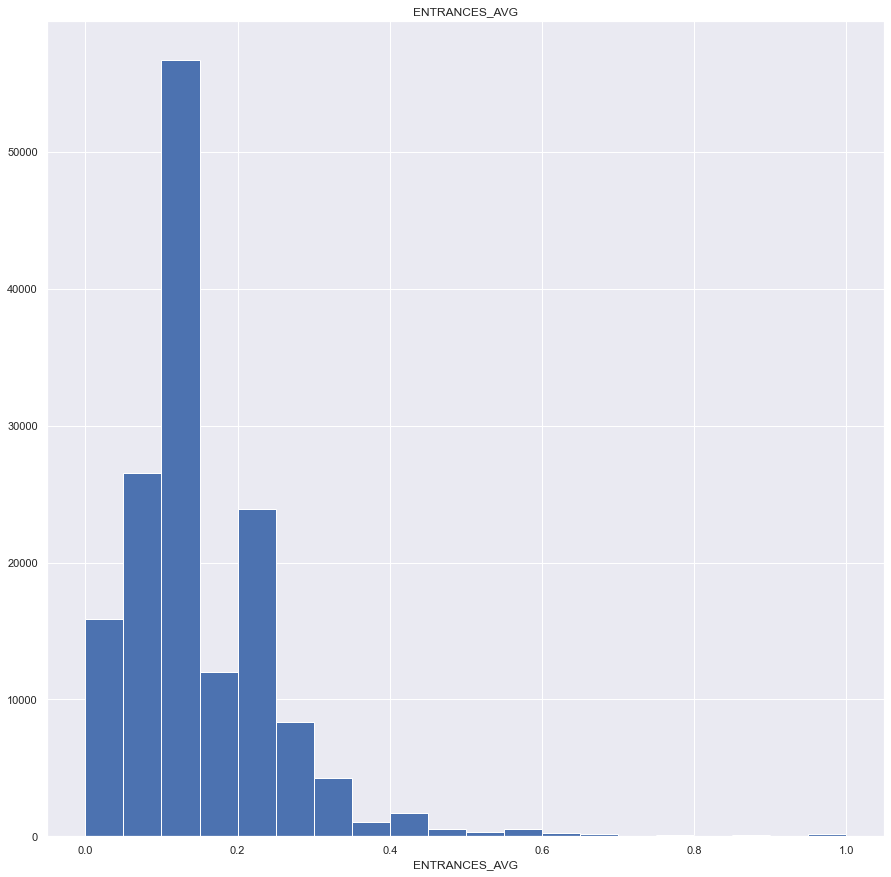

count   154491.000
mean         0.226
std          0.145
min          0.000
5%           0.042
10%          0.042
20%          0.125
30%          0.167
40%          0.167
50%          0.167
60%          0.167
70%          0.333
80%          0.333
90%          0.375
95%          0.479
99%          0.667
max          1.000
Name: FLOORSMAX_AVG, dtype: float64


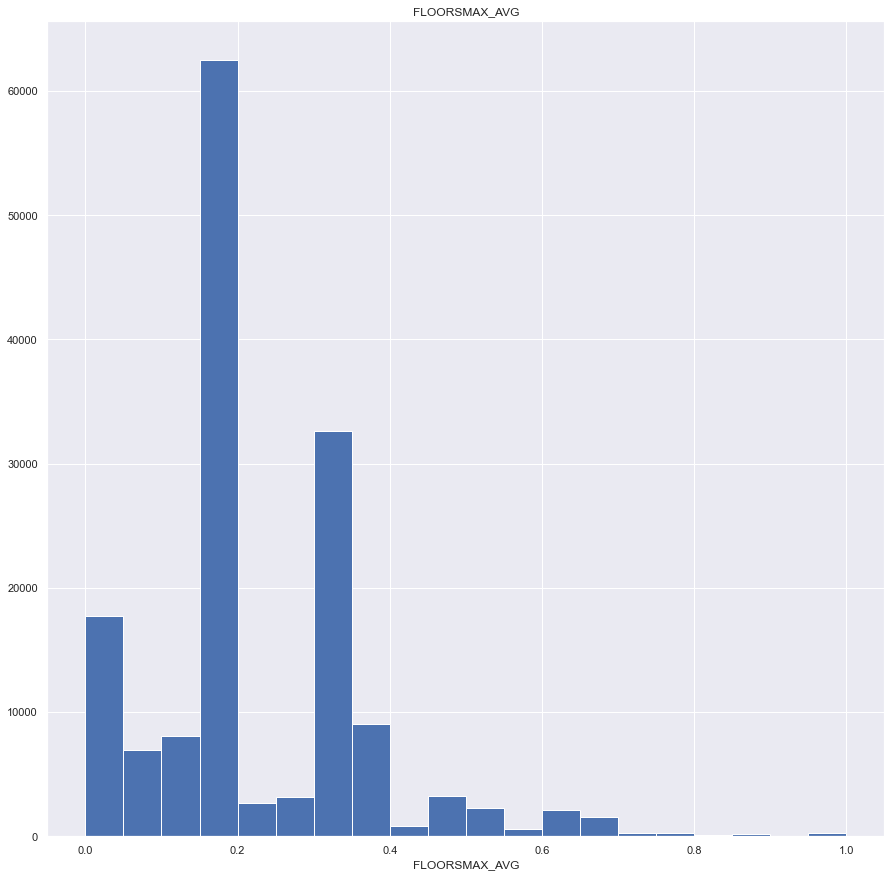

count   98869.000
mean        0.232
std         0.161
min         0.000
5%          0.042
10%         0.042
20%         0.042
30%         0.167
40%         0.208
50%         0.208
60%         0.208
70%         0.333
80%         0.375
90%         0.417
95%         0.500
99%         0.708
max         1.000
Name: FLOORSMIN_AVG, dtype: float64


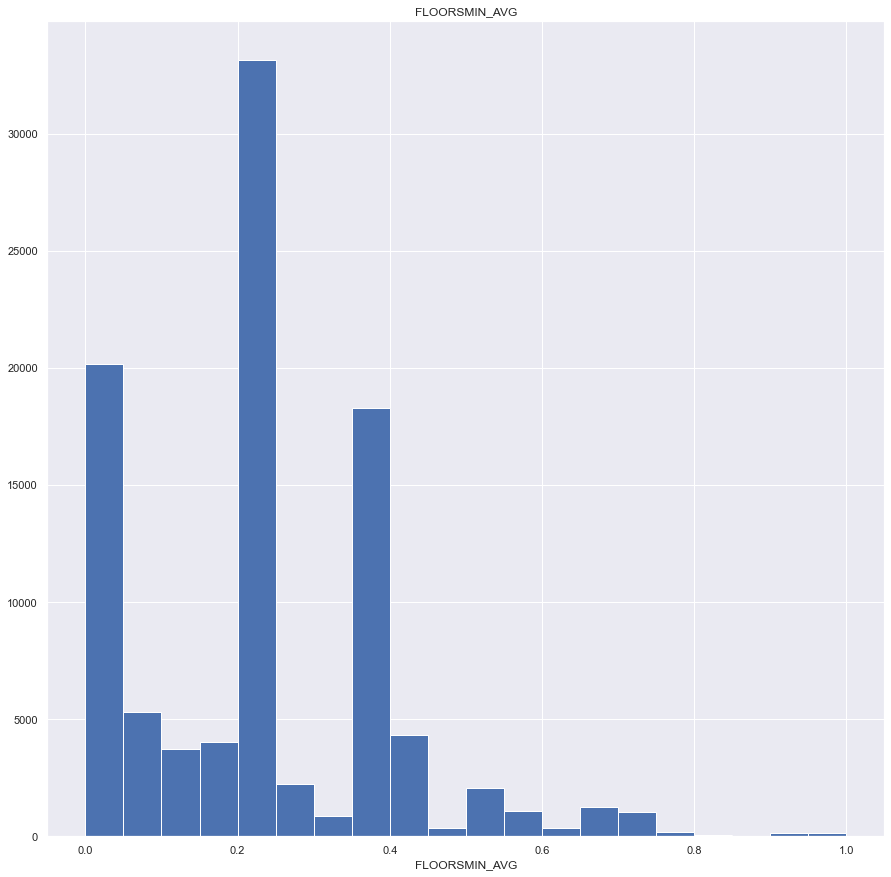

count   124921.000
mean         0.066
std          0.081
min          0.000
5%           0.000
10%          0.000
20%          0.014
30%          0.024
40%          0.036
50%          0.048
60%          0.061
70%          0.076
80%          0.098
90%          0.141
95%          0.195
99%          0.375
max          1.000
Name: LANDAREA_AVG, dtype: float64


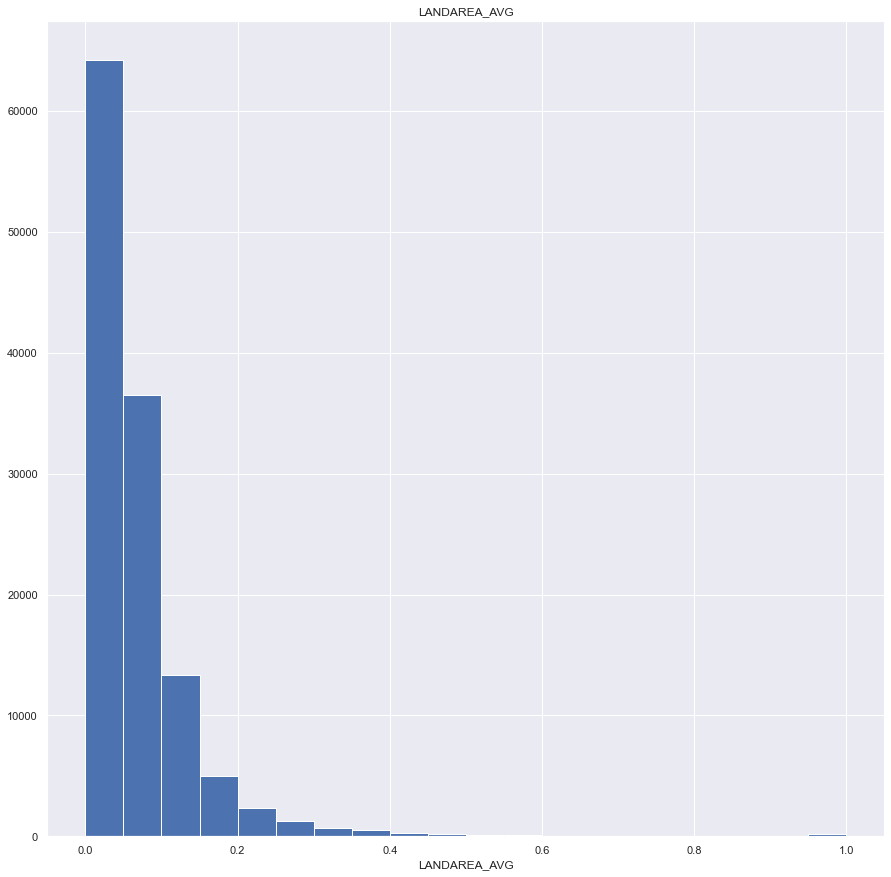

count   97312.000
mean        0.101
std         0.093
min         0.000
5%          0.010
10%         0.020
20%         0.043
30%         0.054
40%         0.064
50%         0.076
60%         0.090
70%         0.108
80%         0.144
90%         0.206
95%         0.272
99%         0.454
max         1.000
Name: LIVINGAPARTMENTS_AVG, dtype: float64


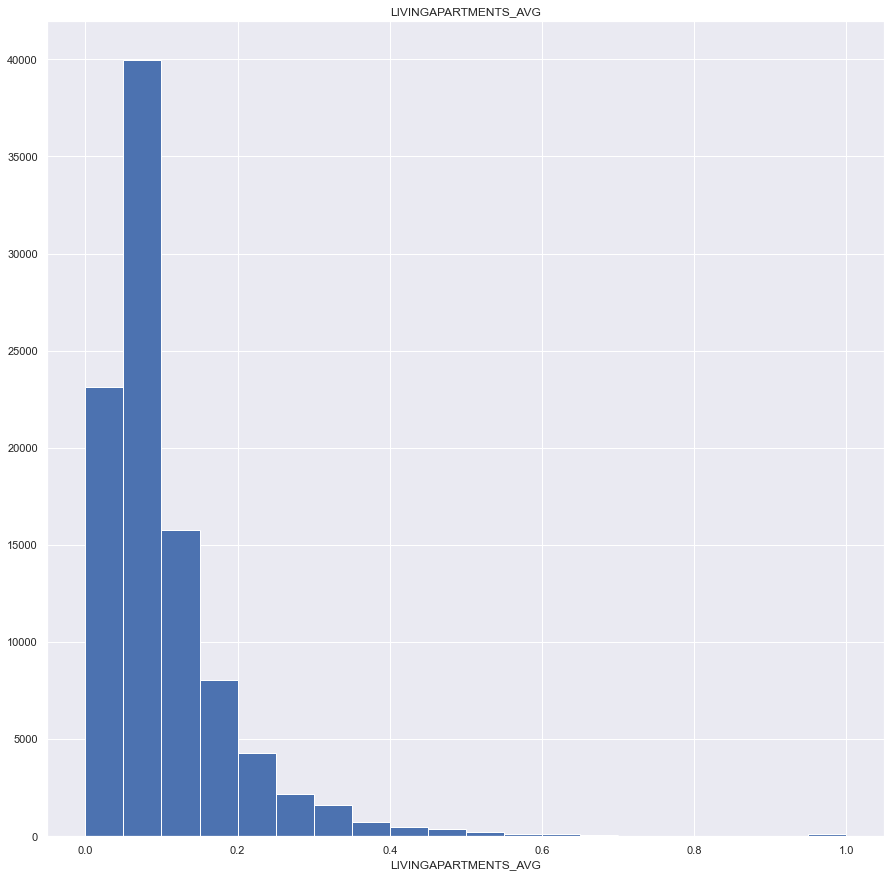

count   153161.000
mean         0.107
std          0.111
min          0.000
5%           0.008
10%          0.014
20%          0.036
30%          0.051
40%          0.063
50%          0.074
60%          0.089
70%          0.113
80%          0.154
90%          0.233
95%          0.321
99%          0.551
max          1.000
Name: LIVINGAREA_AVG, dtype: float64


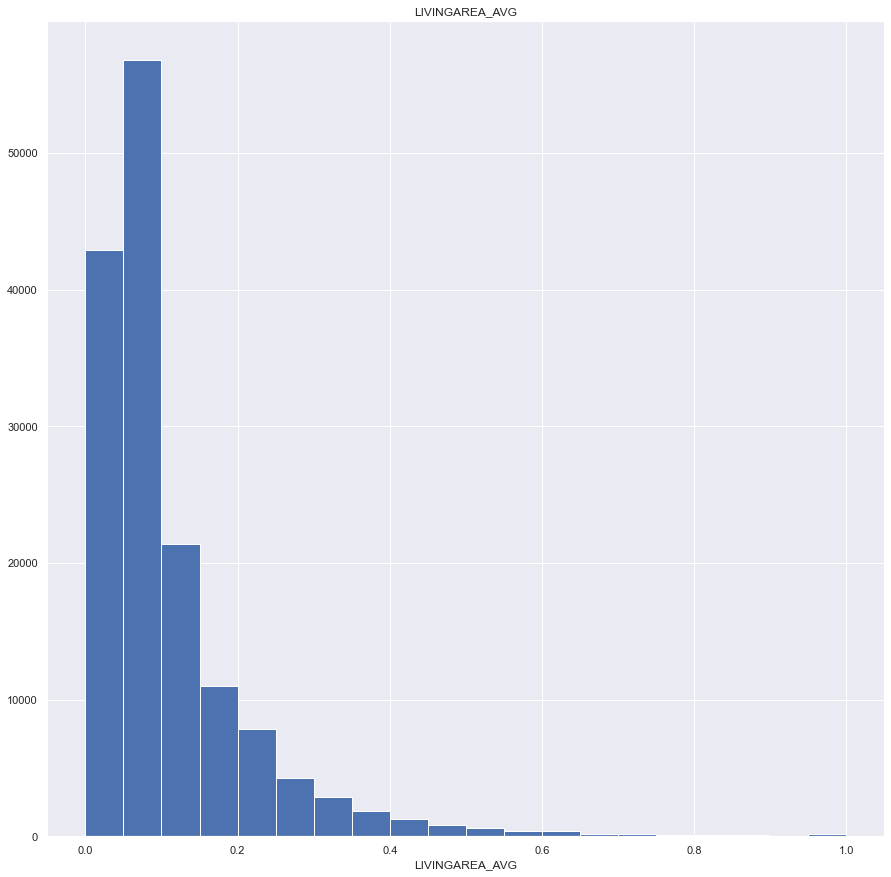

count   93997.000
mean        0.009
std         0.048
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.002
70%         0.004
80%         0.008
90%         0.015
95%         0.031
99%         0.108
max         1.000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


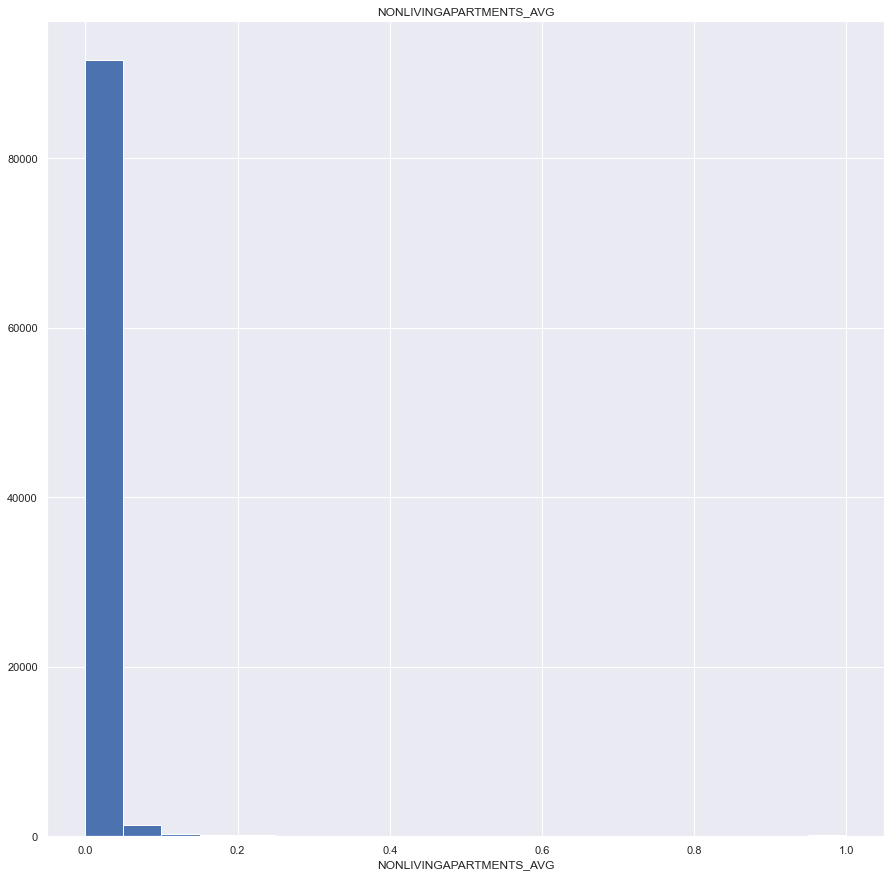

count   137829.000
mean         0.028
std          0.070
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.004
60%          0.009
70%          0.019
80%          0.039
90%          0.081
95%          0.128
99%          0.317
max          1.000
Name: NONLIVINGAREA_AVG, dtype: float64


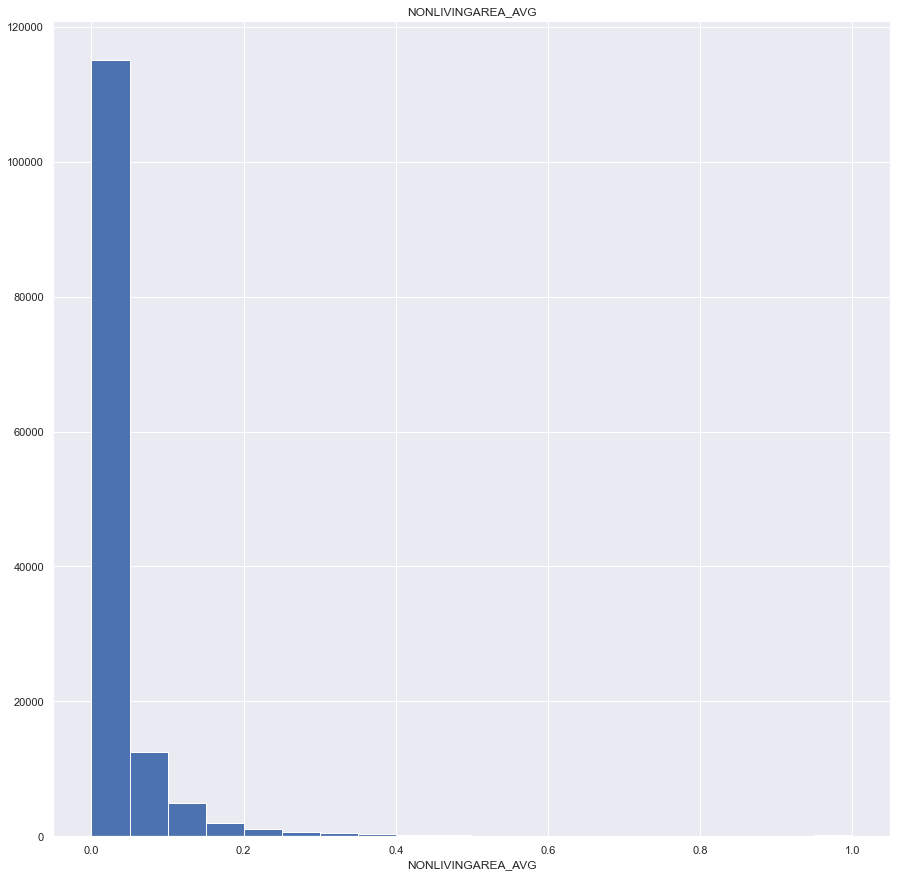

count   151450.000
mean         0.114
std          0.108
min          0.000
5%           0.008
10%          0.017
20%          0.038
30%          0.063
40%          0.073
50%          0.084
60%          0.103
70%          0.126
80%          0.160
90%          0.231
95%          0.319
99%          0.541
max          1.000
Name: APARTMENTS_MODE, dtype: float64


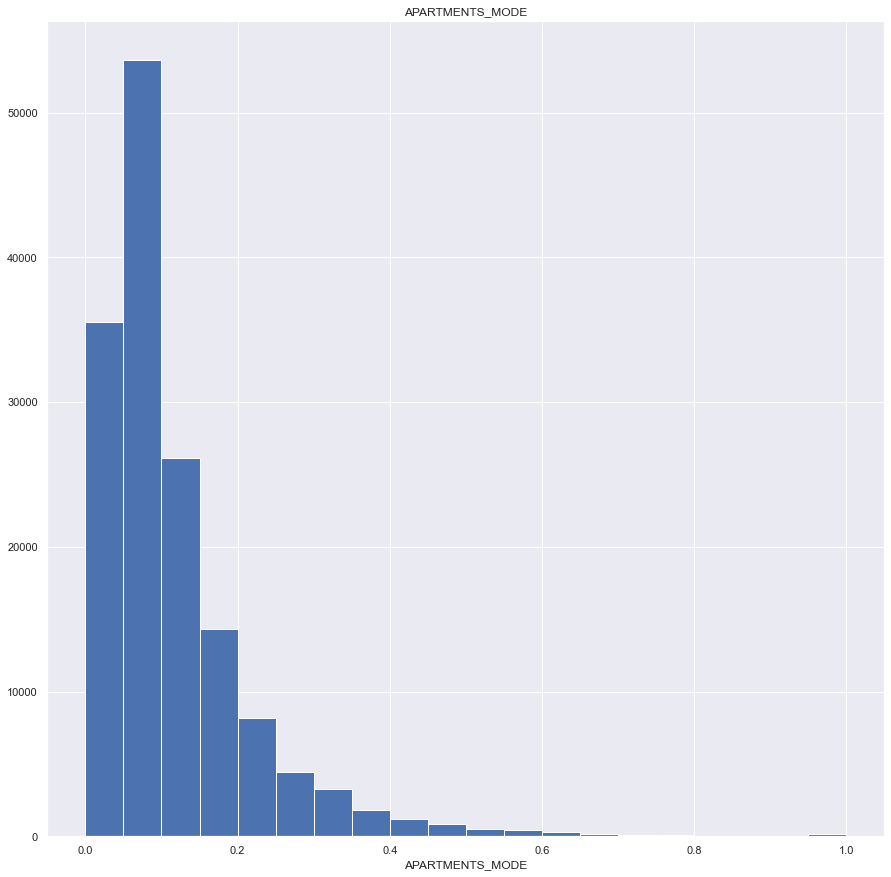

count   127568.000
mean         0.088
std          0.084
min          0.000
5%           0.000
10%          0.000
20%          0.030
30%          0.049
40%          0.063
50%          0.075
60%          0.086
70%          0.103
80%          0.124
90%          0.170
95%          0.228
99%          0.396
max          1.000
Name: BASEMENTAREA_MODE, dtype: float64


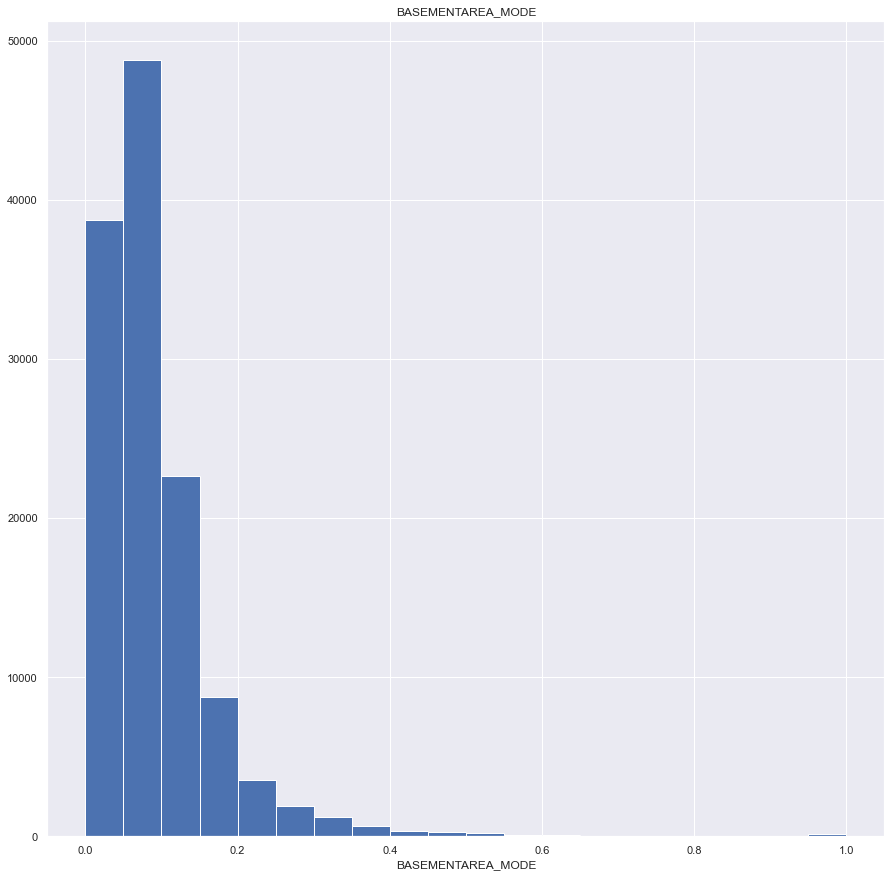

count   157504.000
mean         0.977
std          0.065
min          0.000
5%           0.968
10%          0.972
20%          0.975
30%          0.978
40%          0.980
50%          0.982
60%          0.984
70%          0.986
80%          0.988
90%          0.991
95%          0.996
99%          0.999
max          1.000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


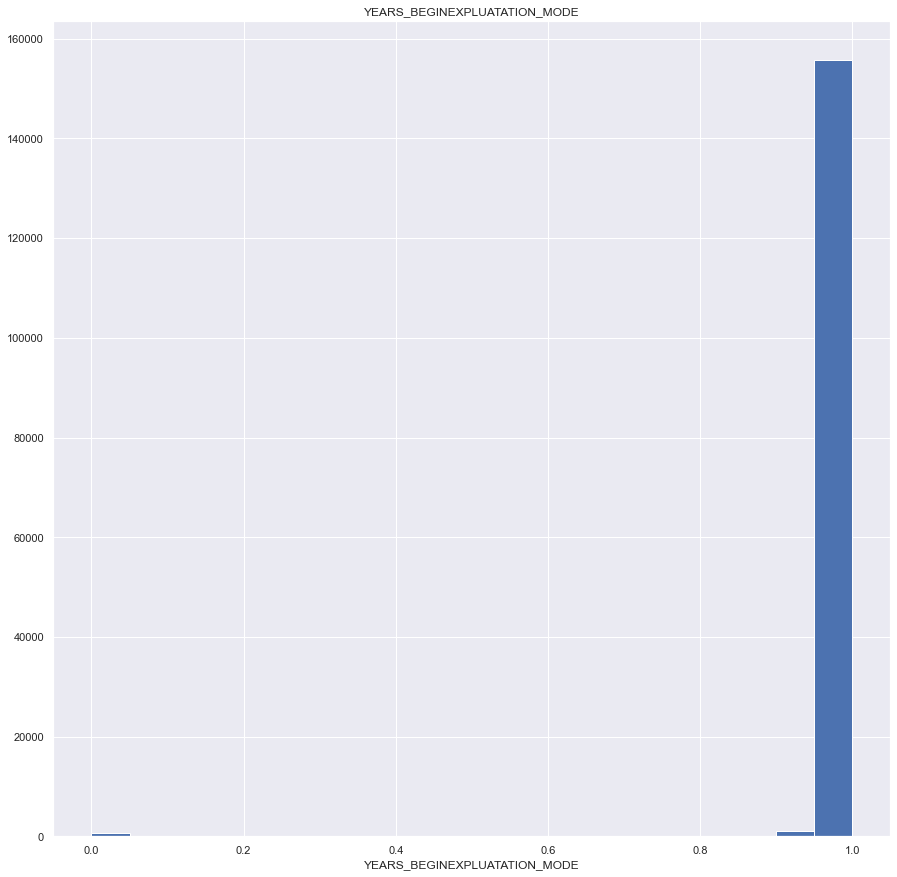

count   103023.000
mean         0.760
std          0.110
min          0.000
5%           0.608
10%          0.647
20%          0.680
30%          0.713
40%          0.739
50%          0.765
60%          0.791
70%          0.817
80%          0.837
90%          0.882
95%          0.954
99%          0.987
max          1.000
Name: YEARS_BUILD_MODE, dtype: float64


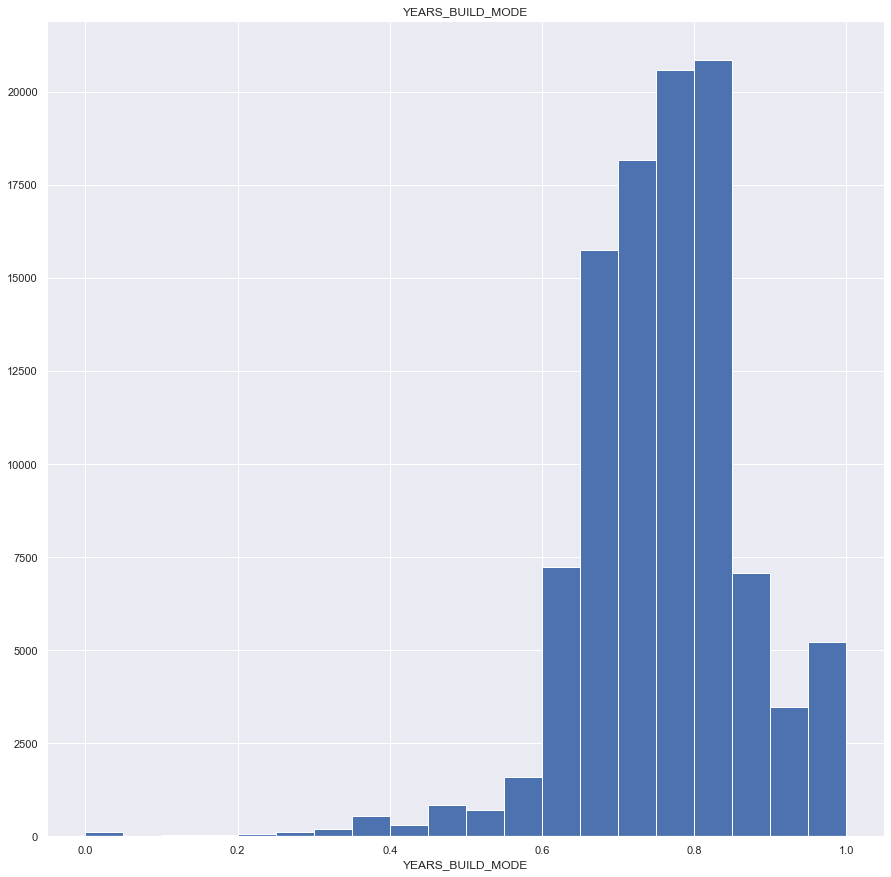

count   92646.000
mean        0.043
std         0.074
min         0.000
5%          0.000
10%         0.000
20%         0.005
30%         0.009
40%         0.013
50%         0.019
60%         0.029
70%         0.041
80%         0.059
90%         0.101
95%         0.153
99%         0.366
max         1.000
Name: COMMONAREA_MODE, dtype: float64


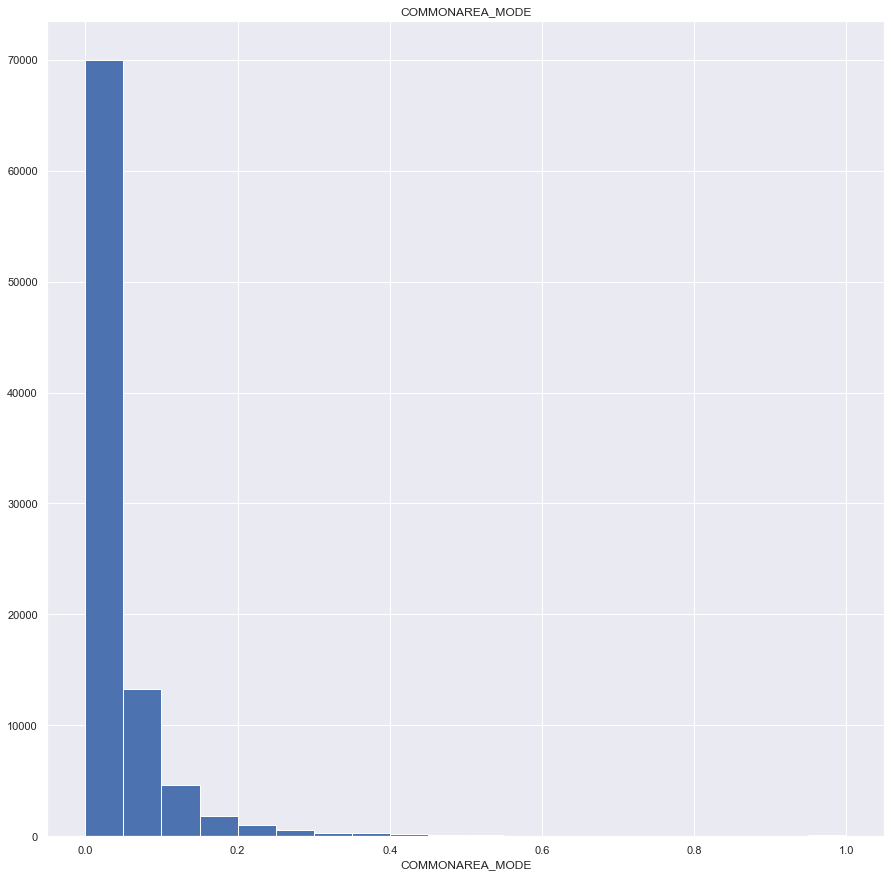

count   143620.000
mean         0.074
std          0.132
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.081
80%          0.161
90%          0.242
95%          0.322
99%          0.604
max          1.000
Name: ELEVATORS_MODE, dtype: float64


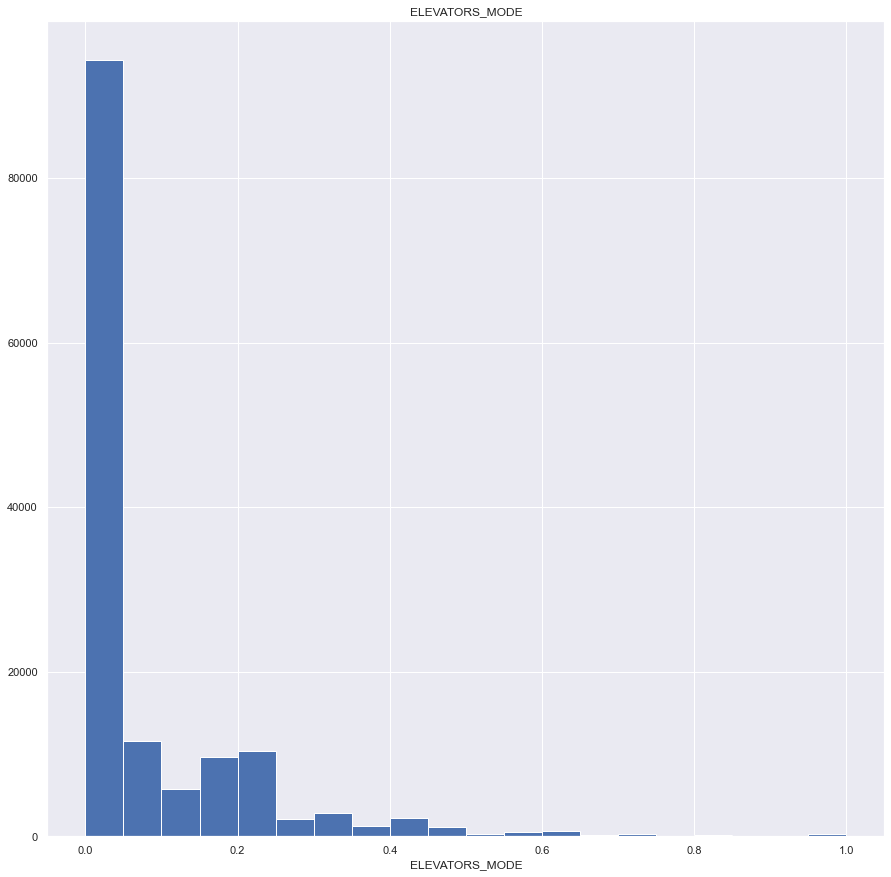

count   152683.000
mean         0.145
std          0.101
min          0.000
5%           0.035
10%          0.035
20%          0.069
30%          0.069
40%          0.103
50%          0.138
60%          0.138
70%          0.172
80%          0.207
90%          0.276
95%          0.310
99%          0.517
max          1.000
Name: ENTRANCES_MODE, dtype: float64


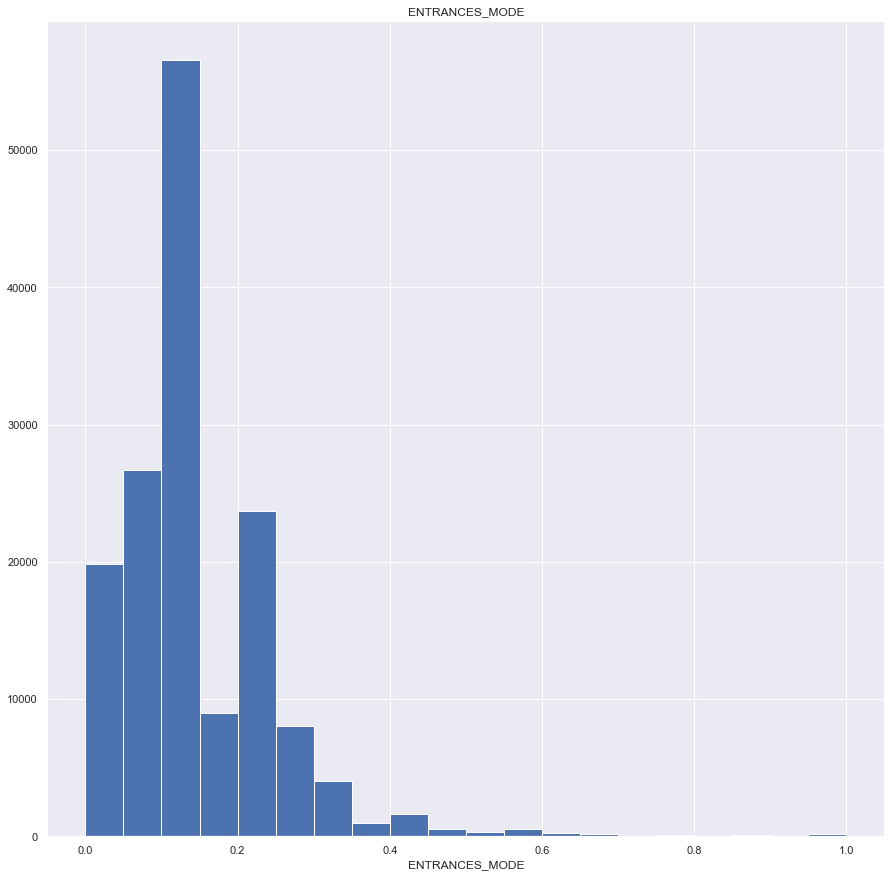

count   154491.000
mean         0.222
std          0.144
min          0.000
5%           0.042
10%          0.042
20%          0.125
30%          0.167
40%          0.167
50%          0.167
60%          0.167
70%          0.333
80%          0.333
90%          0.375
95%          0.458
99%          0.667
max          1.000
Name: FLOORSMAX_MODE, dtype: float64


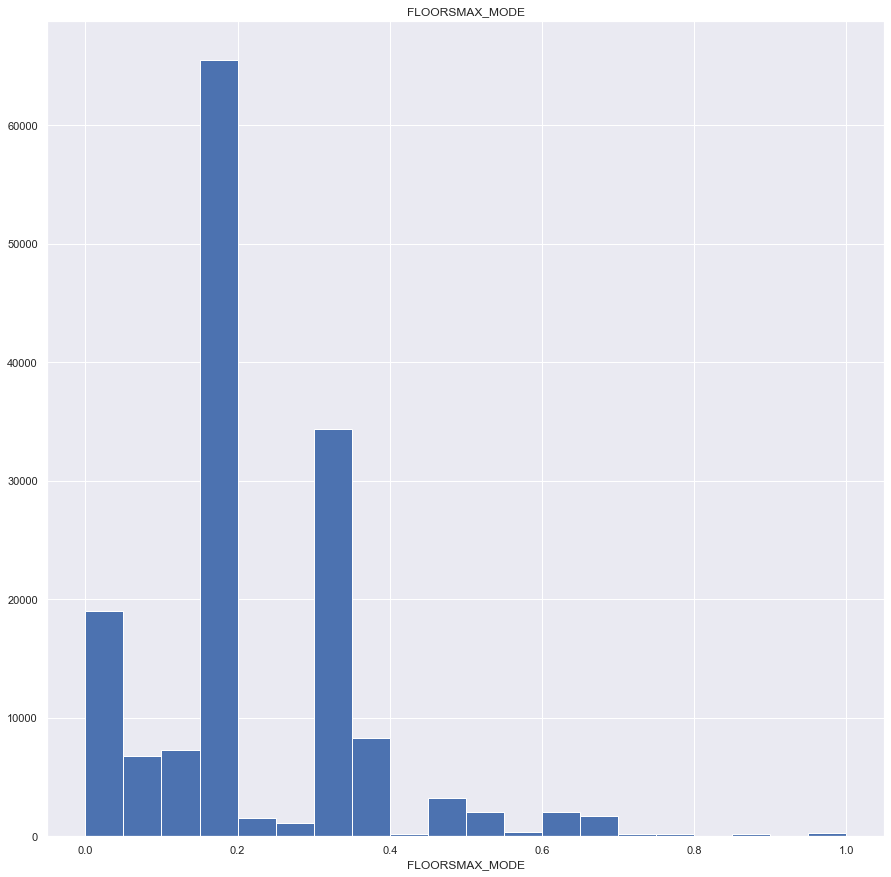

count   98869.000
mean        0.228
std         0.161
min         0.000
5%          0.042
10%         0.042
20%         0.042
30%         0.125
40%         0.208
50%         0.208
60%         0.208
70%         0.333
80%         0.375
90%         0.417
95%         0.500
99%         0.708
max         1.000
Name: FLOORSMIN_MODE, dtype: float64


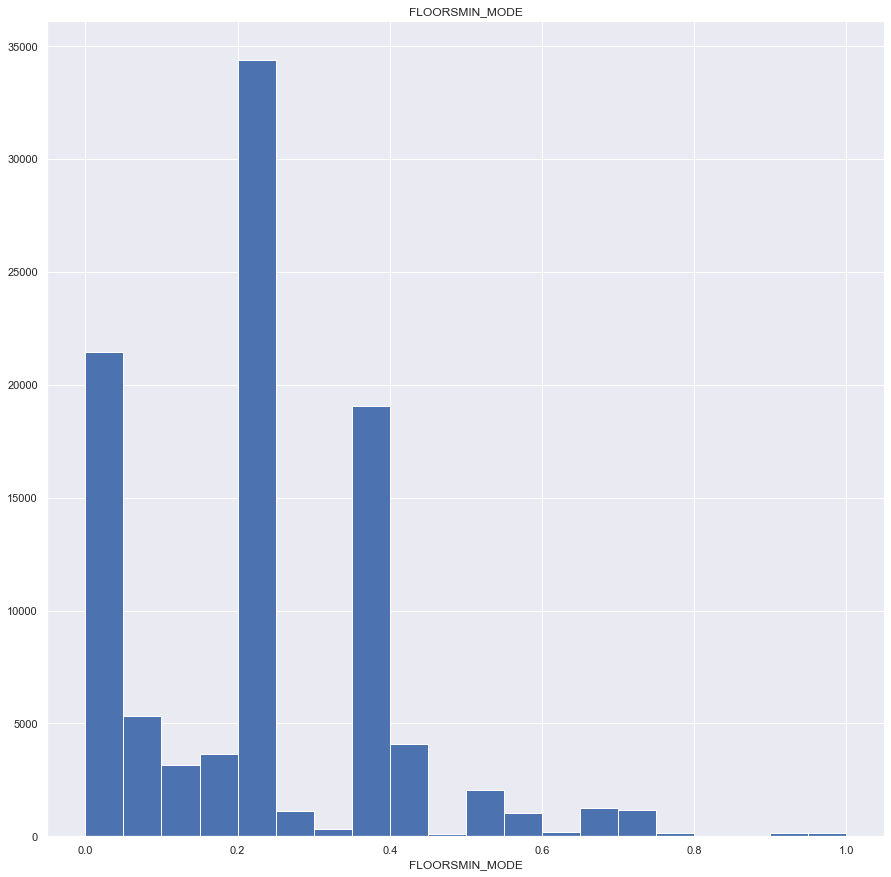

count   124921.000
mean         0.065
std          0.082
min          0.000
5%           0.000
10%          0.000
20%          0.012
30%          0.022
40%          0.033
50%          0.046
60%          0.059
70%          0.074
80%          0.097
90%          0.141
95%          0.196
99%          0.379
max          1.000
Name: LANDAREA_MODE, dtype: float64


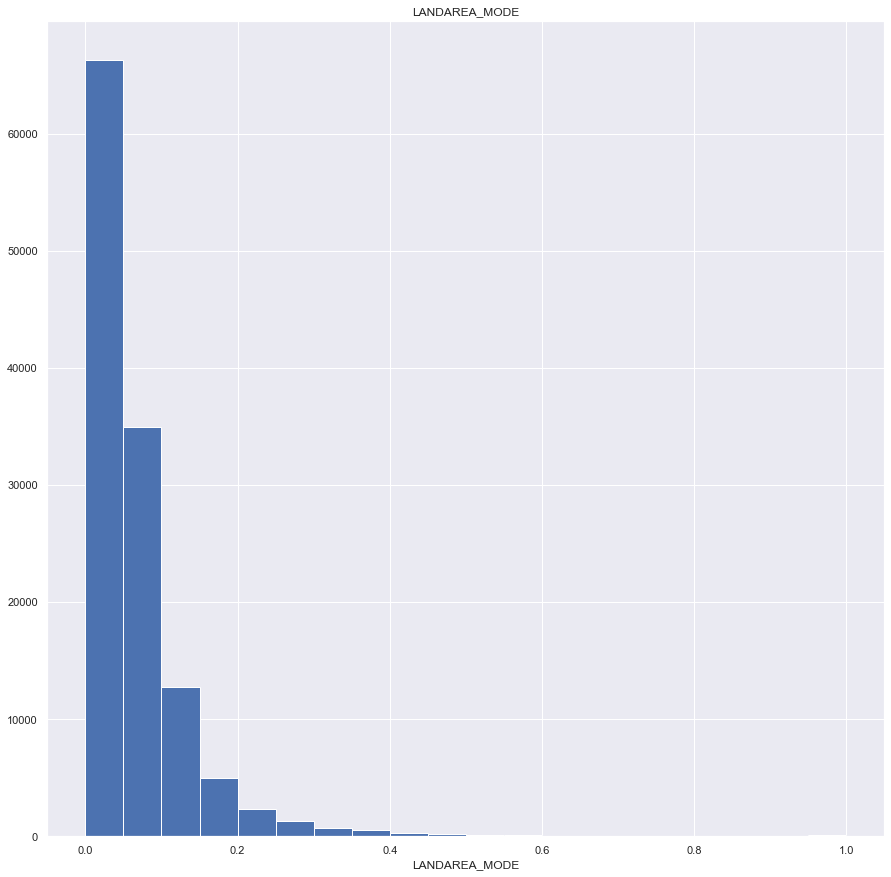

count   97312.000
mean        0.106
std         0.098
min         0.000
5%          0.011
10%         0.020
20%         0.044
30%         0.055
40%         0.066
50%         0.077
60%         0.092
70%         0.113
80%         0.147
90%         0.217
95%         0.295
99%         0.488
max         1.000
Name: LIVINGAPARTMENTS_MODE, dtype: float64


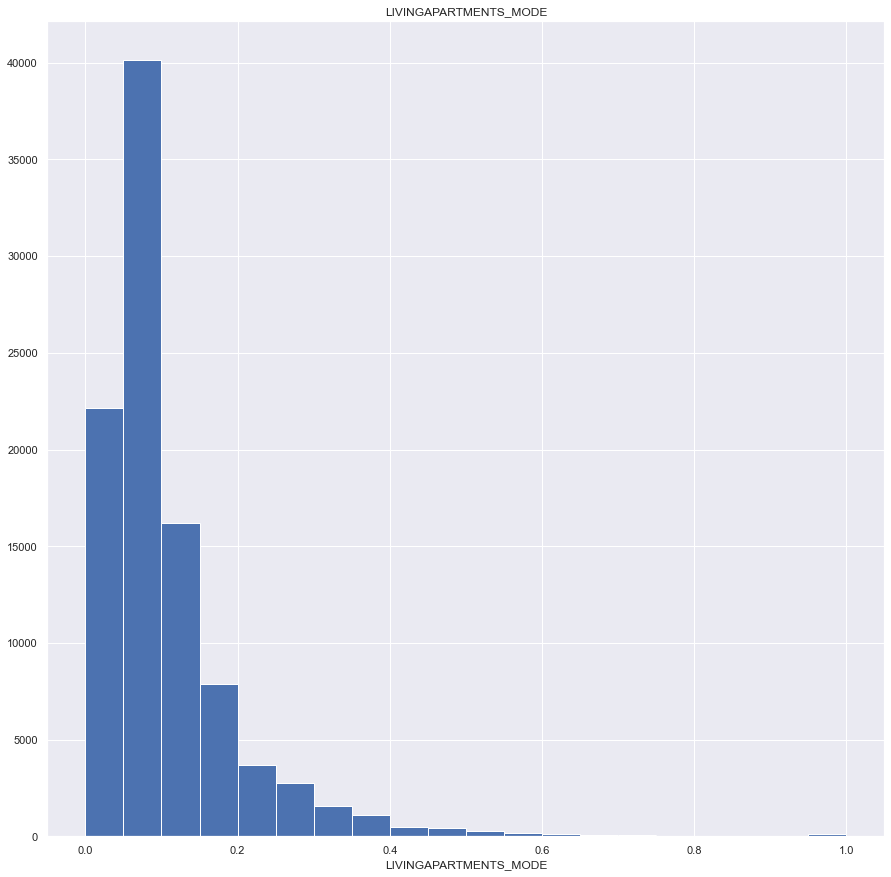

count   153161.000
mean         0.106
std          0.112
min          0.000
5%           0.008
10%          0.013
20%          0.033
30%          0.051
40%          0.062
50%          0.073
60%          0.089
70%          0.110
80%          0.151
90%          0.234
95%          0.323
99%          0.562
max          1.000
Name: LIVINGAREA_MODE, dtype: float64


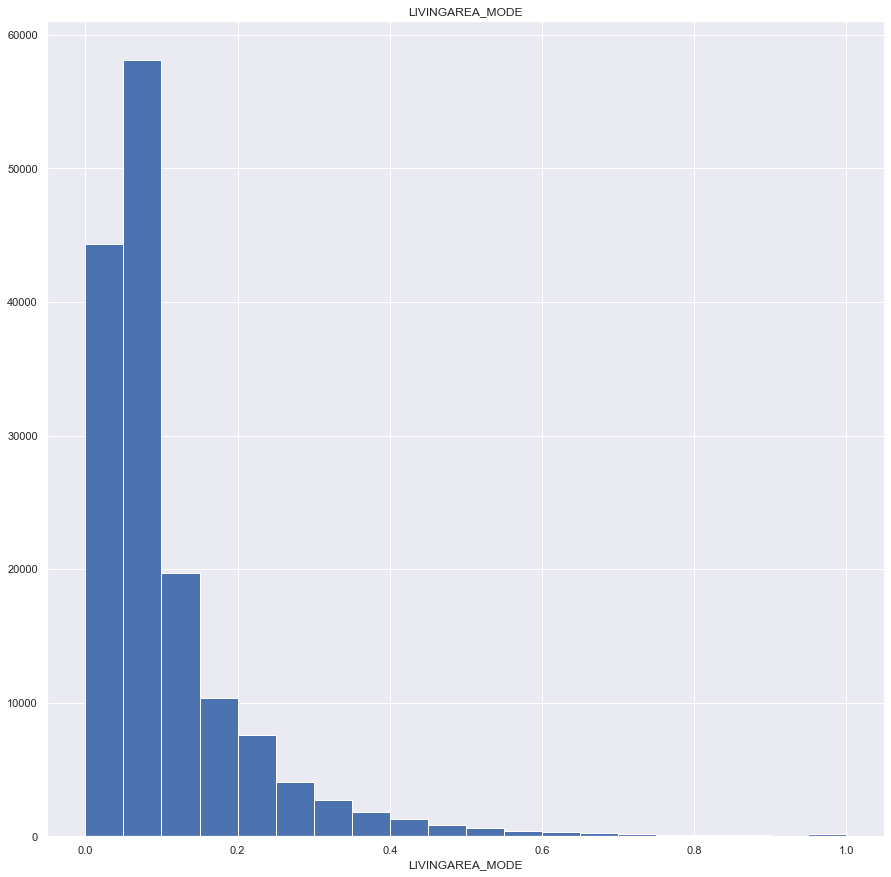

count   93997.000
mean        0.008
std         0.046
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.004
80%         0.008
90%         0.016
95%         0.027
99%         0.097
max         1.000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64


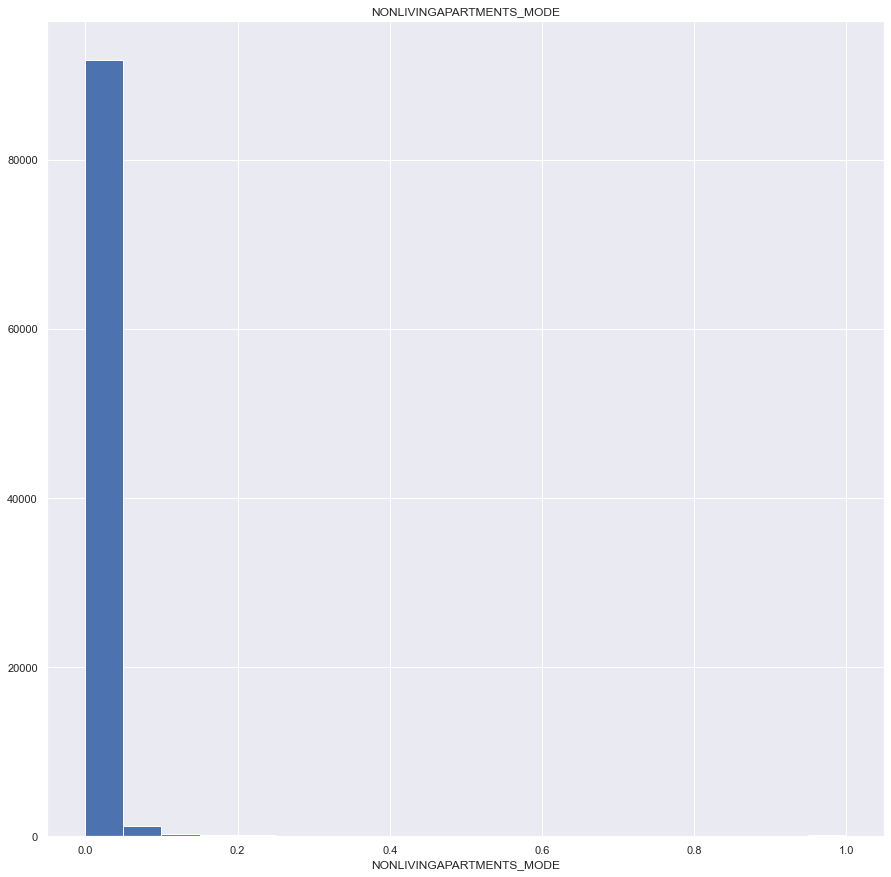

count   137829.000
mean         0.027
std          0.070
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.001
60%          0.006
70%          0.015
80%          0.035
90%          0.079
95%          0.129
99%          0.322
max          1.000
Name: NONLIVINGAREA_MODE, dtype: float64


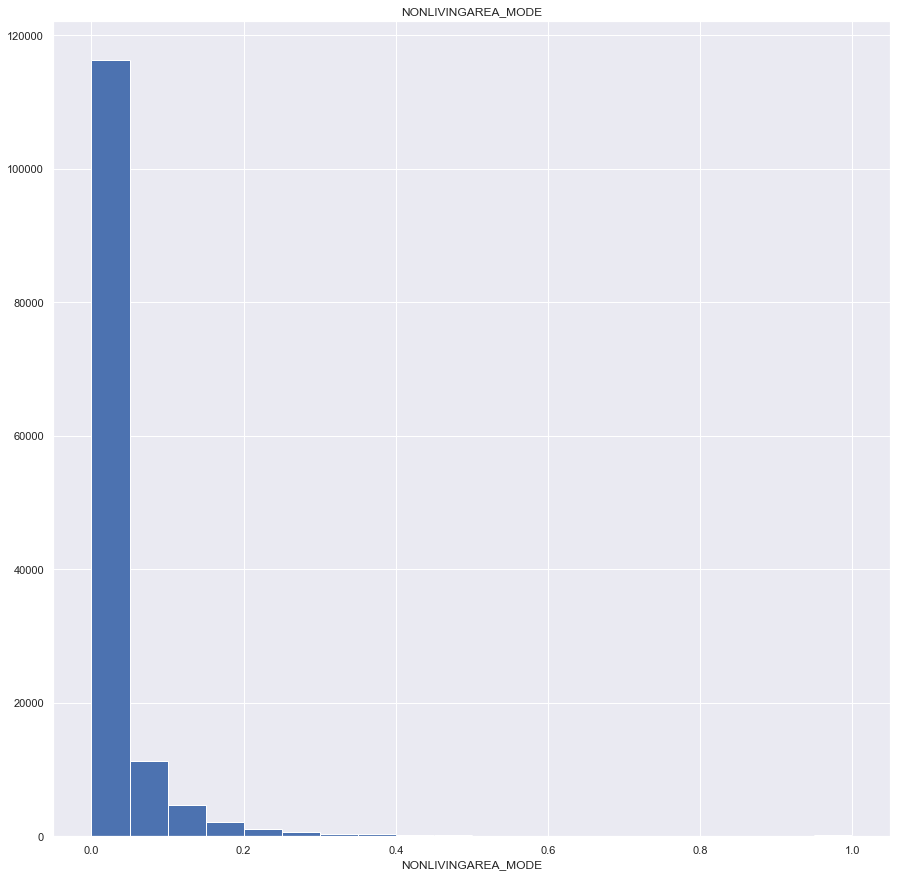

count   151450.000
mean         0.118
std          0.109
min          0.000
5%           0.008
10%          0.017
20%          0.042
30%          0.062
40%          0.075
50%          0.086
60%          0.104
70%          0.128
80%          0.167
90%          0.242
95%          0.330
99%          0.550
max          1.000
Name: APARTMENTS_MEDI, dtype: float64


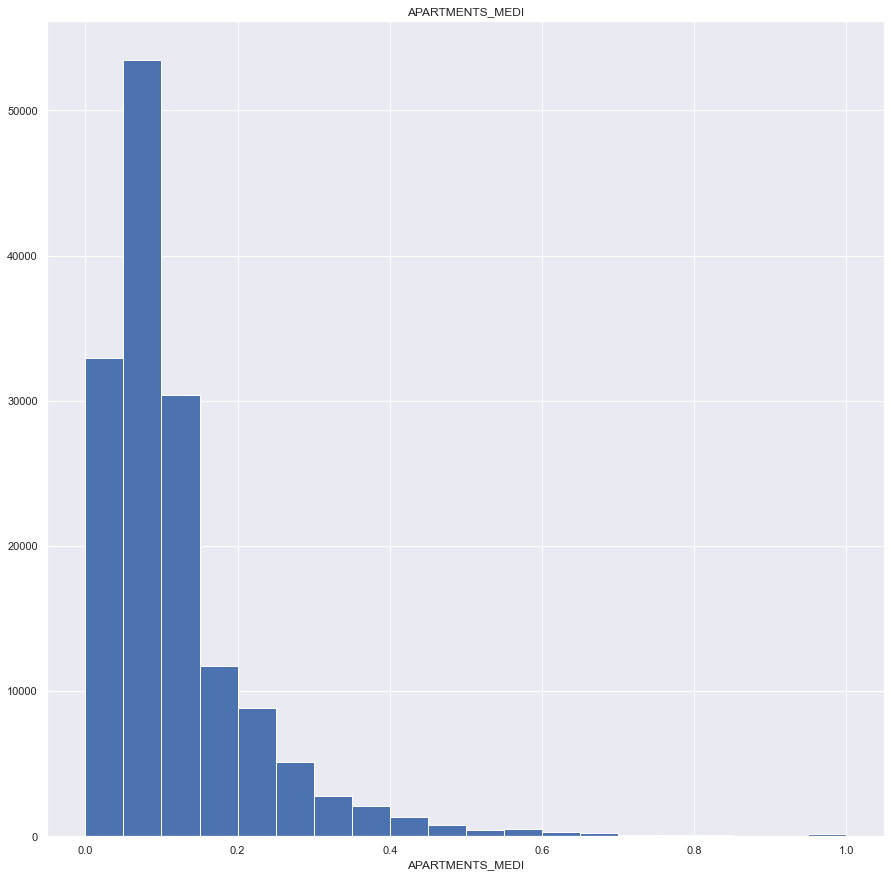

count   127568.000
mean         0.088
std          0.082
min          0.000
5%           0.000
10%          0.000
20%          0.034
30%          0.051
40%          0.063
50%          0.076
60%          0.085
70%          0.102
80%          0.124
90%          0.168
95%          0.223
99%          0.385
max          1.000
Name: BASEMENTAREA_MEDI, dtype: float64


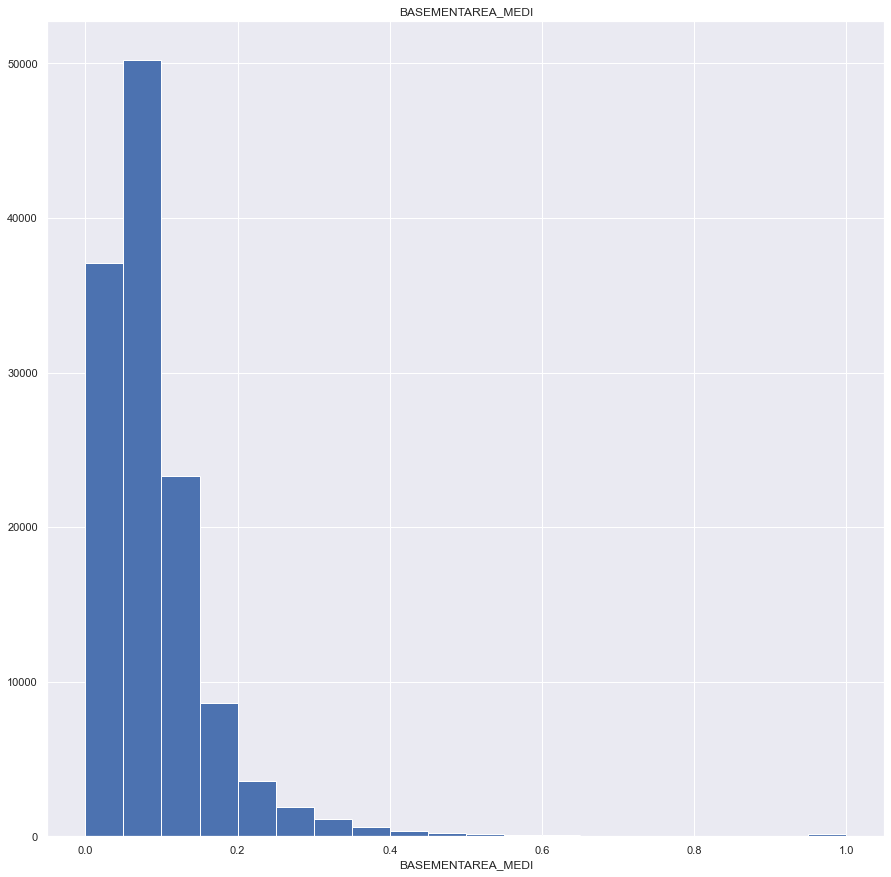

count   157504.000
mean         0.978
std          0.060
min          0.000
5%           0.969
10%          0.972
20%          0.975
30%          0.978
40%          0.980
50%          0.982
60%          0.984
70%          0.986
80%          0.988
90%          0.991
95%          0.996
99%          0.999
max          1.000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


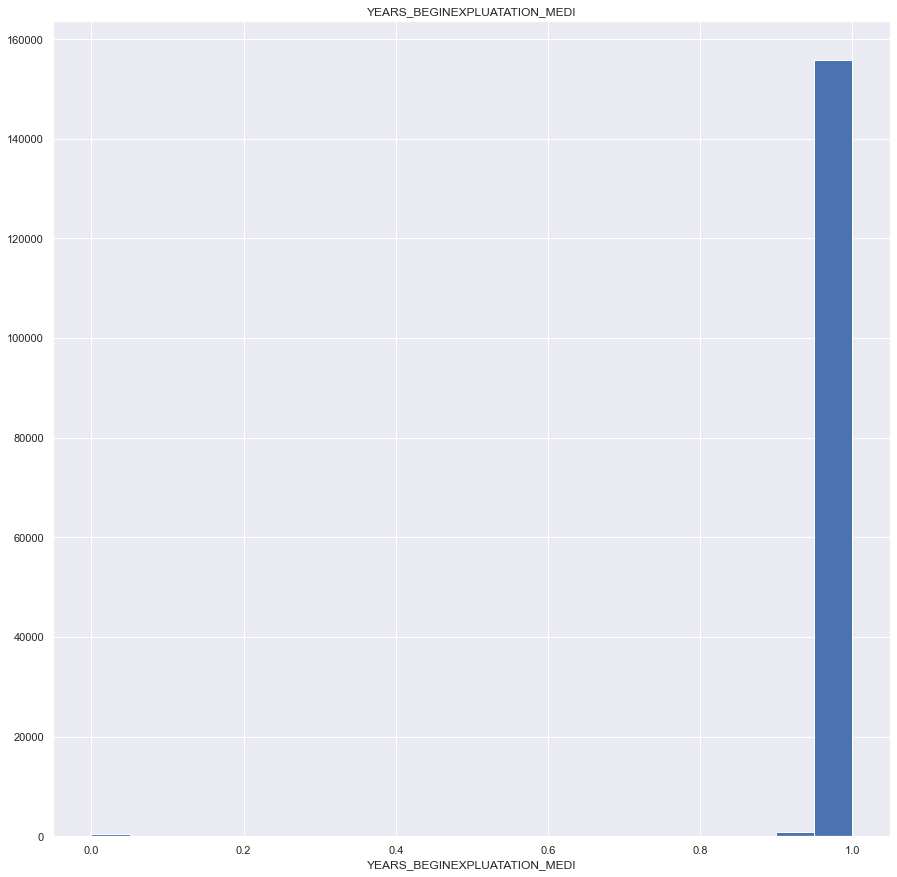

count   103023.000
mean         0.756
std          0.112
min          0.000
5%           0.598
10%          0.638
20%          0.678
30%          0.705
40%          0.732
50%          0.758
60%          0.785
70%          0.812
80%          0.832
90%          0.879
95%          0.953
99%          0.987
max          1.000
Name: YEARS_BUILD_MEDI, dtype: float64


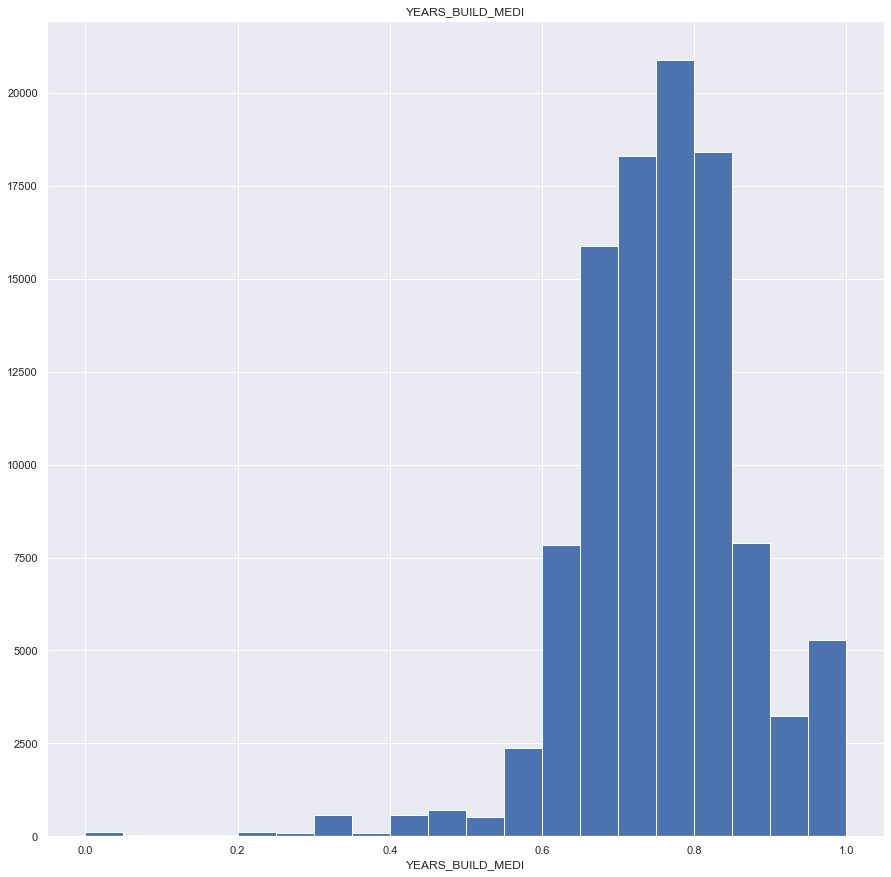

count   92646.000
mean        0.045
std         0.076
min         0.000
5%          0.000
10%         0.001
20%         0.006
30%         0.009
40%         0.014
50%         0.021
60%         0.030
70%         0.043
80%         0.062
90%         0.105
95%         0.161
99%         0.379
max         1.000
Name: COMMONAREA_MEDI, dtype: float64


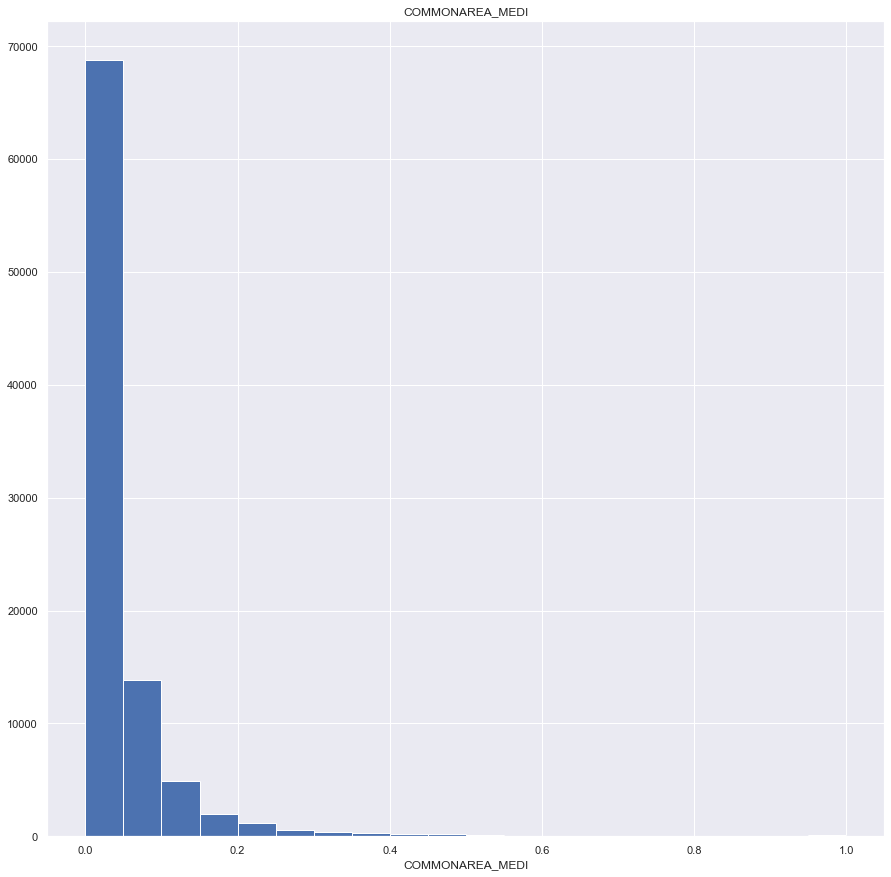

count   143620.000
mean         0.078
std          0.134
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.080
80%          0.160
90%          0.240
95%          0.360
99%          0.600
max          1.000
Name: ELEVATORS_MEDI, dtype: float64


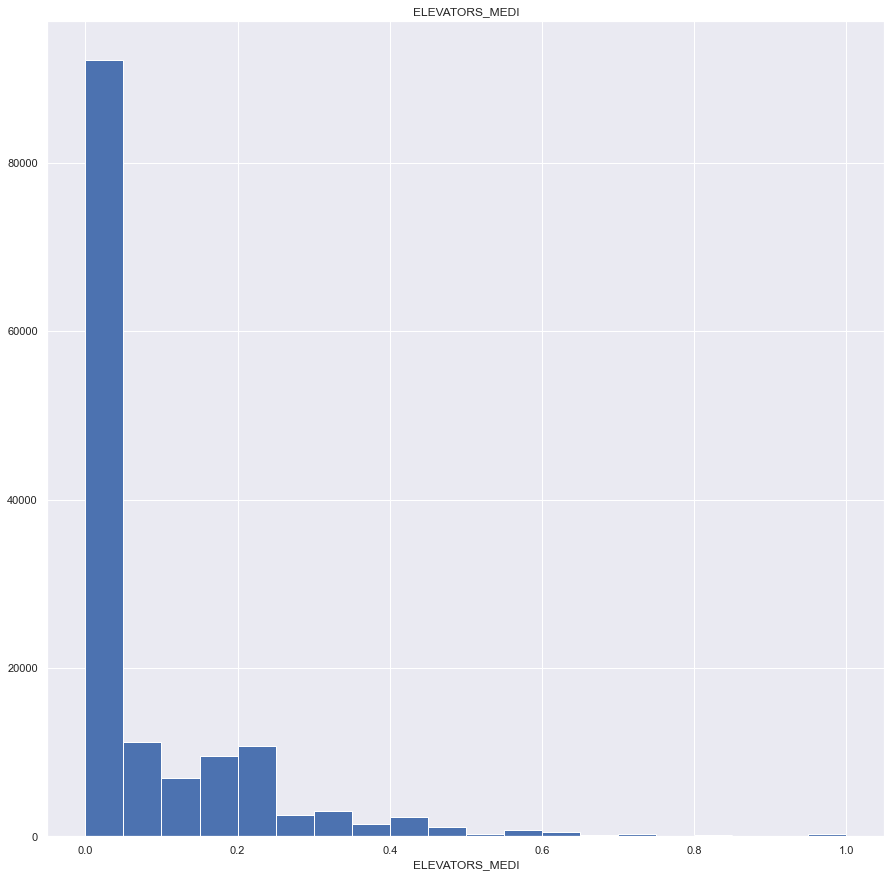

count   152683.000
mean         0.149
std          0.100
min          0.000
5%           0.035
10%          0.035
20%          0.069
30%          0.103
40%          0.103
50%          0.138
60%          0.138
70%          0.172
80%          0.207
90%          0.276
95%          0.310
99%          0.517
max          1.000
Name: ENTRANCES_MEDI, dtype: float64


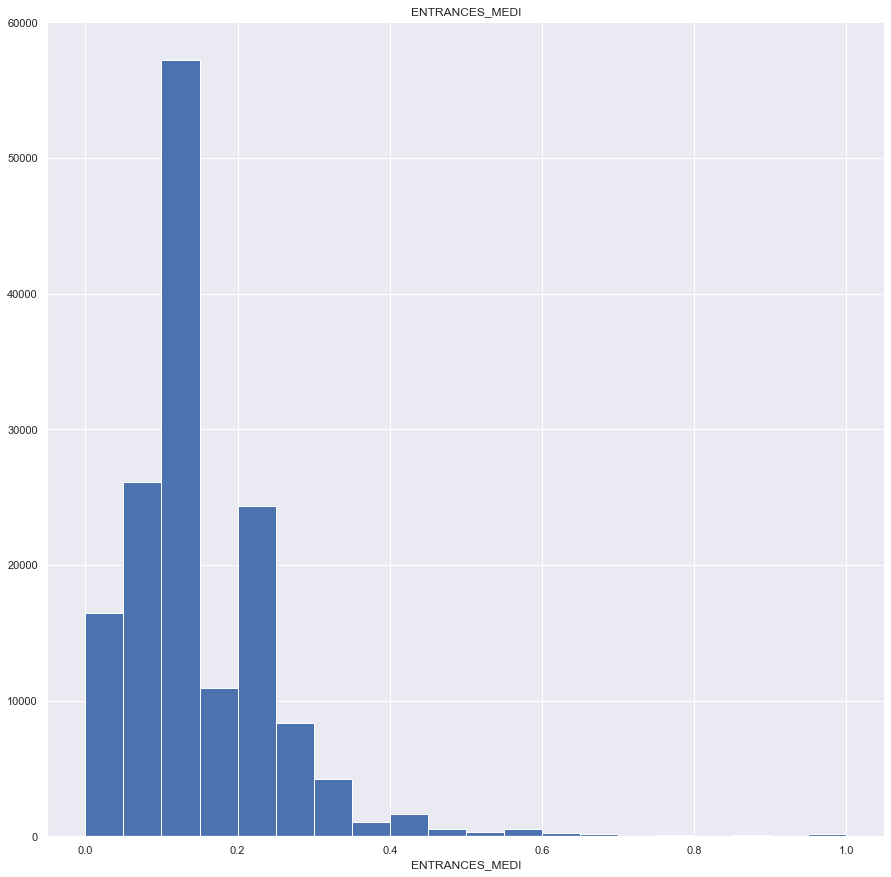

count   154491.000
mean         0.226
std          0.145
min          0.000
5%           0.042
10%          0.042
20%          0.125
30%          0.167
40%          0.167
50%          0.167
60%          0.167
70%          0.333
80%          0.333
90%          0.375
95%          0.479
99%          0.667
max          1.000
Name: FLOORSMAX_MEDI, dtype: float64


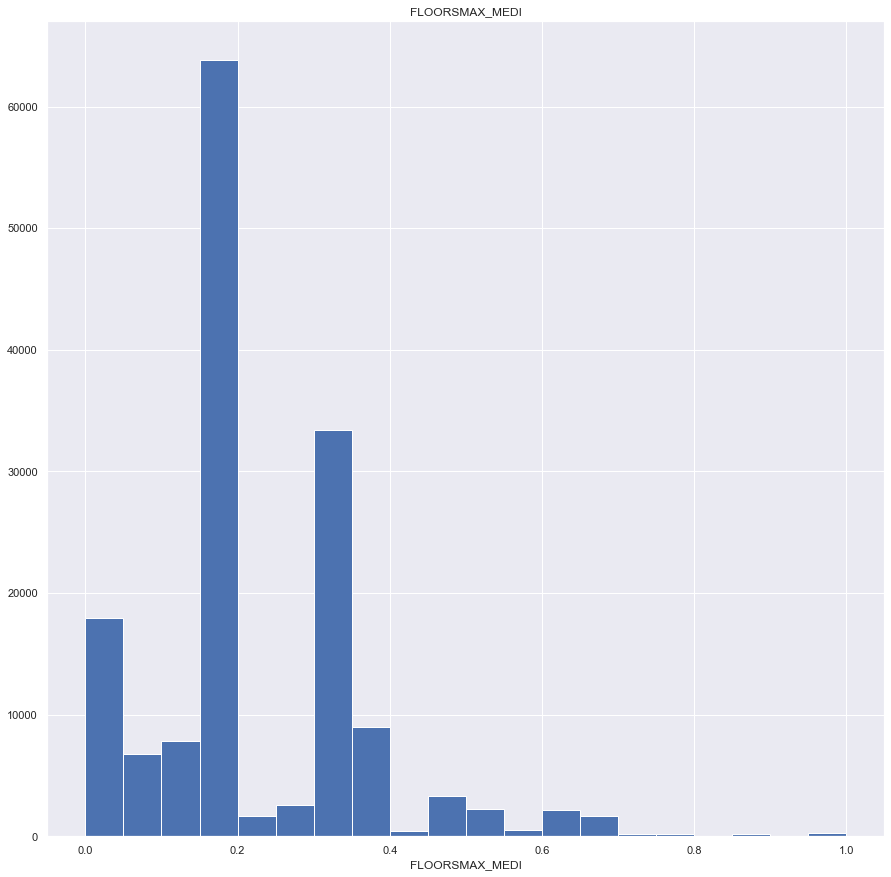

count   98869.000
mean        0.232
std         0.162
min         0.000
5%          0.042
10%         0.042
20%         0.042
30%         0.167
40%         0.208
50%         0.208
60%         0.208
70%         0.354
80%         0.375
90%         0.417
95%         0.500
99%         0.708
max         1.000
Name: FLOORSMIN_MEDI, dtype: float64


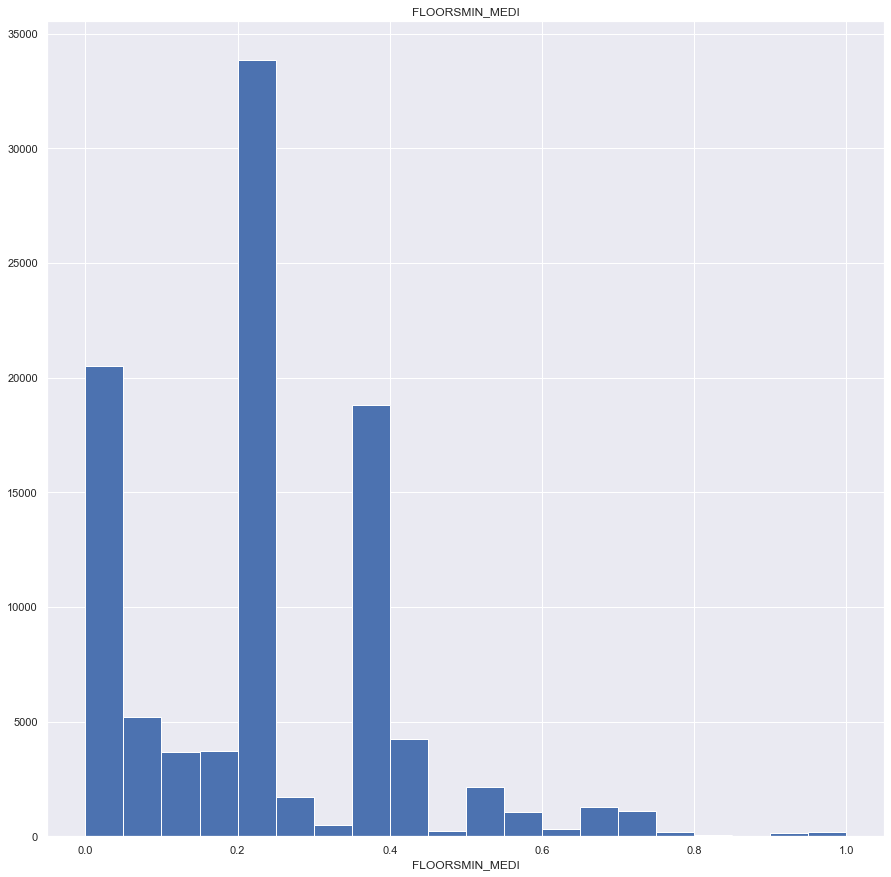

count   124921.000
mean         0.067
std          0.082
min          0.000
5%           0.000
10%          0.000
20%          0.014
30%          0.024
40%          0.036
50%          0.049
60%          0.062
70%          0.077
80%          0.099
90%          0.143
95%          0.198
99%          0.381
max          1.000
Name: LANDAREA_MEDI, dtype: float64


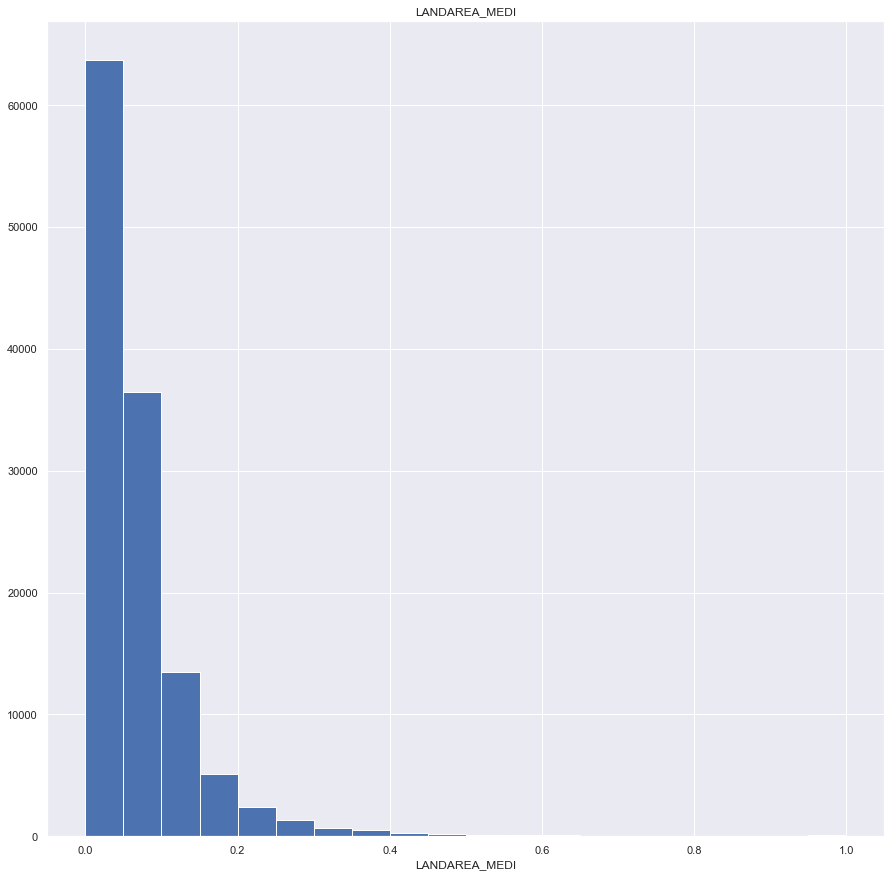

count   97312.000
mean        0.102
std         0.094
min         0.000
5%          0.010
10%         0.021
20%         0.043
30%         0.055
40%         0.065
50%         0.076
60%         0.091
70%         0.110
80%         0.144
90%         0.209
95%         0.277
99%         0.462
max         1.000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


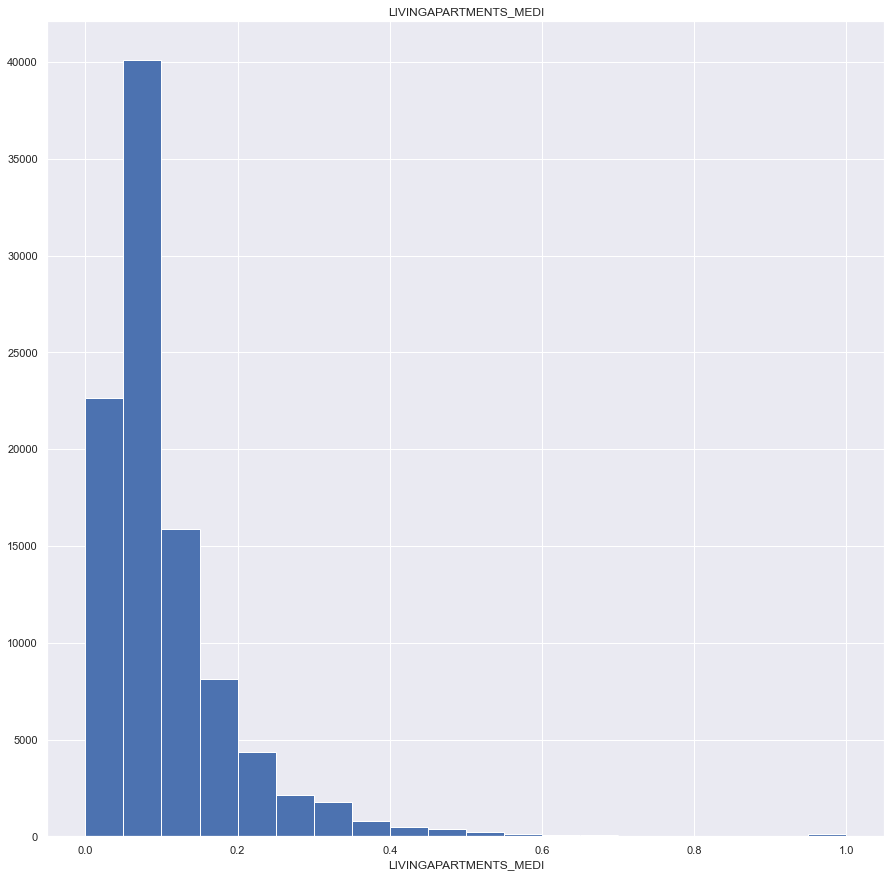

count   153161.000
mean         0.109
std          0.112
min          0.000
5%           0.008
10%          0.015
20%          0.036
30%          0.052
40%          0.064
50%          0.075
60%          0.090
70%          0.115
80%          0.155
90%          0.236
95%          0.326
99%          0.558
max          1.000
Name: LIVINGAREA_MEDI, dtype: float64


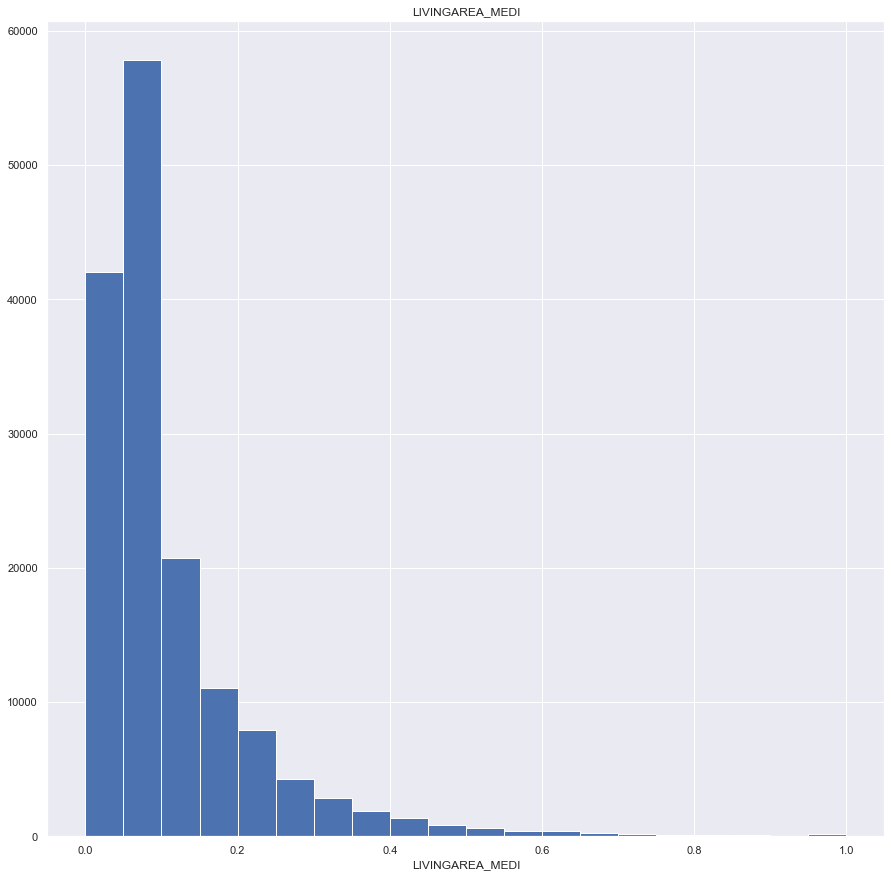

count   93997.000
mean        0.009
std         0.047
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.002
70%         0.004
80%         0.008
90%         0.015
95%         0.031
99%         0.105
max         1.000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


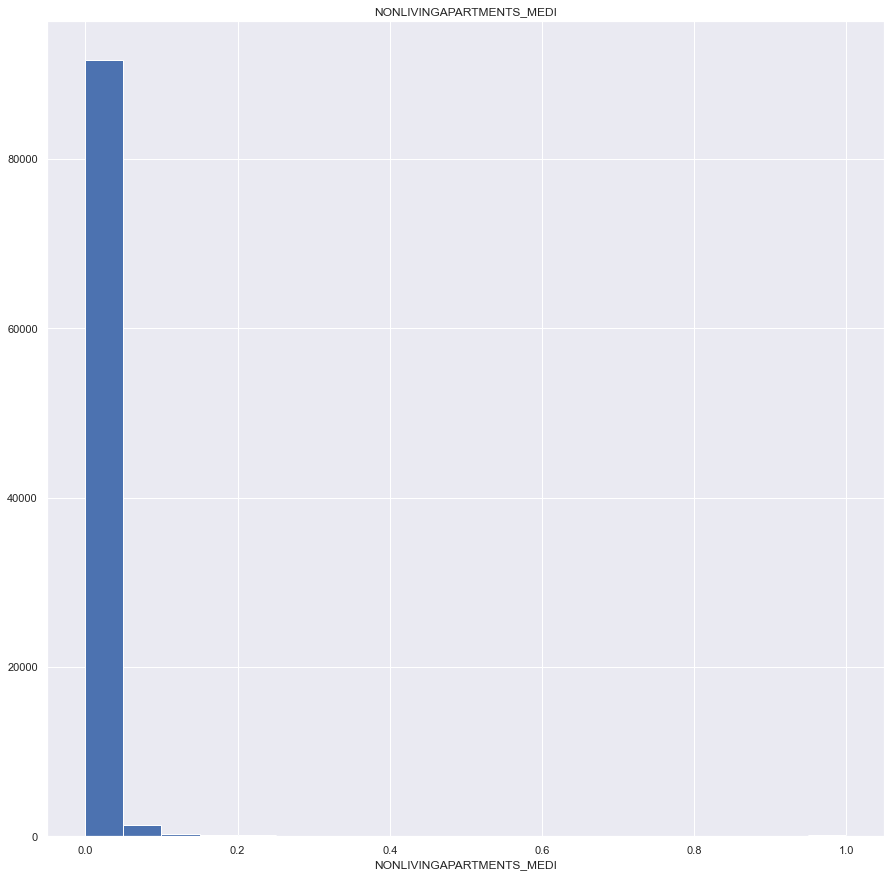

count   137829.000
mean         0.028
std          0.070
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.003
60%          0.008
70%          0.018
80%          0.039
90%          0.081
95%          0.130
99%          0.321
max          1.000
Name: NONLIVINGAREA_MEDI, dtype: float64


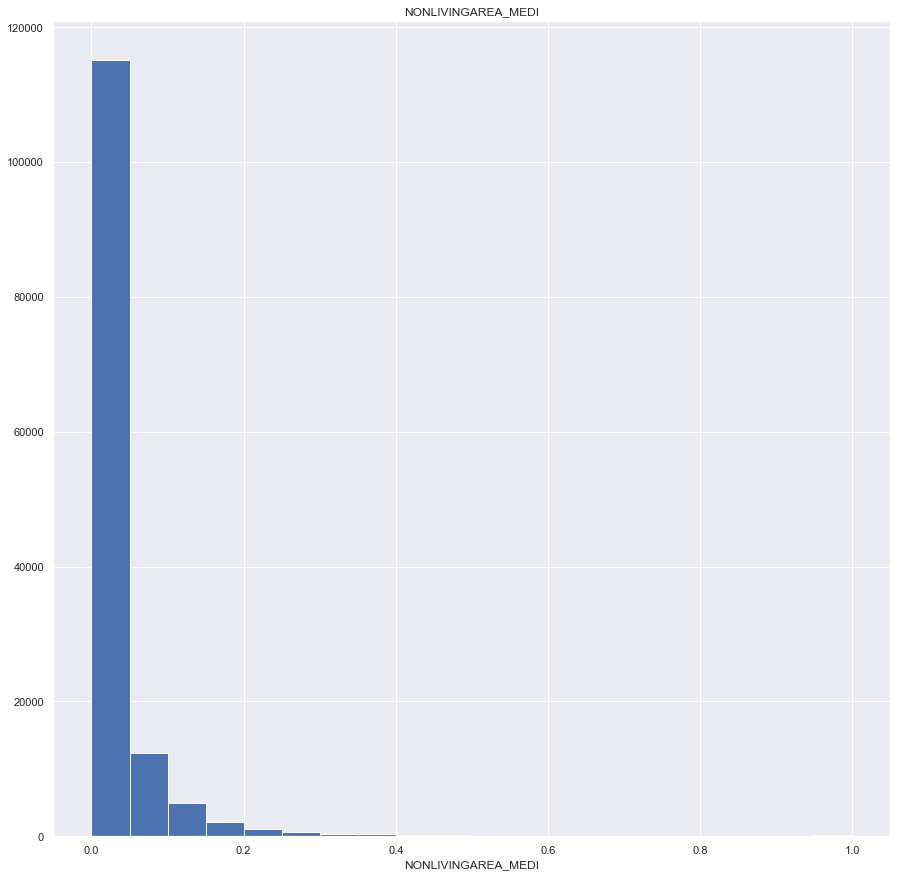

count   159080.000
mean         0.103
std          0.107
min          0.000
5%           0.007
10%          0.012
20%          0.032
30%          0.048
40%          0.057
50%          0.069
60%          0.083
70%          0.108
80%          0.158
90%          0.227
95%          0.309
99%          0.526
max          1.000
Name: TOTALAREA_MODE, dtype: float64


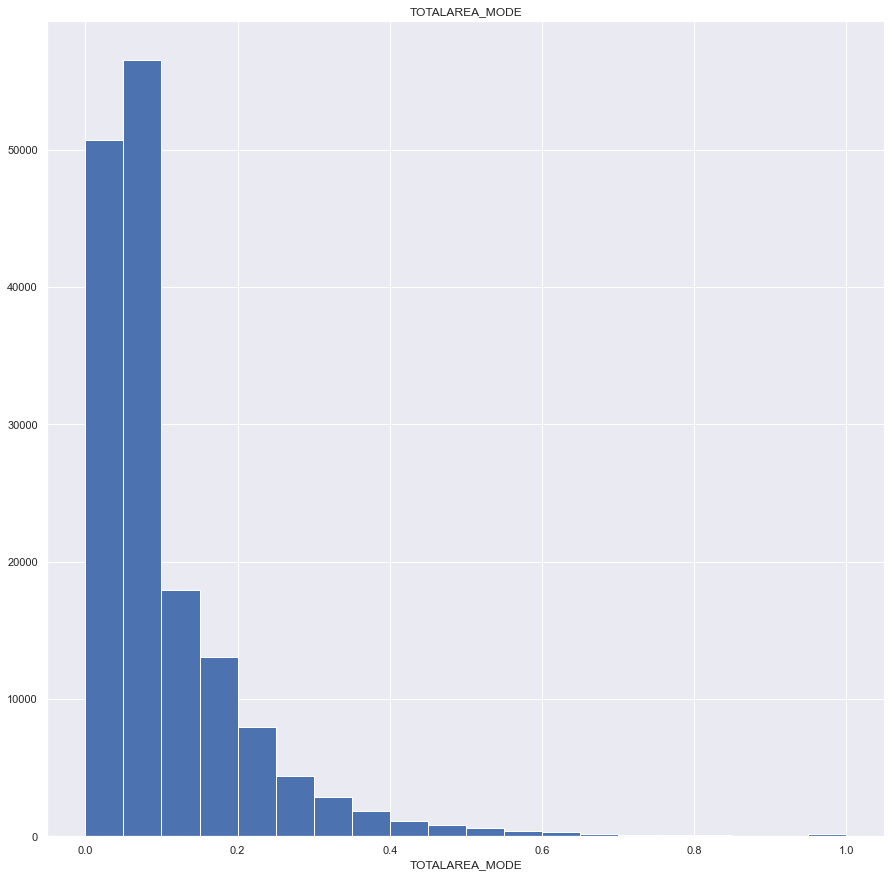

count   306490.000
mean         1.422
std          2.401
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          1.000
70%          2.000
80%          3.000
90%          4.000
95%          6.000
99%         10.000
max        348.000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


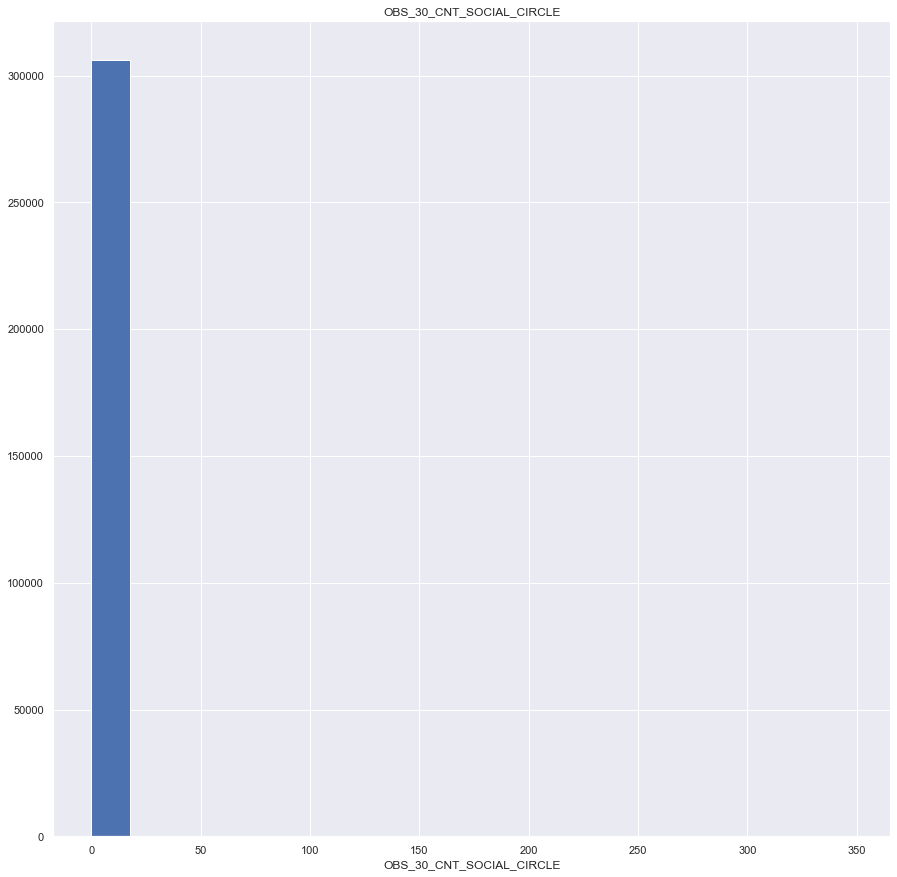

count   306490.000
mean         0.143
std          0.447
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          1.000
95%          1.000
99%          2.000
max         34.000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


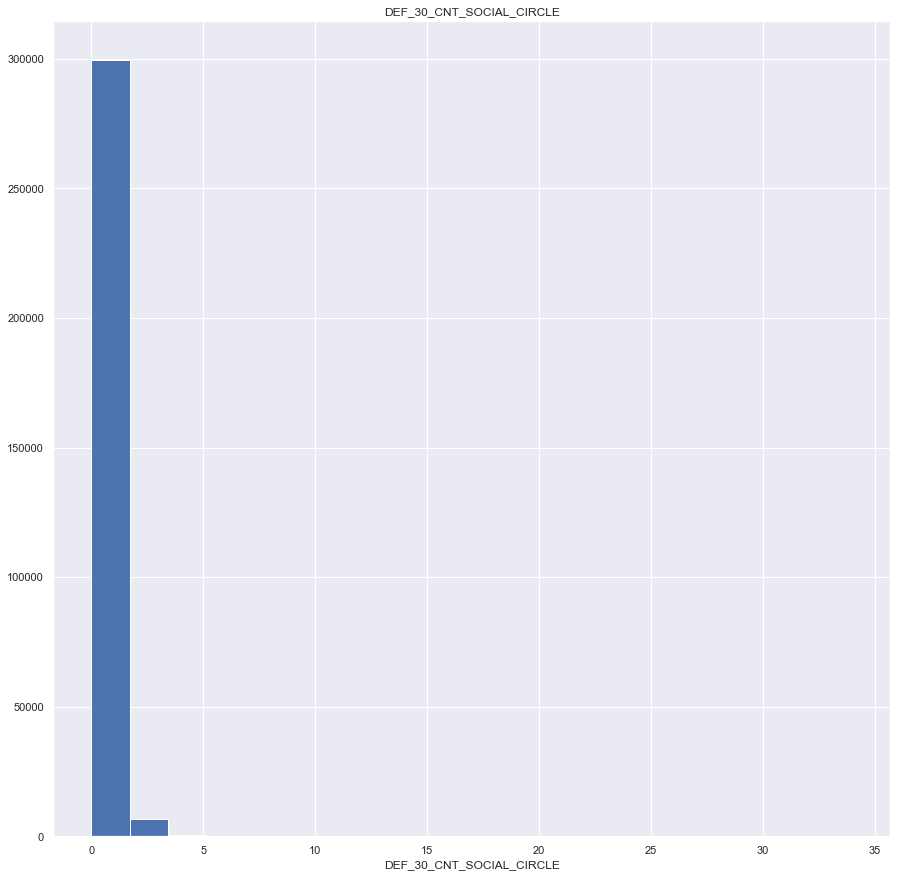

count   306490.000
mean         1.405
std          2.380
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          1.000
70%          2.000
80%          3.000
90%          4.000
95%          6.000
99%         10.000
max        344.000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


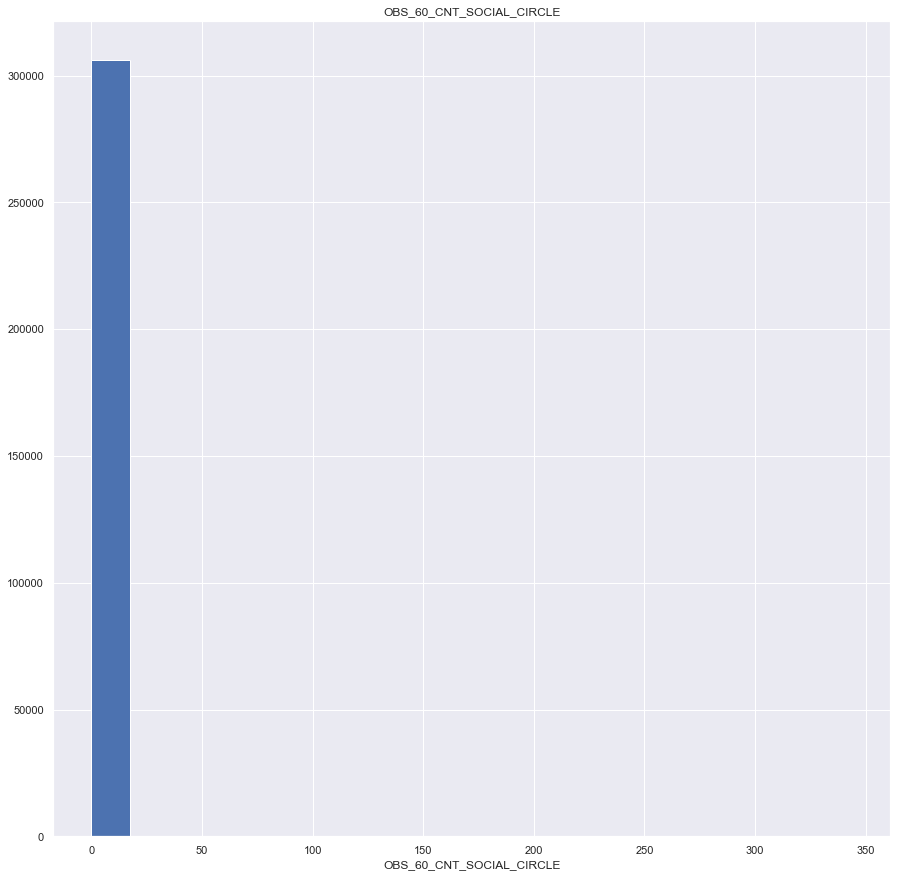

count   307510.000
mean      -962.859
std        826.808
min      -4292.000
5%       -2522.000
10%      -2158.000
20%      -1720.000
30%      -1426.000
40%      -1060.000
50%       -757.000
60%       -546.000
70%       -364.000
80%       -161.000
90%          0.000
95%          0.000
99%          0.000
max          0.000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


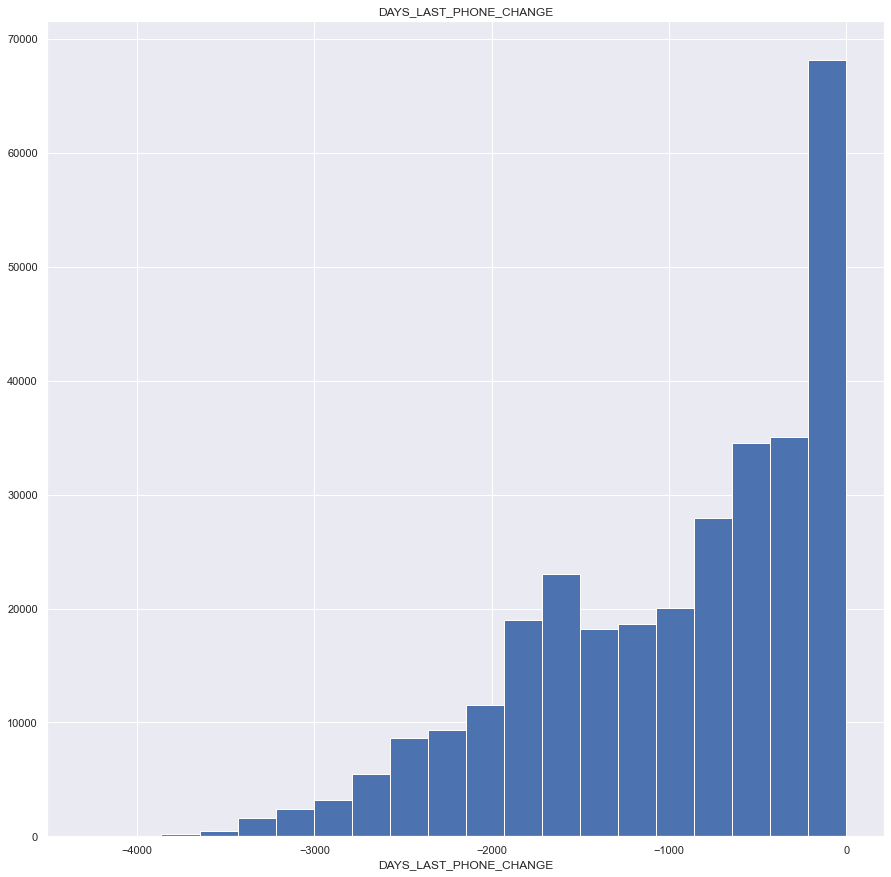

count   265992.000
mean         0.267
std          0.916
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          1.000
95%          1.000
99%          4.000
max         27.000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


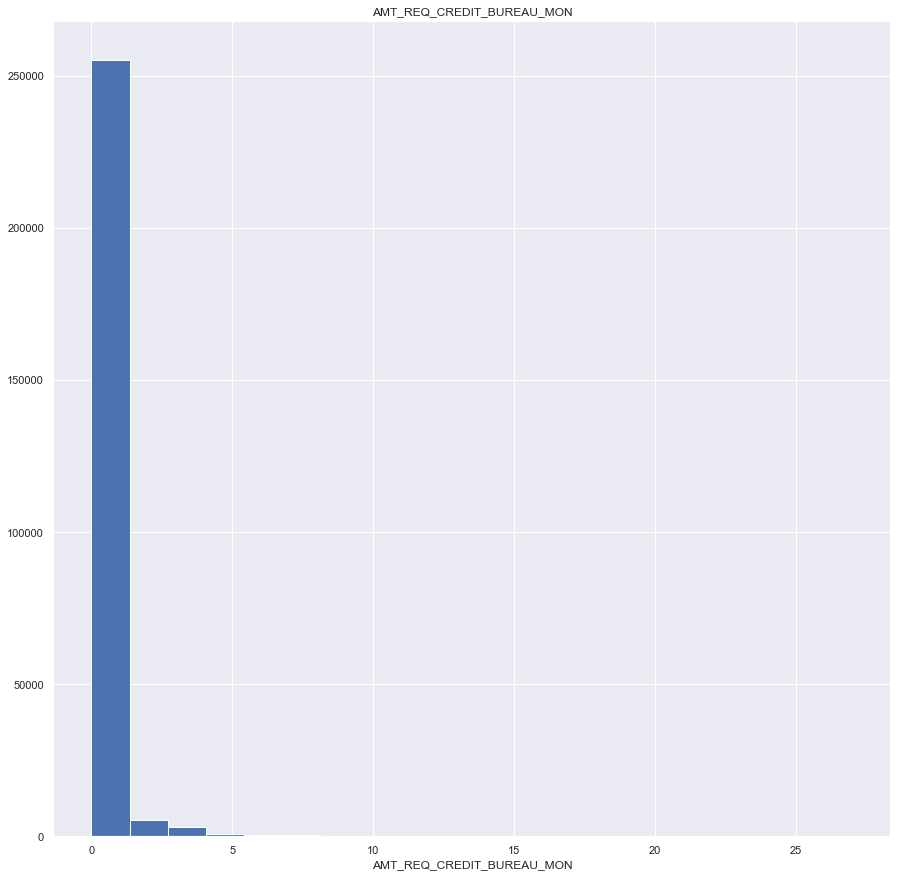

count   265992.000
mean         0.265
std          0.794
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          1.000
95%          2.000
99%          2.000
max        261.000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


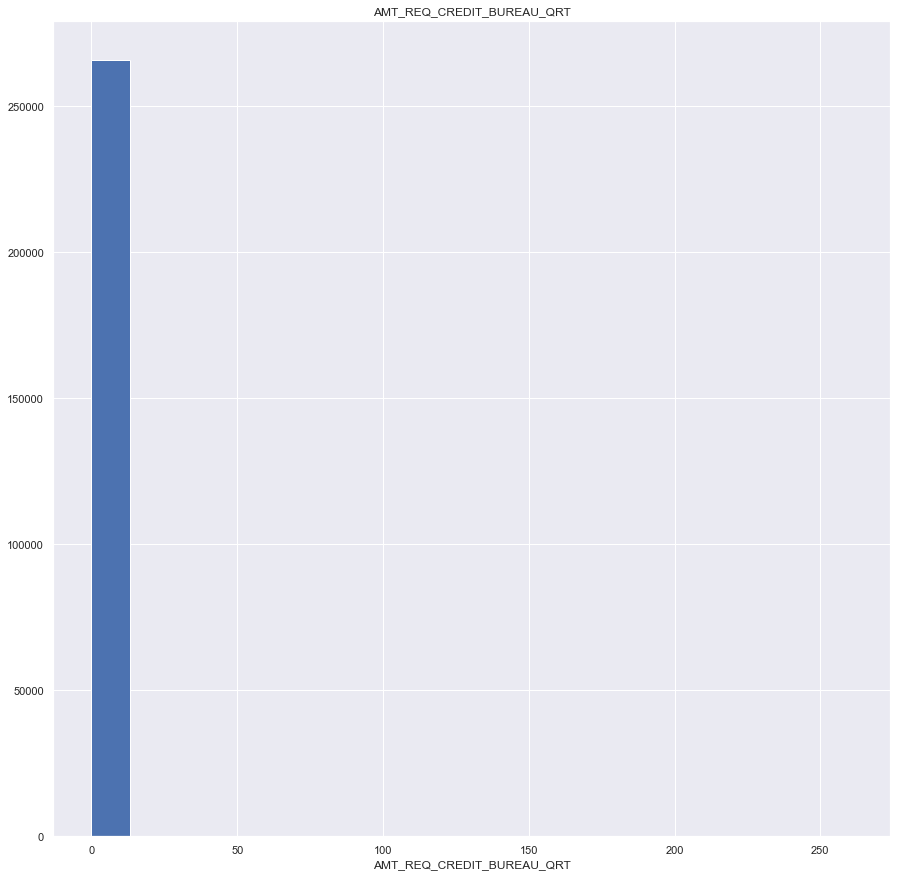

count   265992.000
mean         1.900
std          1.869
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          1.000
40%          1.000
50%          1.000
60%          2.000
70%          3.000
80%          3.000
90%          4.000
95%          6.000
99%          8.000
max         25.000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


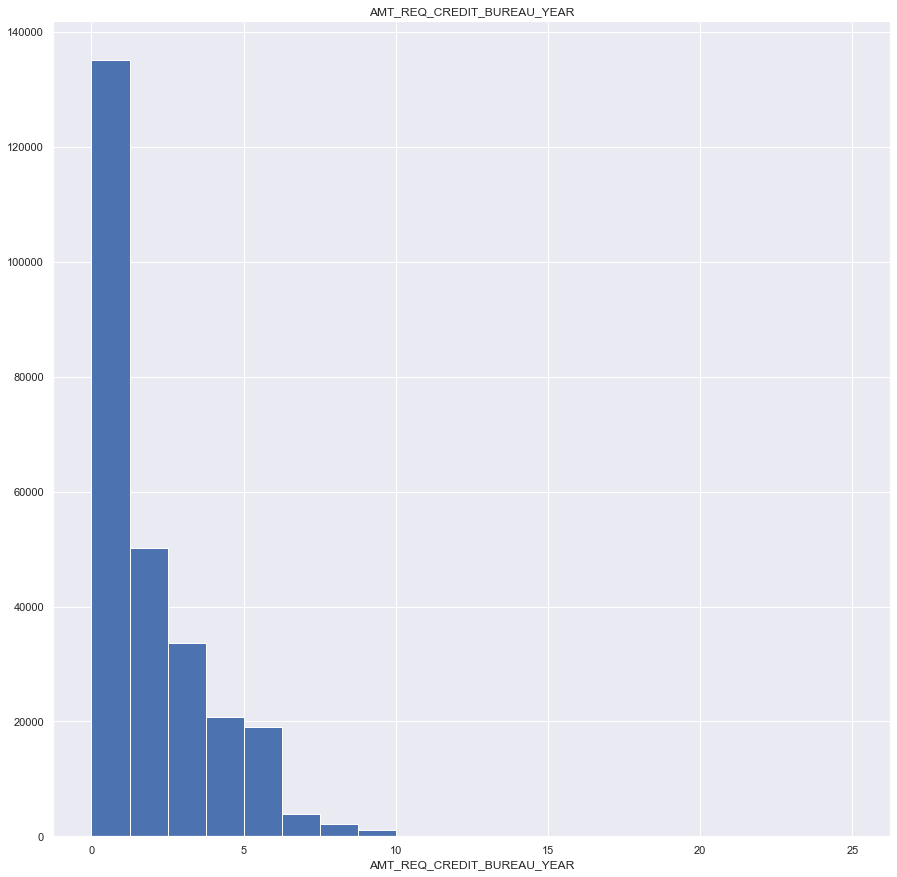

In [54]:
# Numeric kolonlarin analizi
#############################################

for col in num_cols:
    num_summary(application_train, col, True)

In [55]:
# Hangi numerik değişkenlerde outlier var
for col in num_cols:
    print(col + ": ", check_outlier(application_train, col))

SK_ID_CURR:  False
CNT_CHILDREN:  True
AMT_INCOME_TOTAL:  True
AMT_CREDIT:  True
AMT_ANNUITY:  True
AMT_GOODS_PRICE:  True
REGION_POPULATION_RELATIVE:  False
DAYS_BIRTH:  False
DAYS_EMPLOYED:  False
DAYS_REGISTRATION:  False
DAYS_ID_PUBLISH:  False
OWN_CAR_AGE:  True
CNT_FAM_MEMBERS:  True
HOUR_APPR_PROCESS_START:  False
EXT_SOURCE_1:  False
EXT_SOURCE_2:  False
EXT_SOURCE_3:  False
APARTMENTS_AVG:  True
BASEMENTAREA_AVG:  True
YEARS_BEGINEXPLUATATION_AVG:  True
YEARS_BUILD_AVG:  True
COMMONAREA_AVG:  True
ELEVATORS_AVG:  True
ENTRANCES_AVG:  True
FLOORSMAX_AVG:  False
FLOORSMIN_AVG:  False
LANDAREA_AVG:  True
LIVINGAPARTMENTS_AVG:  True
LIVINGAREA_AVG:  True
NONLIVINGAPARTMENTS_AVG:  True
NONLIVINGAREA_AVG:  True
APARTMENTS_MODE:  True
BASEMENTAREA_MODE:  True
YEARS_BEGINEXPLUATATION_MODE:  True
YEARS_BUILD_MODE:  True
COMMONAREA_MODE:  True
ELEVATORS_MODE:  True
ENTRANCES_MODE:  True
FLOORSMAX_MODE:  False
FLOORSMIN_MODE:  False
LANDAREA_MODE:  True
LIVINGAPARTMENTS_MODE:  True
LIVIN

In [56]:
application_train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.000,278180.519,102790.175,100002.000,189145.500,278202.000,367142.500,456255.000
CNT_CHILDREN,307511.000,0.417,0.722,0.000,0.000,0.000,1.000,19.000
AMT_INCOME_TOTAL,307511.000,168797.919,237123.146,25650.000,112500.000,147150.000,202500.000,117000000.000
AMT_CREDIT,307511.000,599026.000,402490.777,45000.000,270000.000,513531.000,808650.000,4050000.000
AMT_ANNUITY,307499.000,27108.574,14493.737,1615.500,16524.000,24903.000,34596.000,258025.500
AMT_GOODS_PRICE,307233.000,538396.207,369446.461,40500.000,238500.000,450000.000,679500.000,4050000.000
REGION_POPULATION_RELATIVE,307511.000,0.021,0.014,0.000,0.010,0.019,0.029,0.073
DAYS_BIRTH,307511.000,-16036.995,4363.989,-25229.000,-19682.000,-15750.000,-12413.000,-7489.000
DAYS_EMPLOYED,307511.000,63815.046,141275.767,-17912.000,-2760.000,-1213.000,-289.000,365243.000
DAYS_REGISTRATION,307511.000,-4986.120,3522.886,-24672.000,-7479.500,-4504.000,-2010.000,0.000
